# British National Corpus 2014 (BNC2014) Assessment - Loading and Analyzing Data

## Introduction

This notebook demonstrates how to load, process, and analyze data from the British National Corpus 2014 (BNC2014). The BNC2014 is a 100-million-word collection of samples of contemporary British English, containing both written and spoken language data. In this notebook, we focus on the spoken component.

Before proceeding, please review the [BNC2014 user manual](http://corpora.lancs.ac.uk/bnc2014/doc/BNC2014manual.pdf) to understand the corpus structure and metadata.

## Overview of Analysis Tasks

1. Loading and parsing XML data files
2. Extracting speaker information and utterances
3. Computing corpus statistics
4. Analyzing demographic patterns
5. Visualizing linguistic features by speaker groups
6. Creating comprehensive dashboards of corpus insights


## Required Packages

This notebook requires several Python packages for data processing and visualization:

- `pandas`: For data manipulation and analysis
- `lxml`: For parsing XML files
- `altair`: For interactive visualizations
- `matplotlib` & `seaborn`: For static visualizations
- `wordcloud`: For generating word clouds
- `numpy`: For numerical operations

Uncomment and run the installation commands below if you need to install any missing packages.

In [ ]:
# Uncomment and run these lines to install required packages
# !pip install pandas numpy matplotlib seaborn
# !pip install altair
# !pip install lxml
# !pip install wordcloud
# !pip install scikit-learn

In [ ]:
# Standard library imports
import os
import random
from collections import defaultdict
from pprint import pprint

# Data processing imports
import numpy as np
import pandas as pd
from lxml import etree

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Set default visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Import the downloaded BNC 2014 directory

In [ ]:
# tagged directory included words with POS tagging; whereas untagged directory does not have POS tagging.
# change to your directory path
path = 'Dataset'  # Ensure this is the correct path to your dataset

# Define paths with improved error handling
try:
    dir_corpus = os.path.join(path, 'spoken', 'tagged')
    dir_meta = os.path.join(path, 'spoken', 'metadata')
    
    # Check if directories exist
    if not os.path.exists(dir_corpus):
        print(f"Warning: Corpus directory not found at {dir_corpus}")
    if not os.path.exists(dir_meta):
        print(f"Warning: Metadata directory not found at {dir_meta}")
        
    # Print paths to verify correctness
    print(f"Corpus Directory: {dir_corpus}")
    print(f"Metadata Directory: {dir_meta}")
    
    # Optionally list files in directories to verify content
    if os.path.exists(dir_corpus):
        print(f"\nFound {len(os.listdir(dir_corpus))} files in corpus directory")
    if os.path.exists(dir_meta):
        print(f"Found {len(os.listdir(dir_meta))} files in metadata directory")
        
except Exception as e:
    print(f"Error setting up directories: {e}")

Corpus Directory: Dataset\spoken\tagged
Metadata Directory: Dataset\spoken\metadata


# Load and parse XML

Each XML file will have text with several utterances and words.
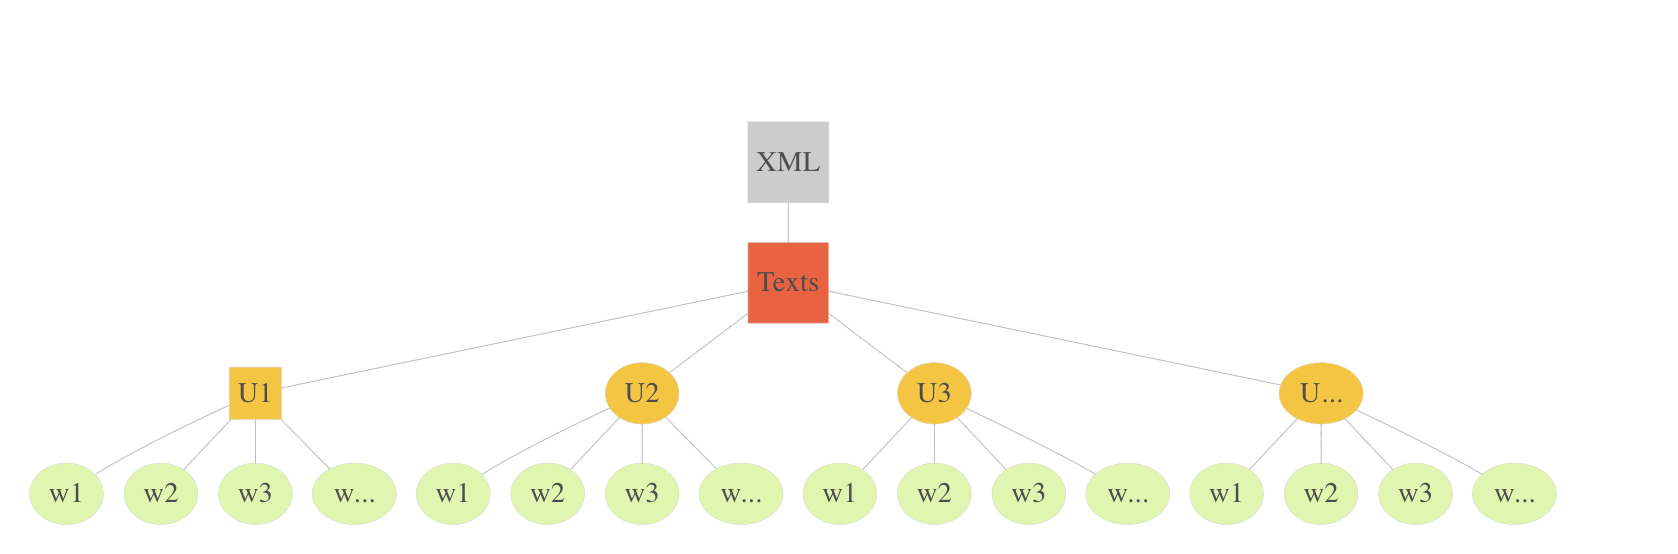

In [5]:
f_names = os.listdir(dir_corpus)
f_paths = [f"{dir_corpus}{f_name}" for f_name in f_names]

In [6]:
# f_names
# f_paths
len(f_paths)

1251

In [7]:
len(f_names)

1251

In [8]:
def get_xml(f_path):
    with open(f_path, 'r', encoding='utf-8') as f:
        f = f.read()
    xml = etree.fromstring(f)
    return xml


## OR Parse XML using Pandas inbuilt function
let's make use of the untagged version of the corpus as an additional example

I recommend taking a look at the structure of the xml files in order to understand what is happening below, I isolate the speaker and the u (for utterance) tags, however, you may wish to isolate additional tags.

From the code below you will be able to construct a dataframe containing the dialouge data in a format that makes sense for the assignment (hint: you should make sure you add the speaker info you want to analyse to the dialogue utterances and combine all the dialogues (with dialogue and speaker id) in one table so that you can analyse and filter the data in the same manner as in the dialogue corpus from the practicals) 

In [9]:
dir_corpus = path + '/spoken/untagged/'
print(dir_corpus)
f_names = os.listdir(dir_corpus)
f_paths = [f"{dir_corpus}{f_name}" for f_name in f_names]

for paths in f_paths: # for each of the dialogues
    print(paths)
    df_utts = pd.read_xml(paths, xpath="//u")
    df_speakers = pd.read_xml(paths, xpath="//speaker")
    break
#print(list(df))
df_speakers

Dataset/spoken/untagged/
Dataset/spoken/untagged/S23A.xml


id  exactage age1994 agerange gender      nat birthplace birthcountry  \
0  S0021        27   25_34    19_29      F  British    Swindon      England   
1  S0032        28   25_34    19_29      M  British     Yoevil      England   
2  S0094        33   25_34    30_39      F  British    Swindon      England   
3  S0095        33   25_34    30_39      M  British  Camarthen     Scotland   

        l1 lingorig  ... dialect_l2 dialect_l3 dialect_l4      edqual  \
0  English  England  ...    england      south  southwest  5_postgrad   
1  English  England  ...    england      south  southwest  4_graduate   
2  English  England  ...    england      south  southwest  5_postgrad   
3  English  England  ...      wales      wales      wales  5_postgrad   

            occupation socgrade  nssec      l2                fls in_core  
0              Teacher        B      2    None               None       y  
1   Software developer        A    1_2    None               None       y  
2          PhD student        A    1_2  German  Welsh -- Beginner       y  
3  Self employed maker        E  uncat    None               None       y  

[4 rows x 25 columns]

# Corpus size

Texts: calculate the total number of texts in the corpus

In [10]:
%%time
texts = []
for f_path in f_paths:
    xml = get_xml(f_path)
    id = xml.get('id')
    texts.append(id)

CPU times: total: 4.12 s
Wall time: 21 s


In [11]:
# No of documents (texts) in the tagged directory of the corpus
len(texts)

1251

**Number of Speakers in the Corpus**

In [12]:
speakers_words = defaultdict(int)
for f_path in f_paths:
    xml = get_xml(f_path)
    for u in xml.iter('u'):
        speaker = u.get('who')
        n_words = len([w for w in u.iter('w')])
        speakers_words[speaker] += n_words 
print(f'number of speakers: {len(speakers_words)}')

number of speakers: 671


**Words per speaker**

In [13]:
df_speakers_words = pd.DataFrame(list(speakers_words.items()), columns=['speaker', 'n_words'])

In [14]:
df_speakers_words.sort_values('speaker', ascending=True, inplace=True)

In [15]:
df_speakers_words

speaker  n_words
339      S0001        0
644      S0002        0
290      S0003        0
188      S0004        0
517      S0005        0
..         ...      ...
395      S0691        0
394      S0692        0
3    UNKFEMALE        0
4      UNKMALE        0
6     UNKMULTI        0

[671 rows x 2 columns]

In [16]:
#write the above dataframe to csv if required
df_speakers_words.to_csv(path + '/out/speakers_nwords.csv')

In [17]:
#No. of words in the corpus

n_words = 0
for f_path in f_paths:
    xml = get_xml(f_path)
    for w in xml.iter('w'):
        n_words += 1
        
print(f'total number of words in the corpus: {n_words}')

total number of words in the corpus: 0


# Files from Metadata folder

In [18]:
# =loading speakers txt file
head_speakers = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-speaker.txt'),
    delimiter='\t',
    skiprows=1,
    index_col=0
)

In [19]:
head_speakers

XML tag                Metadata Title
#                                             
1       exactage                     Exact age
2        age1994          Age (BNC1994 groups)
3       agerange                     Age range
4         gender                        Gender
5            nat                   Nationality
6     birthplace                Place of birth
7   birthcountry              Country of birth
8             l1                First language
9       lingorig             Linguistic origin
10   dialect_rep    Accent/dialect as reported
11      hab_city              City/town living
12   hab_country                Country living
13       hab_dur       Duration living (years)
14    dialect_l1            Dialect at Level 1
15    dialect_l2            Dialect at Level 2
16    dialect_l3            Dialect at Level 3
17    dialect_l4            Dialect at Level 4
18        edqual         Highest qualification
19    occupation             Occupation: title
20      socgrade           Class: Social grade
21         nssec                 Class: NS-SEC
22            l2             L2 (if bilingual)
23           fls      Foreign languages spoken
24       in_core  Part of core set of speakers

In [20]:
# loading speakerdata tsv file
speakers = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-speakerdata.tsv'), 
    delimiter='\t', 
    names=head_speakers['XML tag'],
    index_col=0
)

In [21]:
speakers

exactage  age1994 agerange gender      nat  \
S0001           32    25_34    30_39      F  British   
S0002          NaN  Unknown    19_29      F  British   
S0003          NaN  Unknown    19_29      F  British   
S0004          NaN  Unknown    30_39      M  British   
S0005          NaN   60plus    80_89      F  British   
...            ...      ...      ...    ...      ...   
S0691           45    45_59    40_49      F  British   
S0692           22    15_24    19_29      M  British   
UNKFEMALE      NaN  Unknown  Unknown      F      NaN   
UNKMALE        NaN  Unknown  Unknown      M      NaN   
UNKMULTI       NaN  Unknown  Unknown      X      NaN   

                                   birthplace birthcountry       l1 lingorig  \
S0001                 Wordsley, West Midlands      England  English  England   
S0002                              Birmingham      England  English  England   
S0003      Royal Leamington Spa, Warwickshire      England  English  England   
S0004                                     NaN      Germany  English  England   
S0005                              Birmingham      England  English  England   
...                                       ...          ...      ...      ...   
S0691                       Barrow-In-Furness           UK  English  England   
S0692                       Barrow-in-Furness      England  English  England   
UNKFEMALE                                 NaN          NaN      NaN      NaN   
UNKMALE                                   NaN          NaN      NaN      NaN   
UNKMULTI                                  NaN          NaN      NaN      NaN   

                  dialect_rep  ...   dialect_l2   dialect_l3   dialect_l4  \
S0001          None indicated  ...  unspecified  unspecified  unspecified   
S0002                Midlands  ...      england     midlands  unspecified   
S0003                Northern  ...      england        north  unspecified   
S0004                Northern  ...      england        north  unspecified   
S0005                Midlands  ...      england     midlands  unspecified   
...                       ...  ...          ...          ...          ...   
S0691      Northern/ Cumbrian  ...      england        north  unspecified   
S0692                Northern  ...      england        north  unspecified   
UNKFEMALE      None indicated  ...  unspecified  unspecified  unspecified   
UNKMALE        None indicated  ...  unspecified  unspecified  unspecified   
UNKMULTI       None indicated  ...  unspecified  unspecified  unspecified   

                edqual                   occupation socgrade    nssec   l2  \
S0001       5_postgrad        University researcher        A      1_2  NaN   
S0002       5_postgrad                      Teacher        B        2  NaN   
S0003       4_graduate                      Student        E    uncat  NaN   
S0004       5_postgrad                     Engineer       C2        5  NaN   
S0005      2_secondary   Insurance Broker (retired)        E        8  NaN   
...                ...                          ...      ...      ...  ...   
S0691      3_sixthform       dental nurse (trainee)        D        6  NaN   
S0692      3_sixthform  Sales Assistant (Part time)        D        6  NaN   
UNKFEMALE    9_unknown                          NaN  unknown  unknown  NaN   
UNKMALE      9_unknown                          NaN  unknown  unknown  NaN   
UNKMULTI     9_unknown                          NaN  unknown  unknown  NaN   

                                fls in_core  
S0001                           NaN       n  
S0002      Japanese -- Intermediate       n  
S0003                           NaN       n  
S0004           Spanish -- Beginner       n  
S0005            French -- Beginner       n  
...                             ...     ...  
S0691                           NaN       y  
S0692                           NaN       n  
UNKFEMALE                       NaN       n  
UNKMALE                         NaN       n  
UNKMULTI

In [22]:
# Load text data

head_texts = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-text.txt'),
    delimiter='\t',
    skiprows=1,
    index_col=0
)

In [23]:
head_texts

XML tag                                   Metadata Title
#                                                                 
1      rec_length                                 Recording length
2        rec_date                                   Recording date
3        rec_year                                Year of recording
4      rec_period                                 Recording period
5      n_speakers                               Number of speakers
6   list_speakers                              List of speaker IDs
7         rec_loc                               Recording location
8   relationships                       Inter-speaker relationship
9          topics                                   Topics covered
10       activity                             Activity description
11      conv_type  Selected characterisations of conversation type
12    conventions                   Transcription conventions used
13      in_sample                         Sample release inclusion
14    transcriber                                      Transcriber

In [24]:
# Loading textdata from tsv file

texts = pd.read_csv(
    os.path.join(dir_meta,'bnc2014spoken-textdata.tsv'), 
    delimiter='\t', 
    names=head_texts['XML tag'],
    index_col=0
)

In [25]:
texts

rec_length    rec_date  rec_year rec_period  n_speakers  \
S23A    1:50:43  2014-12-27      2014    2014_Q4           4   
S24A    0:17:24  2014-09-12      2014    2014_Q3           2   
S24D    0:20:00  2016-01-14      2016    2016_Q1           3   
S24E    0:45:53  2015-09-15      2015    2015_Q3           3   
S263    2:00:00  2016-02-07      2016    2016_Q1           4   
...         ...         ...       ...        ...         ...   
SZVB    1:00:31  2015-11-02      2015    2015_Q4           2   
SZVC    0:32:00  2015-09-14      2015    2015_Q3           2   
SZW4    0:21:09  2015-10-19      2015    2015_Q4           2   
SZXQ    0:40:44  2012-03-21      2012    2012_Q1           2   
SZYV    0:21:20  2015-11-04      2015    2015_Q4           2   

                list_speakers                                    rec_loc  \
S23A  S0021 S0032 S0094 S0095                             Speakers' home   
S24A              S0261 S0262                  Modern Art Museum, London   
S24D        S0653 S0654 S0655                    Home kitchen, Comberton   
S24E        S0519 S0520 S0521                          Hunsonby, Cumbria   
S263  S0588 S0589 S0590 S0616                                ANON’s home   
...                       ...                                        ...   
SZVB              S0517 S0525             (ANON’s home, Fradley, Staffs)   
SZVC              S0324 S0325                        ANON's home, Linton   
SZW4              S0509 S0510               ANON & ANON's home, Hastings   
SZXQ              S0058 S0120                 Botanic Gardens, Cambridge   
SZYV              S0428 S0432  Cambridge University Press Printing House   

                                   relationships  \
S23A  Close family, partners, very close friends   
S24A  Close family, partners, very close friends   
S24D  Close family, partners, very close friends   
S24E  Close family, partners, very close friends   
S263  Close family, partners, very close friends   
...                                          ...   
SZVB  Close family, partners, very close friends   
SZVC  Close family, partners, very close friends   
SZW4  Close family, partners, very close friends   
SZXQ                Friends, wider family circle   
SZYV                Friends, wider family circle   

                                                 topics  \
S23A  Computer programming, food, wine, temperature,...   
S24A                                            The art   
S24D                     Lego Ninjago, Minecraft worlds   
S24E  food, exercise, choir, family plans, family me...   
S263                                                NaN   
...                                                 ...   
SZVB                            Babies, family, friends   
SZVC  school orchestra (windband), Playing the Clari...   
SZW4  Poetry, Morning Routine, Food, Social Events, ...   
SZXQ  TV, languages, friends, holidays, offices, comedy   
SZYV  Babies, moving house, sharing clothes, sibling...   

                                               activity  \
S23A     Catching up with family over food and presents   
S24A         A couple discussing modern art at a museum   
S24D  Spending time on electronic toys instead of re...   
S24E                              Midweek family dinner   
S263                                                NaN   
...                                                 ...   
SZVB  Sisters talking about their family (new baby d...   
SZVC                      Friends talking about school    
SZW4                               Mother and Daughter    
SZXQ                                                NaN   
SZYV                                     Lunchtime chat   

                                              conv_type conventions in_sample  \
S23A           Discussing, explaining, anecdote telling     Revised         n   
S24A                  Discussing, explaining, inquiring     Revised         y   
S24D                              Dis

In [26]:
import pandas as pd
import os

# base metadata dir
dir_meta = os.path.join(path, 'spoken', 'metadata')

# load field‐name lookups
fields_s = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-speaker.txt'),
    sep='\t', skiprows=1, index_col=0
)
fields_t = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-text.txt'),
    sep='\t', skiprows=1, index_col=0
)

# load the speaker metadata (indexed by speaker_id)
df_speakers_meta = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-speakerdata.tsv'),
    sep='\t', names=fields_s['XML tag'], index_col=0
)

# load the text/session metadata (indexed by text_id)
df_texts_meta = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-textdata.tsv'),
    sep='\t', names=fields_t['XML tag'], index_col=0
)

In [27]:
import os
import pandas as pd
import lxml.etree as ET


path         = 'Dataset'  # change if needed
dir_tagged   = os.path.join(path, 'spoken', 'tagged')
dir_untagged = os.path.join(path, 'spoken', 'untagged')

In [28]:
tagged_rows = []
for fname in os.listdir(dir_tagged):
    fpath = os.path.join(dir_tagged, fname)
    xml   = ET.parse(fpath)
    root  = xml.getroot()
    text_id = root.get('id')
    for u in root.findall('.//u'):
        # use the "n" attribute on <u> as your utterance ID
        utt_id = u.get('n')
        spk    = u.get('who')
        for w in u.findall('w'):
            tagged_rows.append({
                'text_id'     : text_id,
                'utterance_id': utt_id,
                'speaker_id'  : spk,
                'word'        : w.text,
                'lemma'       : w.get('lemma'),
                'pos'         : w.get('pos'),
                'class'       : w.get('class'),
                'usas'        : w.get('usas'),
            })

df_tagged = pd.DataFrame(tagged_rows)
print("Tagged (word-level) with correct utterance IDs:")
print(df_tagged.head())


Tagged (word-level) with correct utterance IDs:
  text_id utterance_id speaker_id   word lemma   pos  class  usas
0    S23A            1      S0094  words  word   NN2  SUBST    Q3
1    S23A            2      S0095     it    it  PPH1   PRON    Z8
2    S23A            2      S0095     's    be   VBZ   VERB    A3
3    S23A            2      S0095      a     a   AT1    ART    Z5
4    S23A            2      S0095  games  game   NN2  SUBST  K5:1


In [29]:
df_tagged

text_id utterance_id speaker_id      word     lemma    pos   class  \
0           S23A            1      S0094     words      word    NN2   SUBST   
1           S23A            2      S0095        it        it   PPH1    PRON   
2           S23A            2      S0095        's        be    VBZ    VERB   
3           S23A            2      S0095         a         a    AT1     ART   
4           S23A            2      S0095     games      game    NN2   SUBST   
...          ...          ...        ...       ...       ...    ...     ...   
11262882    SZYV          320      S0432        mm        mm     UH  INTERJ   
11262883    SZYV          320      S0432      yeah      yeah     UH  INTERJ   
11262884    SZYV          320      S0432        we        we  PPIS2    PRON   
11262885    SZYV          320      S0432  probably  probably     RR     ADV   
11262886    SZYV          320      S0432    should    should     VM    VERB   

          usas  
0           Q3  
1           Z8  
2           A3  
3           Z5  
4         K5:1  
...        ...  
11262882    Z4  
11262883    Z4  
11262884    Z8  
11262885    A7  
11262886    S6  

[11262887 rows x 8 columns]

In [30]:
# 1. build df_untagged as before…
untagged_rows = []
for fname in os.listdir(dir_untagged):
    fpath = os.path.join(dir_untagged, fname)
    xml   = ET.parse(fpath)
    root  = xml.getroot()
    text_id = root.get('id')
    for u in root.findall('.//u'):
        raw = ''.join(u.itertext()).strip()
        untagged_rows.append({
            'text_id'     : text_id,
            'utterance_id': u.get('n') or u.get('uID'),
            'speaker_id'  : u.get('who'),
            'raw_text'    : raw,
        })

df_untagged = pd.DataFrame(untagged_rows)

# 2. now add utterance length
df_untagged['utt_length'] = df_untagged['raw_text'].str.split().str.len()

# 3. you can verify it exists
print(df_untagged[['raw_text','utt_length']].head())


                                            raw_text  utt_length
0                                              words           1
1     it's a games word? like a computer games word?           9
2                                          yeah yeah           2
3                                  oh oh that's nice           4
4  I it's something I have really heard z-buffer ...          13


In [31]:
df_untagged

text_id utterance_id speaker_id  \
0          S23A            1      S0094   
1          S23A            2      S0095   
2          S23A            3      S0032   
3          S23A            4      S0095   
4          S23A            5      S0032   
...         ...          ...        ...   
1248105    SZYV          316      S0432   
1248106    SZYV          317      S0428   
1248107    SZYV          318      S0432   
1248108    SZYV          319      S0428   
1248109    SZYV          320      S0432   

                                                  raw_text  utt_length  
0                                                    words           1  
1           it's a games word? like a computer games word?           9  
2                                                yeah yeah           2  
3                                        oh oh that's nice           4  
4        I it's something I have really heard z-buffer ...          13  
...                                                    ...         ...  
1248105  but  anyway  erm he was like Sha Li that's rea...          29  
1248106                    no I'm quite happy with  Sha Li           7  
1248107  I'll just stick with it yeah  this was like ha...          34  
1248108  yeah got to change my name  that's crazy isn't...          14  
1248109                        mm  yeah we probably should           5  

[1248110 rows x 5 columns]

In [32]:
df_untagged['utt_length'] = df_untagged['raw_text'].str.split().str.len()


In [ ]:
# Calculate utterance length with error handling
try:
    # Check if 'raw_text' column exists
    if 'raw_text' not in df_untagged.columns:
        print("Warning: 'raw_text' column not found in the untagged dataframe. Check your data loading.")
    else:
        # Apply length calculation, handling possible NaN values
        df_untagged['utt_length'] = df_untagged['raw_text'].fillna('').str.split().str.len()
        
        # Display summary statistics
        print("Utterance length statistics:")
        print(df_untagged['utt_length'].describe())
        
        # Check for any zero-length utterances
        zero_length = (df_untagged['utt_length'] == 0).sum()
        if zero_length > 0:
            print(f"Found {zero_length} utterances with zero length")
            
except Exception as e:
    print(f"Error calculating utterance length: {e}")
    
# Display the updated dataframe
df_untagged.head()

text_id utterance_id speaker_id  \
0          S23A            1      S0094   
1          S23A            2      S0095   
2          S23A            3      S0032   
3          S23A            4      S0095   
4          S23A            5      S0032   
...         ...          ...        ...   
1248105    SZYV          316      S0432   
1248106    SZYV          317      S0428   
1248107    SZYV          318      S0432   
1248108    SZYV          319      S0428   
1248109    SZYV          320      S0432   

                                                  raw_text  utt_length  
0                                                    words           1  
1           it's a games word? like a computer games word?           9  
2                                                yeah yeah           2  
3                                        oh oh that's nice           4  
4        I it's something I have really heard z-buffer ...          13  
...                                                    ...         ...  
1248105  but  anyway  erm he was like Sha Li that's rea...          29  
1248106                    no I'm quite happy with  Sha Li           7  
1248107  I'll just stick with it yeah  this was like ha...          34  
1248108  yeah got to change my name  that's crazy isn't...          14  
1248109                        mm  yeah we probably should           5  

[1248110 rows x 5 columns]

In [34]:
# %pip install ace-tools
# %pip install tools

In [ ]:
# Import lxml etree for XML parsing
import lxml.etree as ET

# Verify lxml version
print(f"Using lxml version: {ET.__version__}")

In [36]:
# 5. Compute per-variable metrics
metrics = {}

# Speaker birth_year if available
if 'birth_year' in df_speakers_meta.columns:
    ages = df_speakers_meta['birth_year']
    metrics['birth_year'] = ages

# Utterance length
metrics['utterance_length'] = df_untagged['utt_length']

# Number of utterances per speaker
num_utt_spk = df_untagged.groupby('speaker_id').size()
metrics['num_utterances_per_speaker'] = num_utt_spk

# Average utterance length per speaker
avg_utt_len_spk = df_untagged.groupby('speaker_id')['utt_length'].mean()
metrics['avg_utt_length_per_speaker'] = avg_utt_len_spk

# Number of utterances per text
num_utt_text = df_untagged.groupby('text_id').size()
metrics['num_utterances_per_text'] = num_utt_text

# Number of tokens per text
num_tok_text = df_tagged.groupby('text_id').size()
metrics['num_tokens_per_text'] = num_tok_text

# Number of participants field
if 'n_participants' in df_texts_meta.columns:
    metrics['n_participants'] = df_texts_meta['n_participants']

# Number of unique speakers per text
n_spk_text = df_untagged.groupby('text_id')['speaker_id'].nunique()
metrics['num_speakers_per_text'] = n_spk_text

In [37]:
rows = []
for var, series in metrics.items():
    desc = series.describe(percentiles=[.25, .5, .75]).to_dict()
    rng = desc.get('max', np.nan) - desc.get('min', np.nan)
    rows.append({
        'variable': var,
        'count': desc.get('count'),
        'mean': desc.get('mean'),
        'std': desc.get('std'),
        'min': desc.get('min'),
        '25%': desc.get('25%'),
        '50%': desc.get('50%'),
        '75%': desc.get('75%'),
        'max': desc.get('max'),
        'range': rng
    })

summary_df = pd.DataFrame(rows).set_index('variable')

In [38]:
summary_df

count         mean          std         min  \
variable                                                                      
utterance_length            1248110.0     8.262278    12.160940    0.000000   
num_utterances_per_speaker      671.0  1860.074516  3733.505989    4.000000   
avg_utt_length_per_speaker      671.0     9.020567     5.661610    0.096044   
num_utterances_per_text        1251.0   997.689848   952.302271   67.000000   
num_tokens_per_text            1251.0  9003.107114  7598.839569  819.000000   
num_speakers_per_text          1251.0     3.833733     1.693615    2.000000   

                                    25%          50%           75%  \
variable                                                             
utterance_length               1.000000     5.000000     10.000000   
num_utterances_per_speaker   241.500000   588.000000   1775.000000   
avg_utt_length_per_speaker     6.280594     7.991911     10.273756   
num_utterances_per_text      417.500000   712.000000   1299.500000   
num_tokens_per_text         4090.500000  6848.000000  11818.500000   
num_speakers_per_text          3.000000     3.000000      5.000000   

                                      max          range  
variable                                                  
utterance_length               959.000000     959.000000  
num_utterances_per_speaker   40172.000000   40168.000000  
avg_utt_length_per_speaker      84.384615      84.288571  
num_utterances_per_text      16574.000000   16507.000000  
num_tokens_per_text         126767.000000  125948.000000  
num_speakers_per_text           15.000000      13.000000

In [39]:
print(df_speakers_meta.columns.tolist())

['exactage', 'age1994', 'agerange', 'gender', 'nat', 'birthplace', 'birthcountry', 'l1', 'lingorig', 'dialect_rep', 'hab_city', 'hab_country', 'hab_dur', 'dialect_l1', 'dialect_l2', 'dialect_l3', 'dialect_l4', 'edqual', 'occupation', 'socgrade', 'nssec', 'l2', 'fls', 'in_core']


In [40]:
# 1. Merge agerange into your utterance-level DataFrame
df_utt_meta = (
    df_untagged
      .merge(df_speakers_meta[['agerange']],
             left_on='speaker_id', right_index=True, how='left')
)

# 2. Compute descriptive stats of utterance length by age-range
desc_utt_by_age = (
    df_utt_meta
      .groupby('agerange')['utt_length']
      .describe(percentiles=[.25, .5, .75])
)
print("=== Utterance Length by Age Range ===")
print(desc_utt_by_age)


# 3. Build your speaker-level metrics DataFrame (if you haven’t already)
speaker_metrics = pd.DataFrame({
    'num_utterances'    : num_utt_spk,
    'avg_utt_length'    : avg_utt_len_spk
}).merge(
    df_speakers_meta[['agerange']],
    left_index=True, right_index=True, how='left'
)

# 4. Compute descriptive stats of speaker metrics by age-range
desc_spk_by_age = (
    speaker_metrics
      .groupby('agerange')[['num_utterances','avg_utt_length']]
      .describe(percentiles=[.25, .5, .75])
)
print("\n=== Speaker Metrics by Age Range ===")
print(desc_spk_by_age)


=== Utterance Length by Age Range ===
             count      mean        std  min  25%  50%   75%    max
agerange                                                           
0_10       24985.0  5.206684   6.804091  0.0  1.0  3.0   7.0  124.0
11_18      79386.0  7.902023  11.135085  0.0  2.0  5.0  10.0  861.0
19_29     430577.0  8.774247  12.564791  0.0  2.0  5.0  11.0  595.0
30_39     176851.0  8.484905  11.448897  0.0  2.0  5.0  11.0  561.0
40_49     166604.0  8.853461  13.473389  0.0  1.0  5.0  11.0  431.0
50_59     125670.0  8.370669  12.358150  0.0  1.0  5.0  10.0  428.0
60_69     116865.0  8.289993  12.258378  0.0  1.0  5.0  10.0  656.0
70_79      72511.0  7.198480  11.761806  0.0  1.0  4.0   9.0  959.0
80_89      15090.0  7.205567  10.842049  0.0  1.0  4.0   9.0  242.0
90_99      10178.0  7.472784   9.729479  0.0  1.0  5.0  10.0  209.0
Unknown    29393.0  2.508999   6.268407  0.0  0.0  0.0   2.0  188.0

=== Speaker Metrics by Age Range ===
         num_utterances                 

In [41]:
# Load speaker metadata
fields_s = pd.read_csv(
    os.path.join(dir_meta, 'metadata-fields-speaker.txt'),
    sep='\t', skiprows=1, index_col=0
)
df_speakers_meta = pd.read_csv(
    os.path.join(dir_meta, 'bnc2014spoken-speakerdata.tsv'),
    sep='\t', names=fields_s['XML tag'], index_col=0
)

# Build utterance-level DataFrame
rows = []
for fname in os.listdir(dir_untagged):
    fpath = os.path.join(dir_untagged, fname)
    xml = ET.parse(fpath)
    root = xml.getroot()
    text_id = root.get('id')
    for u in root.findall('.//u'):
        raw_text = ''.join(u.itertext()).strip()
        rows.append({
            'text_id': text_id,
            'utterance_id': u.get('n') or u.get('uID'),
            'speaker_id': u.get('who'),
            'utt_length': len(raw_text.split())
        })
df_utt = pd.DataFrame(rows)

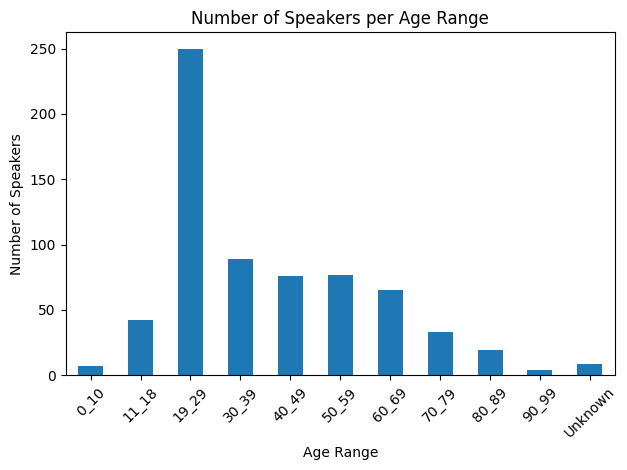

In [42]:
import matplotlib.pyplot as plt

# Assuming df_speakers_meta is already in your environment
# Count the number of speakers in each age range
age_counts = df_speakers_meta['agerange'].value_counts().sort_index()

# Plot bar chart
plt.figure()
age_counts.plot(kind='bar')
plt.title('Number of Speakers per Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Speakers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
# 1. Check POS class distribution
if 'pos' in df_tagged.columns:
    print("=== POS Classes ===")
    pos_counts = df_tagged['pos'].value_counts().head(20)
    print(f"Total unique POS tags: {len(df_tagged['pos'].unique())}")
    print(pos_counts)
    print()

# 2. Check word class distribution
if 'class' in df_tagged.columns:
    print("=== Word Classes ===")
    class_counts = df_tagged['class'].value_counts()
    print(f"Total unique word classes: {len(df_tagged['class'].unique())}")
    print(class_counts)
    print()

# 3. Check USAS semantic categories if available
if 'usas' in df_tagged.columns:
    print("=== USAS Semantic Categories ===")
    # USAS tags can be complex, so we'll just count the main category
    df_tagged['usas_main'] = df_tagged['usas'].str.split(':').str[0]
    usas_counts = df_tagged['usas_main'].value_counts().head(20)
    print(f"Total unique USAS main categories: {len(df_tagged['usas_main'].unique())}")
    print(usas_counts)
    print()

# 4. Check speaker metadata classes
print("=== Speaker Metadata Columns ===")
print(df_speakers_meta.columns.tolist())
print()

# 5. Examine distribution of age ranges
print("=== Age Range Distribution ===")
print(df_speakers_meta['agerange'].value_counts().sort_index())
print()

# 6. Examine distribution of gender if available
if 'gender' in df_speakers_meta.columns:
    print("=== Gender Distribution ===")
    print(df_speakers_meta['gender'].value_counts())
    print()

# 7. Examine other categorical variables in speaker metadata
categorical_columns = [col for col in df_speakers_meta.columns 
                       if df_speakers_meta[col].dtype == 'object' 
                       and col not in ['agerange', 'gender', 'age_group']]

for col in categorical_columns[:5]:  # Limit to first 5 to avoid too much output
    print(f"=== {col} Distribution ===")
    value_counts = df_speakers_meta[col].value_counts()
    print(f"Total unique values: {len(value_counts)}")
    print(value_counts.head(10))  # Show just top 10 values
    print()

=== POS Classes ===
Total unique POS tags: 253
pos
NN1      804828
UH       705589
RR       604976
PPIS1    431804
JJ       424485
II       421085
VBZ      353579
PPH1     351083
VVI      343636
VV0      336250
CC       315938
PPY      309074
AT       308987
XX       243815
AT1      225030
DD1      214510
YQUE     212311
VM       204697
NN2      201278
NP1      174392
Name: count, dtype: int64

=== Word Classes ===
Total unique word classes: 11
class
VERB      2602030
PRON      1935029
ADV       1382350
SUBST     1348847
ADJ        933980
PREP       827998
INTERJ     705677
CONJ       681546
ART        534017
STOP       212316
UNC         99097
Name: count, dtype: int64

=== USAS Semantic Categories ===
Total unique USAS main categories: 116
usas_main
Z5     2415314
Z8     1973582
Z4     1069595
A3      571754
T1      328071
Z6      258970
N5      229693
X2      215487
        212316
A13     200993
A9      196595
A5      196194
A7      180152
A1      177843
M1      160444
M6      15679

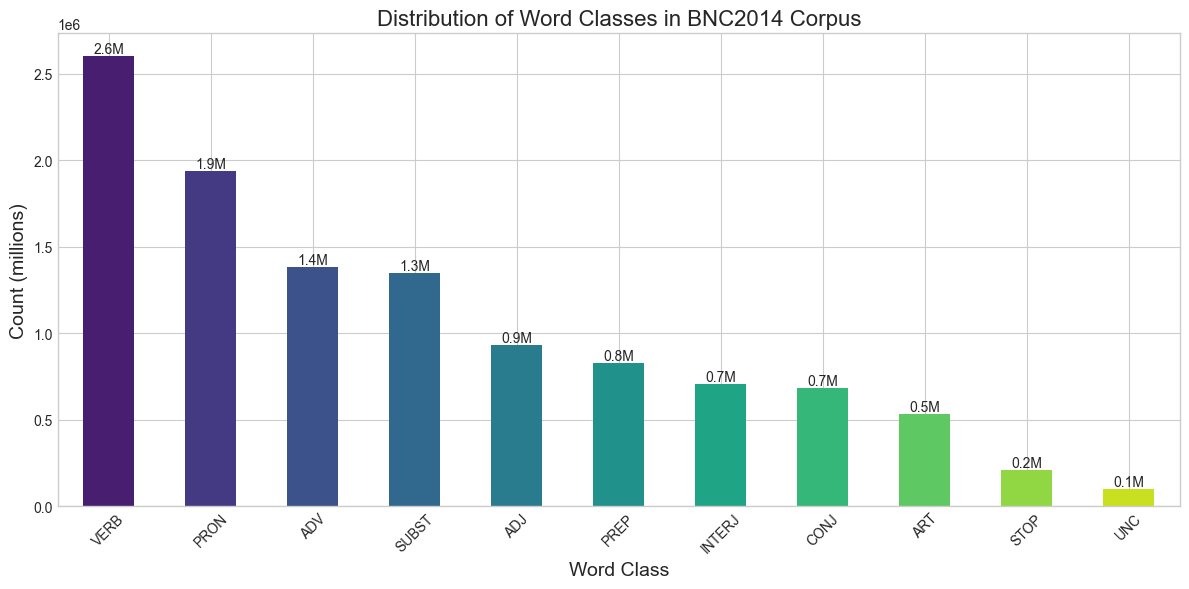

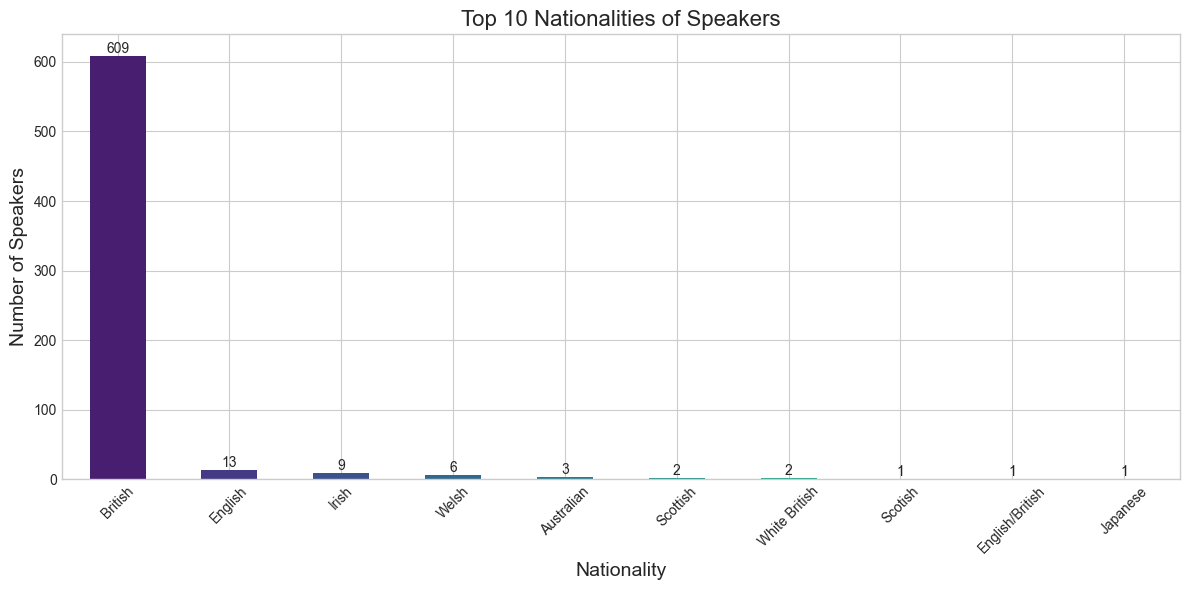

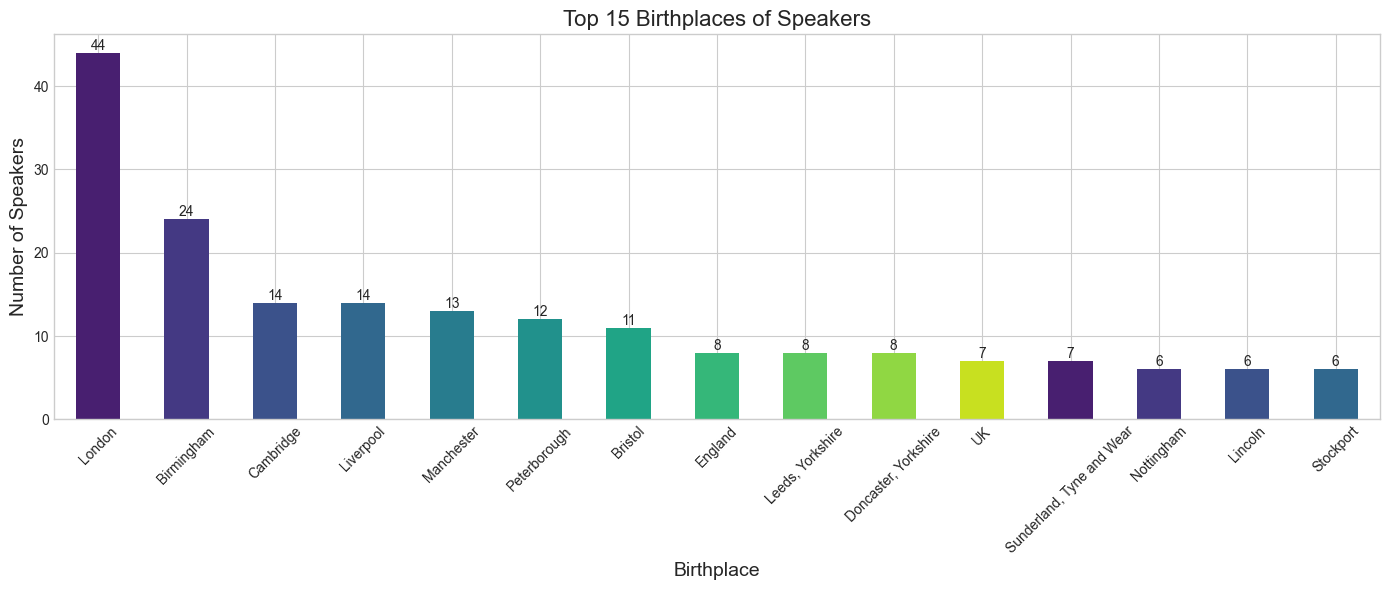

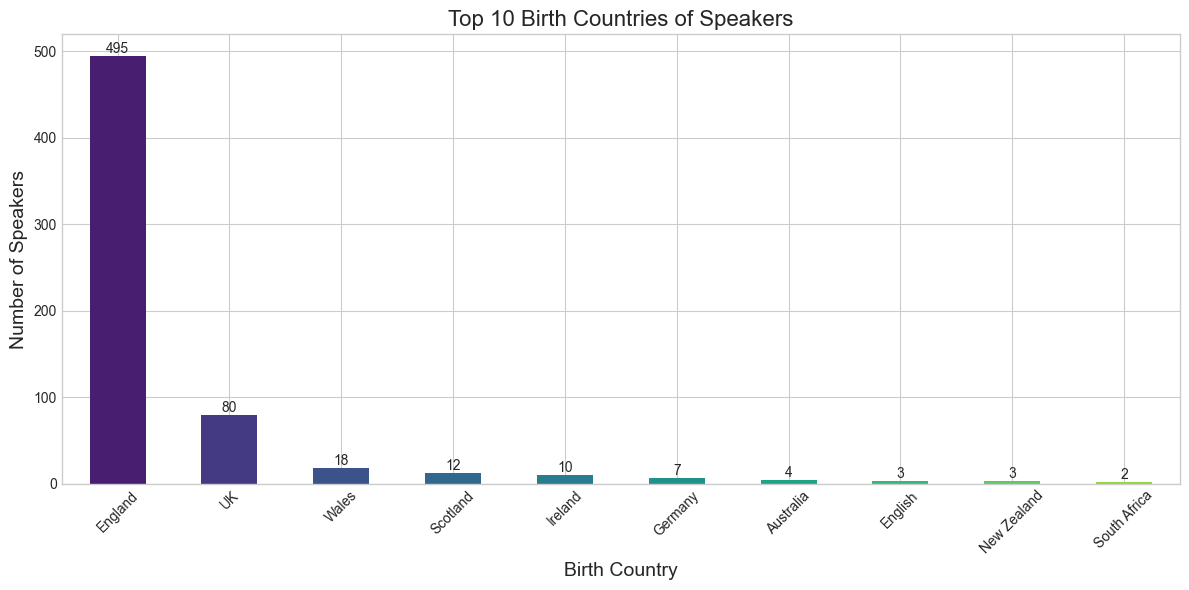

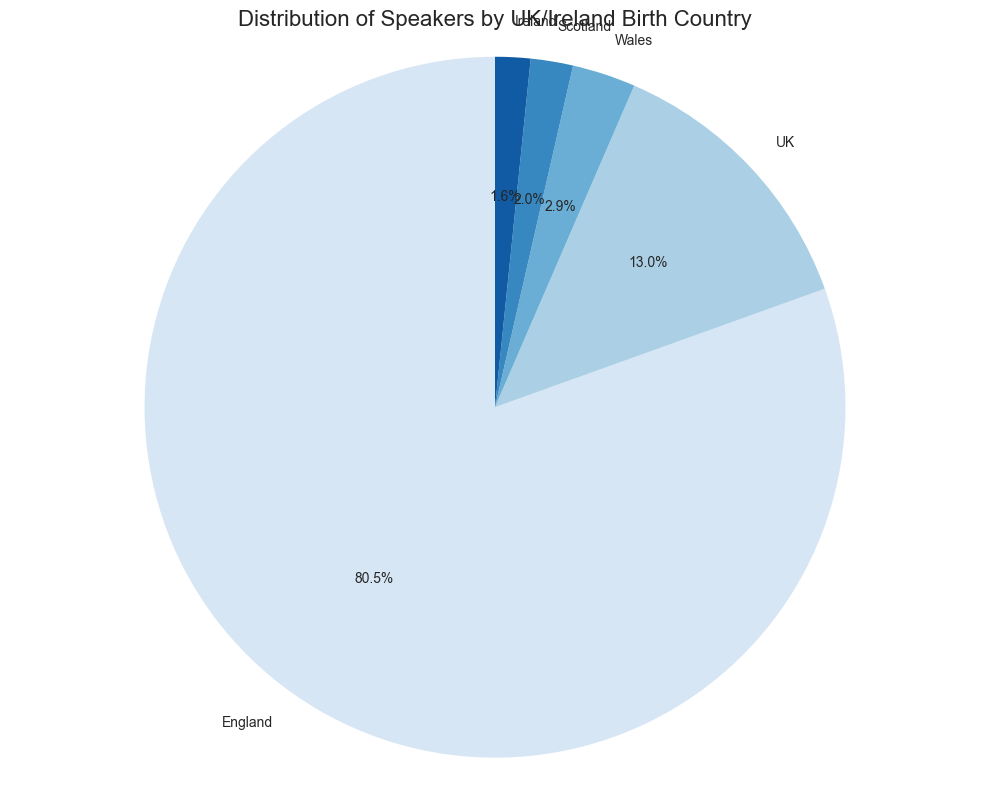

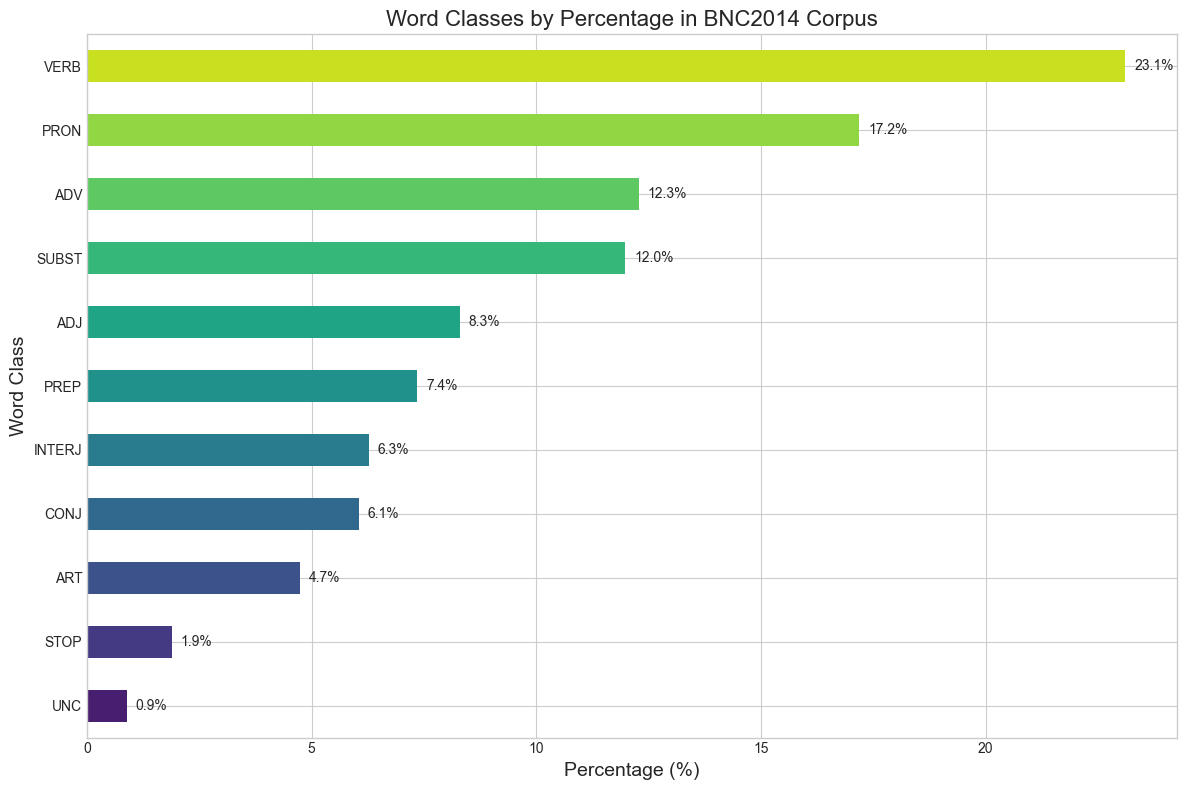

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set a nice aesthetic style
plt.style.use('seaborn-v0_8-whitegrid')
colors = sns.color_palette('viridis', 11)

# 1. Visualize Word Classes
plt.figure(figsize=(12, 6))
class_counts = df_tagged['class'].value_counts()
ax = class_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Word Classes in BNC2014 Corpus', fontsize=16)
plt.xlabel('Word Class', fontsize=14)
plt.ylabel('Count (millions)', fontsize=14)
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, count in enumerate(class_counts):
    count_in_millions = count / 1_000_000
    ax.text(i, count, f'{count_in_millions:.1f}M', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Visualize Top 10 Nationalities
plt.figure(figsize=(12, 6))
nat_counts = df_speakers_meta['nat'].value_counts().head(10)
ax = nat_counts.plot(kind='bar', color=colors[:len(nat_counts)])
plt.title('Top 10 Nationalities of Speakers', fontsize=16)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Number of Speakers', fontsize=14)
plt.xticks(rotation=45)

# Add count labels
for i, count in enumerate(nat_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 3. Visualize Top 15 Birthplaces
plt.figure(figsize=(14, 6))
birthplace_counts = df_speakers_meta['birthplace'].value_counts().head(15)
ax = birthplace_counts.plot(kind='bar', color=colors[:len(birthplace_counts)])
plt.title('Top 15 Birthplaces of Speakers', fontsize=16)
plt.xlabel('Birthplace', fontsize=14)
plt.ylabel('Number of Speakers', fontsize=14)
plt.xticks(rotation=45)

# Add count labels
for i, count in enumerate(birthplace_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Visualize Birth Countries
plt.figure(figsize=(12, 6))
birthcountry_counts = df_speakers_meta['birthcountry'].value_counts().head(10)
ax = birthcountry_counts.plot(kind='bar', color=colors[:len(birthcountry_counts)])
plt.title('Top 10 Birth Countries of Speakers', fontsize=16)
plt.xlabel('Birth Country', fontsize=14)
plt.ylabel('Number of Speakers', fontsize=14)
plt.xticks(rotation=45)

# Add count labels
for i, count in enumerate(birthcountry_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Create pie chart for UK countries breakdown
uk_countries = df_speakers_meta['birthcountry'].value_counts()
uk_countries = uk_countries[uk_countries.index.isin(['England', 'Scotland', 'Wales', 'UK', 'Ireland'])]

plt.figure(figsize=(10, 8))
plt.pie(uk_countries, labels=uk_countries.index, autopct='%1.1f%%', 
        colors=sns.color_palette('Blues', len(uk_countries)), startangle=90)
plt.title('Distribution of Speakers by UK/Ireland Birth Country', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# 6. Create a horizontal bar chart for word classes by percentage
total_words = class_counts.sum()
class_percentages = (class_counts / total_words * 100).sort_values(ascending=True)

plt.figure(figsize=(12, 8))
ax = class_percentages.plot(kind='barh', color=sns.color_palette('viridis', len(class_percentages)))
plt.title('Word Classes by Percentage in BNC2014 Corpus', fontsize=16)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Word Class', fontsize=14)

# Add percentage labels
for i, percentage in enumerate(class_percentages):
    ax.text(percentage + 0.2, i, f'{percentage:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Age ranges in the data:
agerange
19_29      250
30_39       89
50_59       77
40_49       76
60_69       65
11_18       42
70_79       33
80_89       19
Unknown      9
0_10         7
90_99        4
Name: count, dtype: int64
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown

Age groups after classification:
age_group
Young Adults (19-29)    250
Adults (30-59)          242
Seniors (60+)           121
Youngsters (0-18)        49
Name: count, dtype: int64


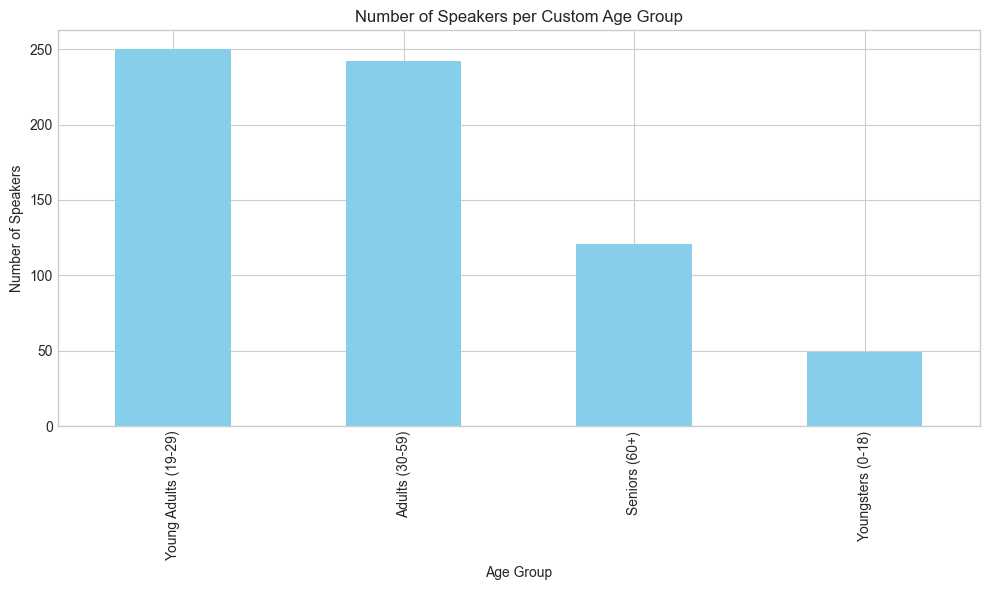


Top 20 words for Youngsters (0-18): (excluding PRON, PREP, CONJ, ART, STOP, UNC)
mum: 1014
five: 599
four: 536
play: 505
du: 498
sure: 491
different: 479
called: 468
dad: 456
person: 450
wait: 449
sorry: 444
bad: 438
ten: 434
funny: 421
being: 419
half: 409
school: 402
six: 402
find: 390

Top 20 words for Young Adults (19-29): (excluding PRON, PREP, CONJ, ART, STOP, UNC)
mum: 2946
fine: 2751
bad: 2750
feel: 2625
money: 2579
dad: 2579
being: 2578
sure: 2516
getting: 2388
love: 2318
sorry: 2317
different: 2316
shit: 2274
four: 2273
night: 2262
week: 2247
five: 2227
du: 2172
house: 2153
weird: 2081

Top 20 words for Adults (30-59): (excluding PRON, PREP, CONJ, ART, STOP, UNC)
different: 2867
dad: 2611
four: 2527
mum: 2499
getting: 2498
money: 2437
being: 2423
another: 2422
week: 2419
five: 2385
house: 2365
having: 2300
sure: 2279
give: 2274
new: 2156
wo: 2140
end: 2118
sorry: 2101
thinking: 2039
next: 2026

Top 20 words for Seniors (60+): (excluding PRON, PREP, CONJ, ART, STOP, UNC)
mone

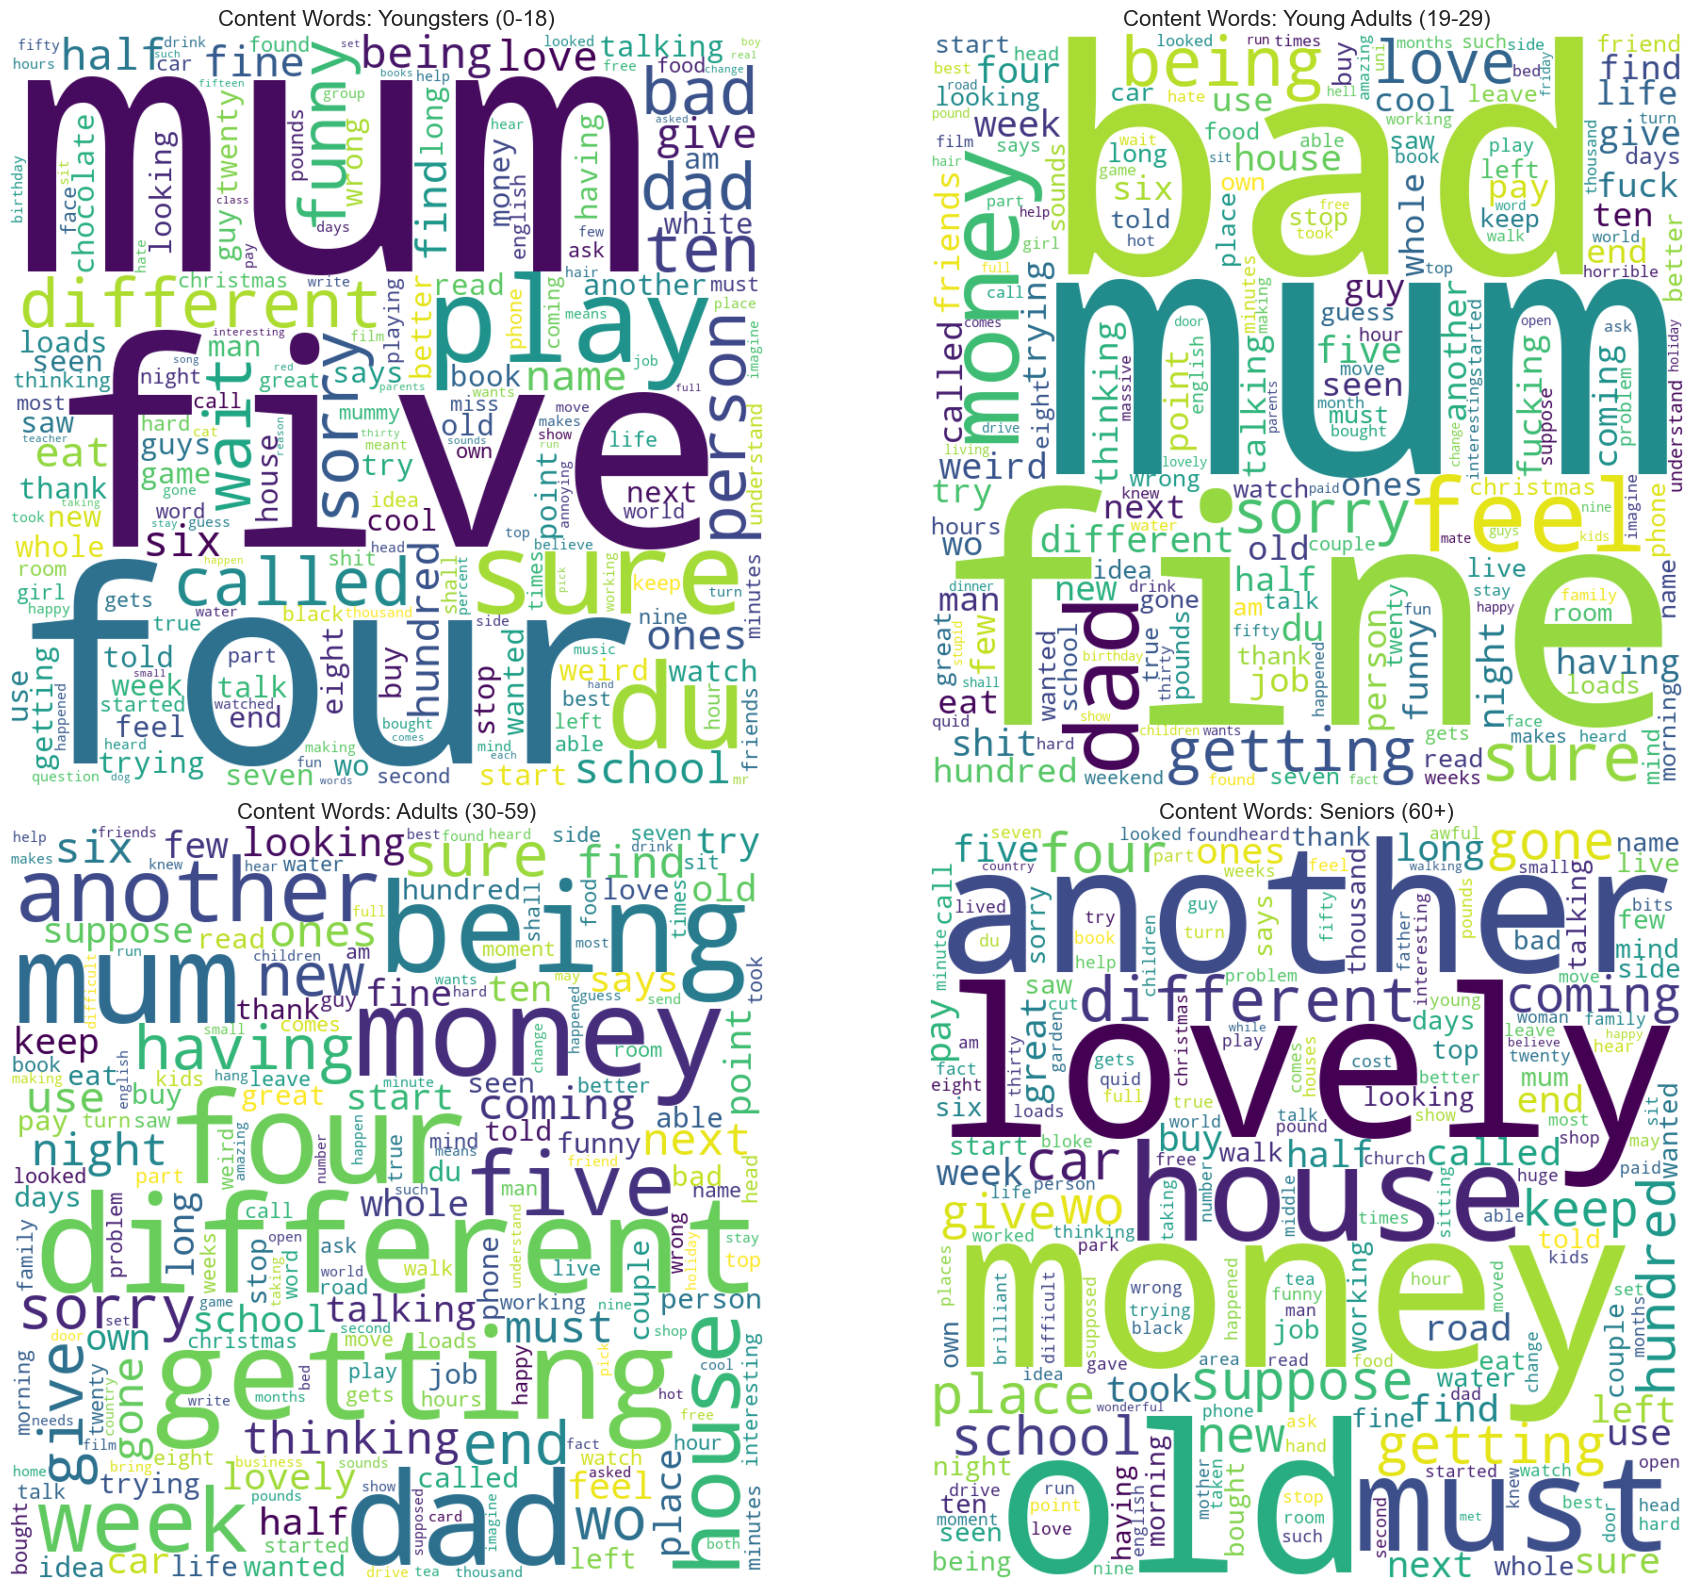


Summary: Successfully created word clouds for 4 age groups.

Word class distribution before filtering:
class
VERB      2602030
PRON      1935029
ADV       1382350
SUBST     1348847
ADJ        933980
PREP       827998
INTERJ     705677
CONJ       681546
ART        534017
STOP       212316
UNC         99097
Name: count, dtype: int64

Word class distribution after filtering:
class
VERB     2602030
SUBST    1348847
ADJ       933980
Name: count, dtype: int64

Removed 6378030 words (56.6% of total)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter

# First, examine the actual format of the age ranges
print("Age ranges in the data:")
print(df_speakers_meta['agerange'].value_counts())

# Updated function to handle different age range formats more robustly
def map_to_age_group(age_range):
    """
    Map BNC age ranges to four custom age groups
    
    Parameters:
    -----------
    age_range : str
        Age range string from the BNC metadata (e.g., '0_18', '19-29')
        
    Returns:
    --------
    str
        Mapped age group category
    """
    if pd.isna(age_range):
        return np.nan
    
    try:
        # Check if the format uses underscore or hyphen
        if '_' in str(age_range):
            ages = str(age_range).split('_')
        elif '-' in str(age_range):
            ages = str(age_range).split('-')
        else:
            print(f"Unexpected age range format: {age_range}")
            return np.nan
            
        # Convert to integers, handling potential errors
        try:
            lower = int(ages[0])
            upper = int(ages[1])
        except (ValueError, IndexError):
            print(f"Could not parse age range values from '{age_range}'")
            return np.nan
        
        # Map based on upper bound of range
        if upper <= 18:
            return "Youngsters (0-18)"
        elif upper <= 29:
            return "Young Adults (19-29)"
        elif upper <= 59:
            return "Adults (30-59)"
        else:
            return "Seniors (60+)"
    except Exception as e:
        print(f"Error processing age range '{age_range}': {e}")
        return np.nan

# Apply the mapping to create a new column in speaker metadata
df_speakers_meta['age_group'] = df_speakers_meta['agerange'].apply(map_to_age_group)

# Check if we have valid age groups
print("\nAge groups after classification:")
age_group_counts = df_speakers_meta['age_group'].value_counts()
print(age_group_counts)

# Only proceed with visualization if we have data
if len(age_group_counts) > 0:
    # Visualize the distribution
    plt.figure(figsize=(10, 6))
    age_group_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Speakers per Custom Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Speakers')
    plt.tight_layout()
    plt.show()
else:
    print("No valid age groups found. Check the data and classification function.")
    
# Create a dataframe that includes words with age group information AND word class
words_with_age = df_tagged.merge(
    df_speakers_meta[['age_group']], 
    left_on='speaker_id', 
    right_index=True,
    how='left'
)

# Define word classes to exclude (function words and other non-content words)
excluded_word_classes = ['PRON', 'PREP', 'CONJ', 'ART', 'STOP', 'UNC', 'INTERJ', 'ADV']

# Define stopwords to exclude from the word clouds
stopwords = set([
    # Common English stopwords
    'the', 'and', 'to', 'a', 'of', 'in', 'i', 'it', 'that', 'you', 'is', 
    'for', 'on', 'have', 'with', 'be', 'this', 'are', 'was', 'but', 'not', 
    'they', 'so', 'we', 'what', 
    
    # Fillers and hesitation markers
    'um', 'er', 'erm', 'eh', 'mm', 'uhuh', 'uh', 'oh', 'yeah', 'no', 'yes', 
    'well', 'just', 'like', 
    
    # More common words
    'there', 'then', 'do', 'can', 'would', 'will', 'if', 'or', 'from', 'an', 'at', 
    'by', 'your', 'my', 'their', 'his', 'her', 'our', 'as', 'all', 'about', 'because', 
    'been', 'has', 'had', 'get', 'got', 'very', 'really', 'some', 'which', 'when', 'where', 
    'how', 'why', 'who', 'them', 'these', 'those', 'did', 'does', 'doing', 'done', 'gonna',
    'go', 'say', 'said', 'one', 'two', 'three', 'know', 'think', 'make', 'see', 'look',
    'time', 'way', 'right', 'going', 'come', 'came', 'actually', 'probably', 'maybe',
    'could', 'should', 'would', 'might', 'up', 'down', 'over', 'under', 'out', 'in',
    
    # Contractions and special BNC tokens
    'nt','unclearword','he','she','re','cos','anonnamem','ve','me','anonnamef','were','ll',
    'na','gon','anonplace','ca','sort', 'kind', 'kind of', 'sort', 'sort of', 'type', 
    'type of', 'ish', 'approximately', 'around', 'mostly', 'almost', 'nearly', 'fairly', 
    'quite', 'somewhat', 'ah', 'back', 'here', 'off', 'lot', 'little', 'any', 'nice', 
    'big', 'still', 'day', 'always', 'never', 'thought', 'saying', 'anonnamen',
    
    # Common discourse markers
    'anyway', 'anyhow', 'actually', 'right', 'okay', 'ok', 'alright',
    'so yeah', 'you know', 'you see', 'I mean', 'I guess', 'I suppose',
    
    # Additional common words
    'ah', 'back', 'big', 'day', 'first', 'god', 'here', 'into',
    'little', 'lot', 'many', 'never', 'off', 'always', 'any', 'remember', 'saying',
    'still', 'take', 'thought', 'too', 'wan', 'went', 'work', 'year', 'years', 'us',
    'totally', 'completely', 'absolutely', 'definitely', 'literally', 'extremely', 
    'utterly', 'entirely', 'deeply', 'highly', 'particularly', 'just a bit', 'a bit', 
    'a little', 'a lot', 'lots', 'thing', 'things', 'stuff', 'something', 'anything', 
    'anything else', 'something else', 'someone', 'somebody', 'anyone', 'anybody', 
    'everyone', 'everybody', 'people', 'back', 'here', 'ah', 'made', 'tell', 'goes', 
    'looks', 'now', 'then', 'soon', 'later', 'currently', 'recently', 'already',
    'wow', 'ugh', 'huh', 'hmm', 'aha', 'oops', 'yay', 'meh', 'let', 'yeah', 'nah', 
    'mhm', 'yep', 'yup', 'okay', 'good', 'people', 'something', 'want', 'now', 'bit',
    'thing', 'more', 'mean', 'him', 'need', 'put', 'much', 'even', 'only', 'though', 
    'other', 'last', 'used', 'same'
])

# Function to clean and preprocess words
def clean_word(word):
    """
    Clean and normalize a word for analysis.
    
    Parameters:
    -----------
    word : str
        The word to clean
        
    Returns:
    --------
    str
        Cleaned word (lowercase, no punctuation or numbers)
    """
    if pd.isna(word):
        return ""
    # Convert to lowercase
    word = str(word).lower()
    # Remove punctuation and numbers
    word = re.sub(r'[^\w\s]', '', word)
    word = re.sub(r'\d+', '', word)
    return word

# Generate word clouds for each age group
age_groups = ["Youngsters (0-18)", "Young Adults (19-29)", "Adults (30-59)", "Seniors (60+)"]

# Create a figure for word clouds
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

# Track valid age groups
valid_groups = []

for i, age_group in enumerate(age_groups):
    # Filter data for this age group
    age_group_data = words_with_age[words_with_age['age_group'] == age_group]
    
    # Filter out unwanted word classes
    filtered_data = age_group_data[~age_group_data['class'].isin(excluded_word_classes)]
    
    # Get content words after filtering
    group_words = filtered_data['word'].dropna()
    
    if len(group_words) == 0:
        axes[i].text(0.5, 0.5, f"No data for {age_group}", 
                    horizontalalignment='center', verticalalignment='center', fontsize=14)
        axes[i].set_title(f"{age_group}", fontsize=16)
        axes[i].axis('off')
        continue
    
    valid_groups.append(age_group)
    
    # Clean words and filter stopwords
    clean_words = [clean_word(word) for word in group_words]
    clean_words = [word for word in clean_words if word and word not in stopwords and len(word) > 1]
    
    # Count word frequencies
    word_counts = Counter(clean_words)
    
    # Print top words for this group
    print(f"\nTop 20 words for {age_group}: (excluding PRON, PREP, CONJ, ART, STOP, UNC)")
    for word, count in word_counts.most_common(20):
        print(f"{word}: {count}")
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800, 
        height=800,
        background_color='white',
        colormap='viridis',
        max_words=200,
        contour_width=1,
        contour_color='steelblue'
    ).generate_from_frequencies(word_counts)
    
    # Plot the word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"Content Words: {age_group}", fontsize=16)
    axes[i].axis('off')

# Show the word clouds
plt.tight_layout()
plt.show()

# Report on overall analysis
print(f"\nSummary: Successfully created word clouds for {len(valid_groups)} age groups.")
if len(valid_groups) < len(age_groups):
    print(f"Missing data for: {', '.join(set(age_groups) - set(valid_groups))}")

# Print word class distribution before and after filtering
before_counts = words_with_age['class'].value_counts()
after_counts = words_with_age[~words_with_age['class'].isin(excluded_word_classes)]['class'].value_counts()

print("\nWord class distribution before filtering:")
print(before_counts)

print("\nWord class distribution after filtering:")
print(after_counts)

print(f"\nRemoved {before_counts.sum() - after_counts.sum()} words ({(1 - after_counts.sum()/before_counts.sum())*100:.1f}% of total)")

Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Unexpected age range format: Unknown
Age groups after classification:
age_group
Young Adults (19-29)    250
Adults (30-59)          242
Seniors (60+)           121
Youngsters (0-18)        49
Name: count, dtype: int64


C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\3685557138.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values,


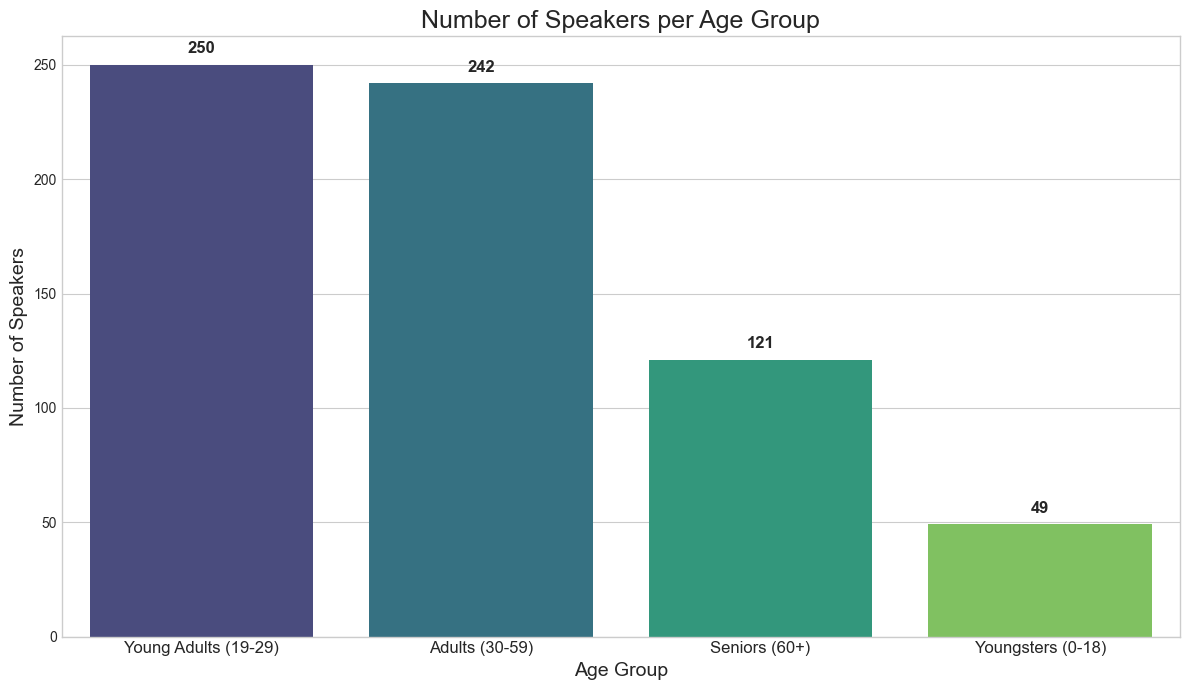

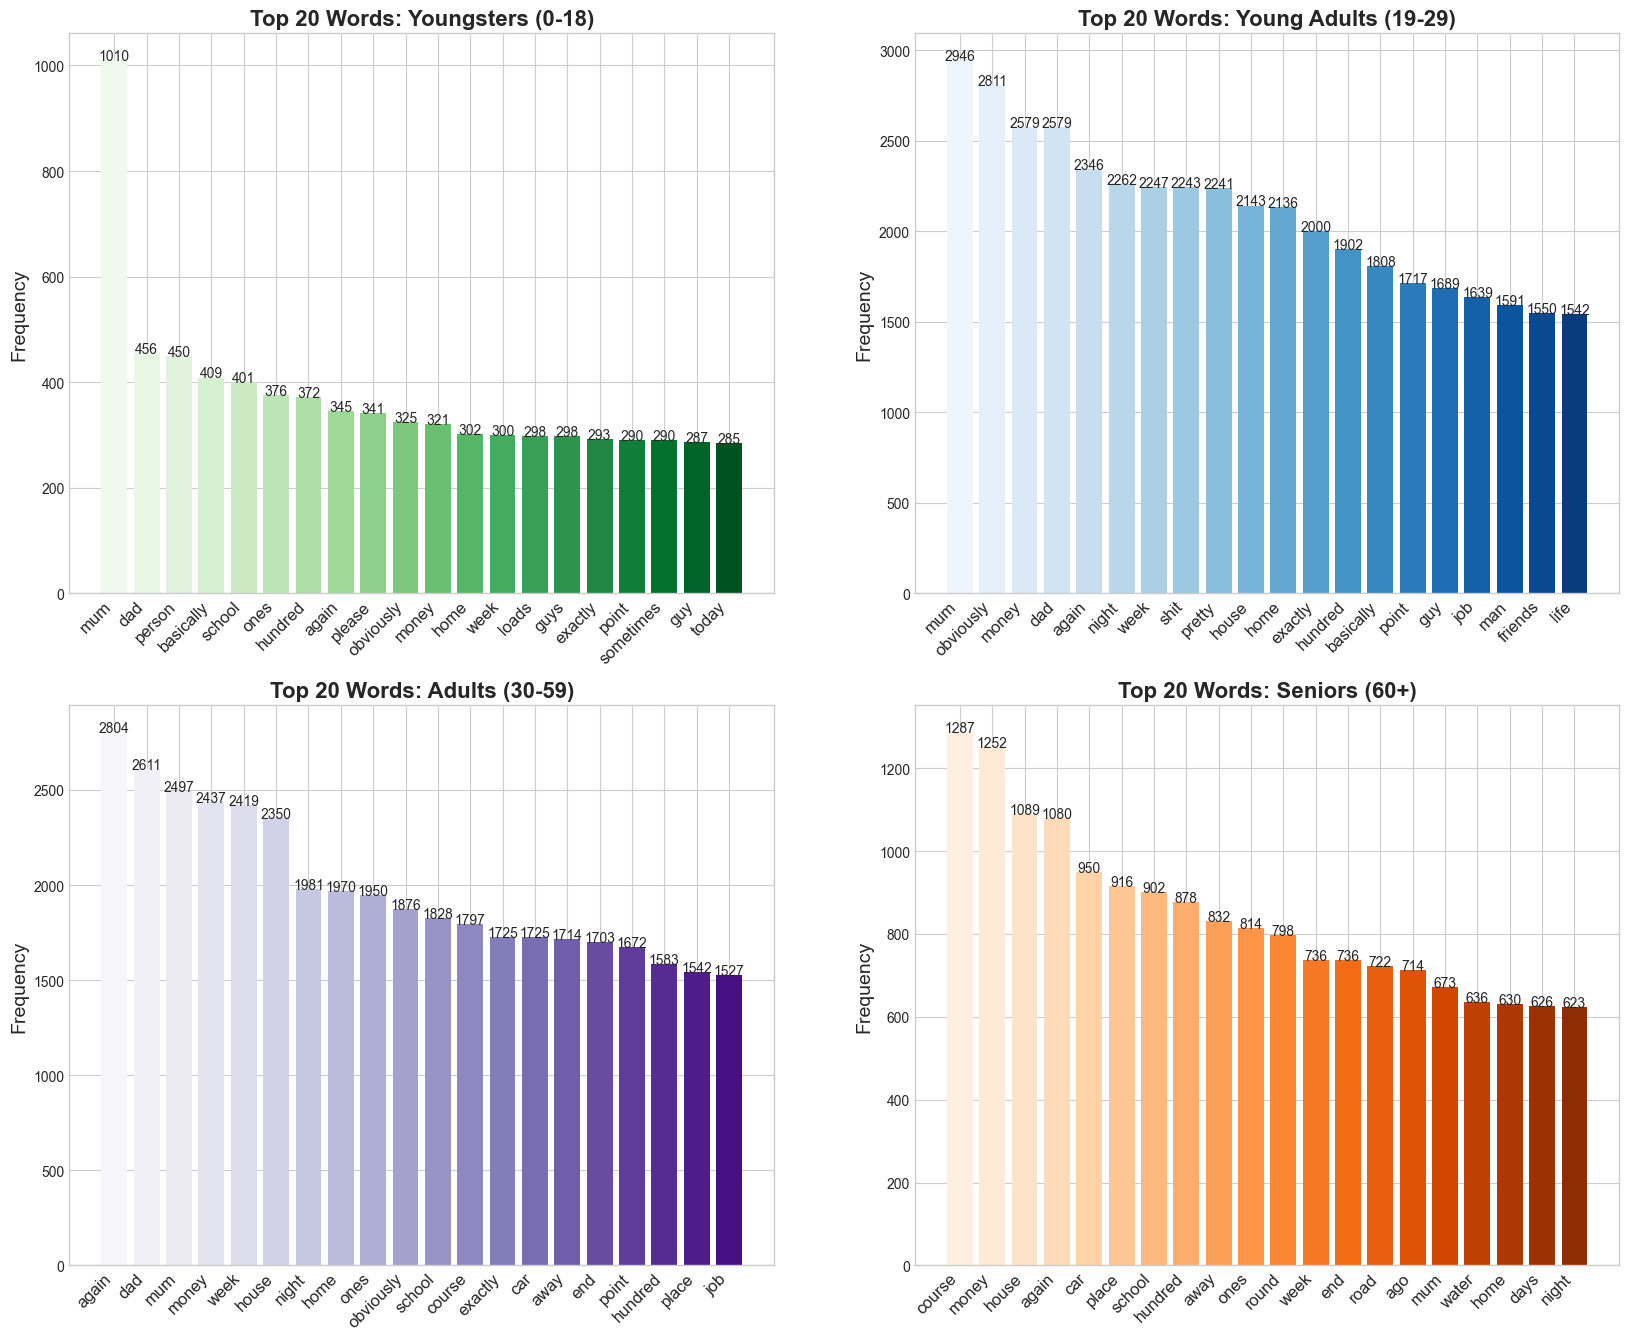

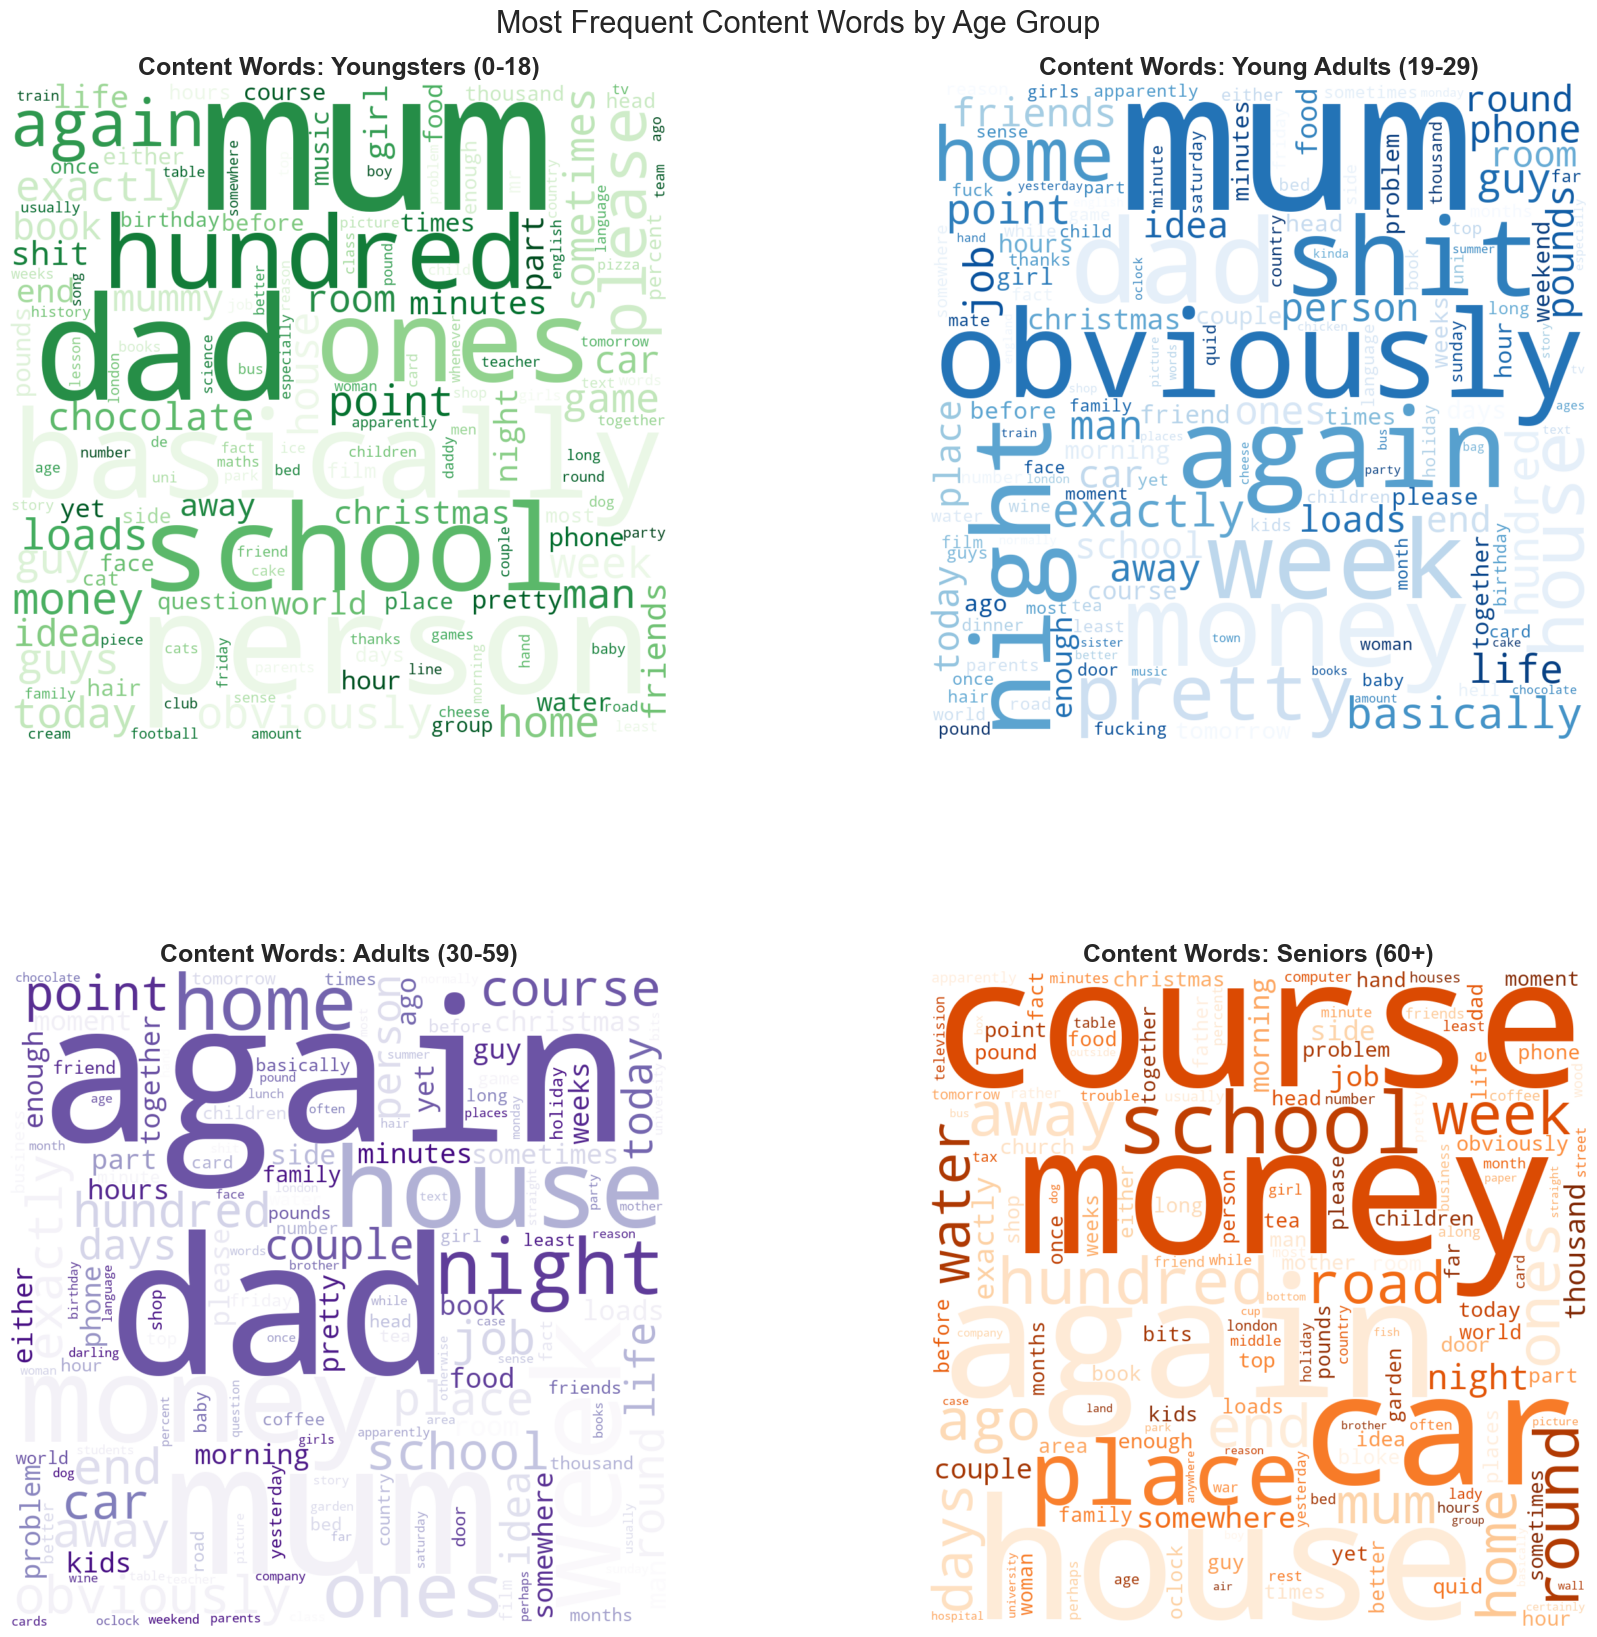

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

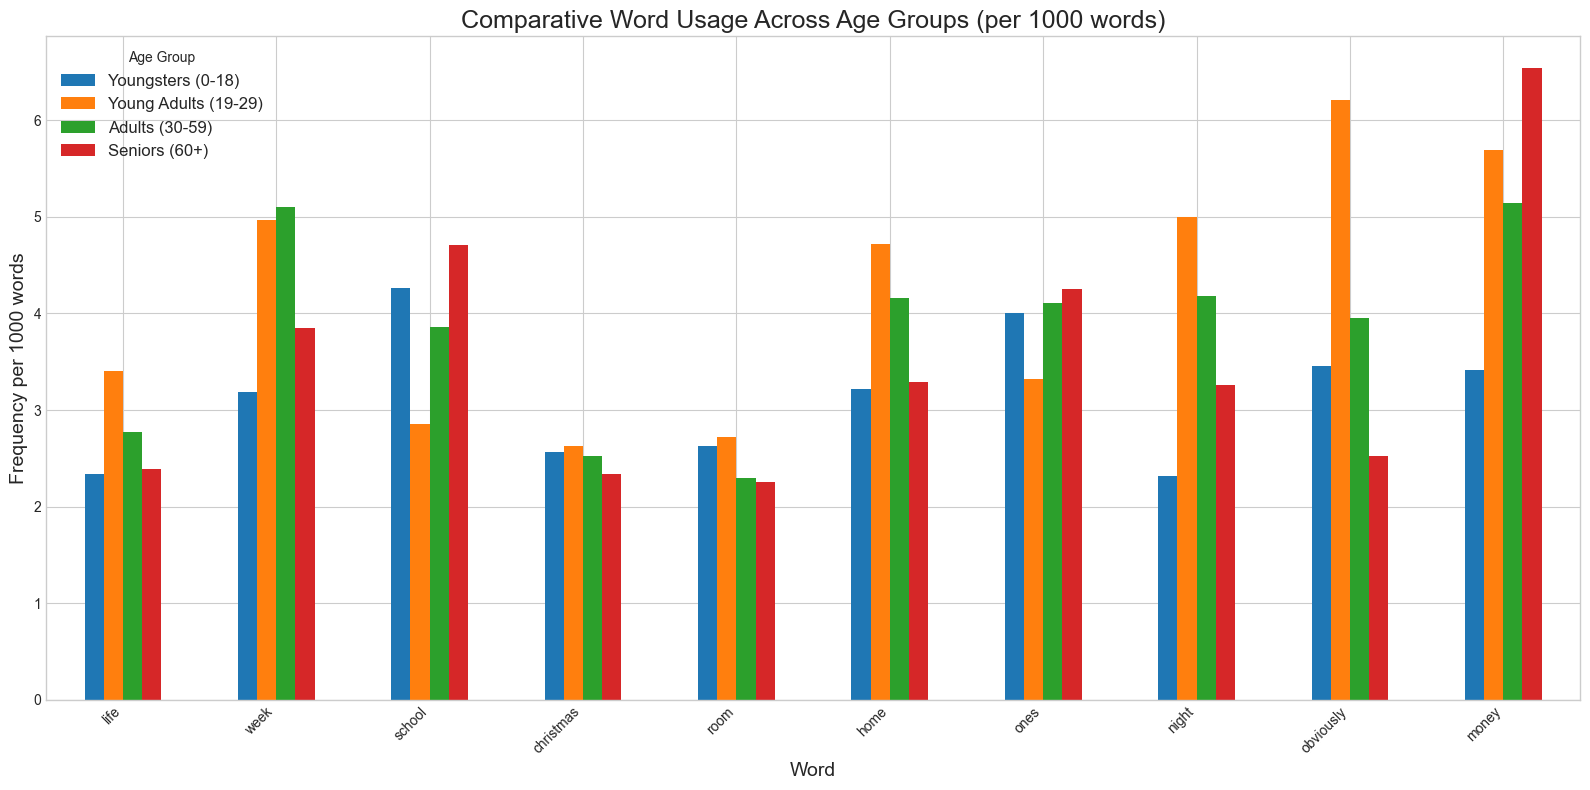

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter
import seaborn as sns

# Apply the age group mapping
df_speakers_meta['age_group'] = df_speakers_meta['agerange'].apply(map_to_age_group)

# Display age group distribution
age_group_counts = df_speakers_meta['age_group'].value_counts().sort_values(ascending=False)
print("Age groups after classification:")
print(age_group_counts)

# Visualize age group distribution
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, 
                 palette='viridis')
plt.title('Number of Speakers per Age Group', fontsize=18)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Speakers', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Add count labels on top of bars
for i, count in enumerate(age_group_counts):
    ax.text(i, count + 5, str(count), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Create a dataframe with words and age group information
words_with_age = df_tagged.merge(
    df_speakers_meta[['age_group']], 
    left_on='speaker_id', 
    right_index=True,
    how='left'
)

# Define word classes to exclude (focusing primarily on content words)
excluded_word_classes = ['PRON', 'PREP', 'CONJ', 'ART', 'STOP','VERB','ADJ','INTERJ','UNC'] #INTERJ ADV

# Define stopwords
stopwords = set([
    'the', 'and', 'to', 'a', 'of', 'in', 'i', 'it', 'that', 'you', 'is', 
    'for', 'on', 'have', 'with', 'be', 'this', 'are', 'was', 'but', 'not',
    'they', 'so', 'we', 'what', 'um', 'er', 'erm', 'eh', 'mm', 'uhuh', 'uh',
    'the', 'and', 'to', 'a', 'of', 'in', 'i', 'it', 'that', 'you', 'is', 
    'for', 'on', 'have', 'with', 'be', 'this', 'are', 'was', 'but', 'not', 
    'they', 'so', 'we', 'what', 'um', 'er', 'erm', 'eh', 'mm', 'uhuh', 'uh',
    'oh', 'yeah', 'no', 'yes', 'well', 'just', 'like', 'there', 'then', 'do',
    'can', 'would', 'will', 'if', 'or', 'from', 'an', 'at', 'by', 'your', 'my',
    'their', 'his', 'her', 'our', 'as', 'all', 'about', 'because', 'been', 'has',
    'had', 'get', 'got', 'very', 'really', 'some', 'which', 'when', 'where', 'how',
    'why', 'who', 'them', 'these', 'those', 'did', 'does', 'doing', 'done', 'gonna',
    'go', 'say', 'said', 'one', 'two', 'three', 'know', 'think', 'make', 'see', 'look',
    'time', 'way', 'right', 'going', 'come', 'came', 'actually', 'probably', 'maybe',
    'could', 'should', 'would', 'might', 'up', 'down', 'over', 'under', 'out', 'in',
    'nt','unclearword','he','she','re','cos','anonnamem','ve','me','anonnamef','were','ll',
    'na','gon','anonplace','ca','sort',
    'kind', 'kind of', 'sort', 'sort of', 'type', 'type of', 'ish', 'approximately',
    'around', 'mostly', 'almost', 'nearly', 'fairly', 'quite', 'somewhat','ah', 'back', 'here', 'off',
    'lot', 'little', 'any','nice', 'big','still', 'day','always', 'never','thought', 'saying','anonnamen',
    'anyway', 'anyhow', 'actually', 'right', 'okay', 'ok', 'alright',
    'so yeah', 'you know', 'you see', 'I mean', 'I guess', 'I suppose',
    'ah', 'back', 'big', 'day', 'first', 'god', 'here', 'into',
    'little', 'lot', 'many', 
    'never', 'off', 'always', 'any', 'remember', 'saying',
    'still', 'take', 'thought', 'too', 'wan', 'went', 'work',
    'year', 'years', 'us','du',
    'totally', 'completely', 'absolutely', 'definitely', 'literally',
    'extremely', 'utterly', 'entirely', 'deeply', 'highly', 'particularly',
    'just a bit', 'a bit', 'a little', 'a lot', 'lots',
    'thing', 'things', 'stuff', 'something', 'anything', 'anything else',
    'something else', 'someone', 'somebody', 'anyone', 'anybody', 'everyone',
    'everybody', 'people','back', 'here', 'ah', 'made', 'tell', 'goes', 'looks',
    'now', 'then', 'soon', 'later', 'currently', 'recently', 'already',
    'wow', 'ugh', 'huh', 'hmm', 'aha', 'oops', 'yay', 'meh','let',
    'yeah', 'nah', 'mhm', 'yep', 'yup',
    'okay', 'good', 'people', 'something', 'want', 'now', 'bit',
    'thing', 'more', 'mean', 'him', 'need', 'put', 'much', 'even',
    'only', 'though', 'other','use','word','used','gets' ,'must','give','ask','find','wo','gone','called','next',
    'same','last','name','also','else','ever'
])

# Function to clean words
def clean_word(word):
    if pd.isna(word):
        return ""
    word = str(word).lower()
    word = re.sub(r'[^\w\s]', '', word)
    word = re.sub(r'\d+', '', word)
    return word

# Age groups to analyze
age_groups = ["Youngsters (0-18)", "Young Adults (19-29)", "Adults (30-59)", "Seniors (60+)"]

# Create a figure for the top words bar charts
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

# Store word frequencies for each age group
all_word_counts = {}

# Create a figure for word clouds
fig_cloud, cloud_axes = plt.subplots(2, 2, figsize=(20, 16))
cloud_axes = cloud_axes.flatten()

# Track valid age groups
valid_groups = []

# Define color palettes for each age group
color_palettes = {
    "Youngsters (0-18)": "Greens",
    "Young Adults (19-29)": "Blues", 
    "Adults (30-59)": "Purples",
    "Seniors (60+)": "Oranges"
}

for i, age_group in enumerate(age_groups):
    # Filter data for this age group
    age_group_data = words_with_age[words_with_age['age_group'] == age_group]
    
    # Filter out unwanted word classes
    filtered_data = age_group_data[~age_group_data['class'].isin(excluded_word_classes)]
    
    # Get content words after filtering
    group_words = filtered_data['word'].dropna()
    
    if len(group_words) == 0:
        axes[i].text(0.5, 0.5, f"No data for {age_group}", 
                    horizontalalignment='center', verticalalignment='center', fontsize=14)
        axes[i].set_title(f"{age_group}", fontsize=16)
        axes[i].axis('off')
        
        cloud_axes[i].text(0.5, 0.5, f"No data for {age_group}", 
                           horizontalalignment='center', verticalalignment='center', fontsize=14)
        cloud_axes[i].set_title(f"{age_group}", fontsize=16)
        cloud_axes[i].axis('off')
        continue
    
    valid_groups.append(age_group)
    
    # Clean words and filter stopwords
    clean_words = [clean_word(word) for word in group_words]
    clean_words = [word for word in clean_words if word and word not in stopwords and len(word) > 1]
    
    # Count word frequencies
    word_counts = Counter(clean_words)
    all_word_counts[age_group] = word_counts
    
    # Get top 20 words
    top_words = word_counts.most_common(20)
    words, counts = zip(*top_words)
    
    # Create bar chart for top words
    bar_colors = sns.color_palette(color_palettes[age_group], len(words))
    bars = axes[i].bar(range(len(words)), counts, color=bar_colors)
    axes[i].set_xticks(range(len(words)))
    axes[i].set_xticklabels(words, rotation=45, ha='right', fontsize=12)
    axes[i].set_title(f"Top 20 Words: {age_group}", fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Frequency', fontsize=14)
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', fontsize=10)
    
    # Generate enhanced word cloud
    wordcloud = WordCloud(
        width=1000, 
        height=1000,
        background_color='white',
        colormap=color_palettes[age_group],
        max_words=150,
        prefer_horizontal=0.9,
        # contour_width=1,
        # contour_color='lightgrey',
        font_path=None,  # You can specify a custom font if available
        min_font_size=10,
        max_font_size=300,
        random_state=42,
        relative_scaling=0.5,  # Scale word size by frequency but not too extreme
        collocations=False  # Avoid repeating word pairs
    ).generate_from_frequencies(word_counts)
    
    # Plot the word cloud
    cloud_axes[i].imshow(wordcloud, interpolation='bilinear')
    cloud_axes[i].set_title(f"Content Words: {age_group}", fontsize=18, fontweight='bold')
    cloud_axes[i].axis('off')

# Adjust layout for bar charts
plt.tight_layout()
plt.subplots_adjust(hspace=0.35)
plt.suptitle("Most Frequent Content Words by Age Group", fontsize=22, y=1.02)
plt.show()

# Adjust layout for word clouds
fig_cloud.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Word Clouds of Content Words by Age Group", fontsize=22, y=1.02)
plt.show()

# Create a comparative bar chart of shared words across age groups
common_words = set()
for group in valid_groups:
    top_words = set([word for word, _ in all_word_counts[group].most_common(50)])
    if not common_words:
        common_words = top_words
    else:
        common_words &= top_words

if common_words:
    common_words = list(common_words)[:10]  # Take up to 10 common words
    
    # Create dataframe for common words
    common_df = pd.DataFrame(index=common_words)
    
    for group in valid_groups:
        common_df[group] = [all_word_counts[group][word] for word in common_words]
    
    # Normalize by total words in each age group
    for group in valid_groups:
        total_words = sum(all_word_counts[group].values())
        common_df[f"{group}_norm"] = common_df[group] / total_words * 1000  # per 1000 words
    
    # Plot comparative frequencies (normalized)
    plt.figure(figsize=(16, 10))
    norm_cols = [col for col in common_df.columns if '_norm' in col]
    common_df_plot = common_df[norm_cols].copy()
    common_df_plot.columns = [col.replace('_norm', '') for col in norm_cols]
    
    common_df_plot.plot(kind='bar', figsize=(16, 8))
    plt.title('Comparative Word Usage Across Age Groups (per 1000 words)', fontsize=18)
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Frequency per 1000 words', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Age Group', fontsize=12)
    plt.tight_layout()
    plt.show()

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import re
from gensim.models import KeyedVectors
import gensim.downloader as gensim_downloader

# Define comprehensive stopwords list
stopwords = set([
    'the', 'and', 'to', 'a', 'of', 'in', 'i', 'it', 'that', 'you', 'is', 
    'for', 'on', 'have', 'with', 'be', 'this', 'are', 'was', 'but', 'not',
    'they', 'so', 'we', 'what', 'um', 'er', 'erm', 'eh', 'mm', 'uhuh', 'uh',
    'the', 'and', 'to', 'a', 'of', 'in', 'i', 'it', 'that', 'you', 'is', 
    'for', 'on', 'have', 'with', 'be', 'this', 'are', 'was', 'but', 'not', 
    'they', 'so', 'we', 'what', 'um', 'er', 'erm', 'eh', 'mm', 'uhuh', 'uh',
    'oh', 'yeah', 'no', 'yes', 'well', 'just', 'like', 'there', 'then', 'do',
    'can', 'would', 'will', 'if', 'or', 'from', 'an', 'at', 'by', 'your', 'my',
    'their', 'his', 'her', 'our', 'as', 'all', 'about', 'because', 'been', 'has',
    'had', 'get', 'got', 'very', 'really', 'some', 'which', 'when', 'where', 'how',
    'why', 'who', 'them', 'these', 'those', 'did', 'does', 'doing', 'done', 'gonna',
    'go', 'say', 'said', 'one', 'two', 'three', 'know', 'think', 'make', 'see', 'look',
    'time', 'way', 'right', 'going', 'come', 'came', 'actually', 'probably', 'maybe',
    'could', 'should', 'would', 'might', 'up', 'down', 'over', 'under', 'out', 'in',
    'nt','unclearword','he','she','re','cos','anonnamem','ve','me','anonnamef','were','ll',
    'na','gon','anonplace','ca','sort',
    'kind', 'kind of', 'sort', 'sort of', 'type', 'type of', 'ish', 'approximately',
    'around', 'mostly', 'almost', 'nearly', 'fairly', 'quite', 'somewhat','ah', 'back', 'here', 'off',
    'lot', 'little', 'any','nice', 'big','still', 'day','always', 'never','thought', 'saying','anonnamen',
    'anyway', 'anyhow', 'actually', 'right', 'okay', 'ok', 'alright',
    'so yeah', 'you know', 'you see', 'I mean', 'I guess', 'I suppose',
    'ah', 'back', 'big', 'day', 'first', 'god', 'here', 'into',
    'little', 'lot', 'many', 
    'never', 'off', 'always', 'any', 'remember', 'saying',
    'still', 'take', 'thought', 'too', 'wan', 'went', 'work',
    'year', 'years', 'us','du',
    'totally', 'completely', 'absolutely', 'definitely', 'literally',
    'extremely', 'utterly', 'entirely', 'deeply', 'highly', 'particularly',
    'just a bit', 'a bit', 'a little', 'a lot', 'lots',
    'thing', 'things', 'stuff', 'something', 'anything', 'anything else',
    'something else', 'someone', 'somebody', 'anyone', 'anybody', 'everyone',
    'everybody', 'people','back', 'here', 'ah', 'made', 'tell', 'goes', 'looks',
    'now', 'then', 'soon', 'later', 'currently', 'recently', 'already',
    'wow', 'ugh', 'huh', 'hmm', 'aha', 'oops', 'yay', 'meh','let',
    'yeah', 'nah', 'mhm', 'yep', 'yup',
    'okay', 'good', 'people', 'something', 'want', 'now', 'bit',
    'thing', 'more', 'mean', 'him', 'need', 'put', 'much', 'even',
    'only', 'though', 'other','use','word','used','gets' ,'must','give','ask','find','wo','gone','called','next',
    'same','last','name','also','else','ever'
])

# Load pre-trained word vectors
print("Loading word vectors...")
word_vectors = gensim_downloader.load('glove-wiki-gigaword-100')
print("Word vectors loaded!")

# Merge words data with age group information
words_with_age = df_tagged.merge(
    df_speakers_meta[['age_group']], 
    left_on='speaker_id', 
    right_index=True,
    how='left'
)

# Define word classes to exclude
excluded_word_classes = ['PRON', 'PREP', 'CONJ', 'ART', 'STOP', 'VERB', 'ADJ', 'INTERJ', 'UNC'] 

# Function to clean and preprocess words
def clean_word(word):
    if pd.isna(word):
        return ""
    # Convert to lowercase
    word = str(word).lower()
    # Remove punctuation and numbers
    word = re.sub(r'[^\w\s]', '', word)
    word = re.sub(r'\d+', '', word)
    return word

# Define age groups
age_groups = ["Youngsters (0-18)", "Young Adults (19-29)", "Adults (30-59)", "Seniors (60+)"]

# Create dictionary to store top words for each age group
top_words_by_age = {}
words_with_vectors = []
vectors = []
age_group_labels = []
word_labels = []

# Get top words for each age group and collect their vectors
for age_group in age_groups:
    # Filter data for this age group
    age_group_data = words_with_age[words_with_age['age_group'] == age_group]
    
    # Filter out unwanted word classes
    filtered_data = age_group_data[~age_group_data['class'].isin(excluded_word_classes)]
    
    # Get content words after filtering
    group_words = filtered_data['word'].dropna()
    
    if len(group_words) == 0:
        print(f"No data for {age_group}")
        continue
    
    # Clean words and filter stopwords
    clean_words = [clean_word(word) for word in group_words]
    clean_words = [word for word in clean_words if word and word not in stopwords and len(word) > 1]
    
    # Count word frequencies
    word_counts = Counter(clean_words)
    
    # Get top 30 words (using more than 20 to ensure we have enough with vectors)
    top_words = word_counts.most_common(30)
    top_words_by_age[age_group] = top_words
    
    # Print the top 10 words for each age group after stopword removal
    print(f"\nTop 10 words for {age_group} after stopword removal:")
    for word, count in top_words[:10]:
        print(f"  {word}: {count}")
    
    # Add words that have vectors to our lists
    for word, count in top_words:
        if word in word_vectors:
            words_with_vectors.append(word)
            vectors.append(word_vectors[word])
            age_group_labels.append(age_group)
            word_labels.append(f"{word} ({age_group})")

# Convert to numpy array for dimensionality reduction
vectors_array = np.array(vectors)

print(f"Found {len(vectors_array)} words with vectors")

# Reduce dimensionality to 3D using PCA
print("Reducing dimensionality with PCA...")
pca = PCA(n_components=3)
result = pca.fit_transform(vectors_array)

# Create a dataframe for plotting
plot_df = pd.DataFrame({
    'x': result[:, 0],
    'y': result[:, 1],
    'z': result[:, 2],
    'word': words_with_vectors,
    'age_group': age_group_labels,
    'label': word_labels
})

# Create color mapping for age groups
color_map = {
    "Youngsters (0-18)": "blue",
    "Young Adults (19-29)": "green",
    "Adults (30-59)": "orange",
    "Seniors (60+)": "red"
}

# Create 3D scatter plot with Plotly
fig = px.scatter_3d(
    plot_df, 
    x='x', 
    y='y', 
    z='z',
    color='age_group',
    color_discrete_map=color_map,
    hover_name='word',
    text='word',
    title='3D Word Vector Space by Age Group (After Stopword Removal)',
    labels={'age_group': 'Age Group'},
    size_max=10
)

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend_title_text='Age Group'
)

# Find closest words for each age group in the vector space
print("\nMost similar words between age groups in vector space:")
for i, age1 in enumerate(age_groups):
    if age1 not in top_words_by_age:
        continue
    
    for j, age2 in enumerate(age_groups[i+1:], i+1):
        if age2 not in top_words_by_age:
            continue
        
        print(f"\nSimilar words between {age1} and {age2}:")
        
        # Check each pair of top words
        similar_pairs = []
        for word1, _ in top_words_by_age[age1][:15]:  # Use top 15 to keep it manageable
            if word1 not in word_vectors:
                continue
                
            for word2, _ in top_words_by_age[age2][:15]:
                if word2 not in word_vectors:
                    continue
                
                # Calculate cosine similarity
                if word1 != word2:  # Skip identical words
                    try:
                        similarity = word_vectors.similarity(word1, word2)
                        if similarity > 0.7:  # Only report strong similarities
                            similar_pairs.append((word1, word2, similarity))
                    except KeyError:
                        pass
        
        # Sort by similarity and print top 5
        if similar_pairs:
            similar_pairs.sort(key=lambda x: x[2], reverse=True)
            for word1, word2, sim in similar_pairs[:5]:
                print(f"  '{word1}' and '{word2}': {sim:.3f}")
        else:
            print("  No strong similarities found")

# Add annotations for the top 5 most frequent words in each age group
annotations = []
for age_group in age_groups:
    if age_group in top_words_by_age:
        # Get top 5 words that have vectors
        age_words = []
        for word, _ in top_words_by_age[age_group]:
            if word in words_with_vectors:
                age_words.append(word)
                if len(age_words) >= 5:
                    break
        
        # Add annotations for these words
        for word in age_words:
            word_idx = words_with_vectors.index(word)
            annotations.append(
                dict(
                    showarrow=True,
                    x=result[word_idx, 0],
                    y=result[word_idx, 1],
                    z=result[word_idx, 2],
                    text=word,
                    font=dict(color=color_map[age_group], size=12)
                )
            )

fig.update_layout(scene=dict(annotations=annotations))

# Show the interactive plot
fig.show()

# Also try with t-SNE for potentially better clustering
print("\nCreating t-SNE visualization for comparison...")
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(vectors_array)

# Create a dataframe for t-SNE plotting
tsne_df = pd.DataFrame({
    'x': tsne_result[:, 0],
    'y': tsne_result[:, 1],
    'z': tsne_result[:, 2],
    'word': words_with_vectors,
    'age_group': age_group_labels,
    'label': word_labels
})

# Create 3D scatter plot with t-SNE results
fig_tsne = px.scatter_3d(
    tsne_df, 
    x='x', 
    y='y', 
    z='z',
    color='age_group',
    color_discrete_map=color_map,
    hover_name='word',
    text='word',
    title='3D Word Vector Space (t-SNE) by Age Group (After Stopword Removal)',
    labels={'age_group': 'Age Group'},
    size_max=10
)

# Customize layout
fig_tsne.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',
        yaxis_title='Dimension 2',
        zaxis_title='Dimension 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend_title_text='Age Group'
)

# Add annotations for the same top words
tsne_annotations = []
for age_group in age_groups:
    if age_group in top_words_by_age:
        # Get top 5 words that have vectors
        age_words = []
        for word, _ in top_words_by_age[age_group]:
            if word in words_with_vectors:
                age_words.append(word)
                if len(age_words) >= 5:
                    break
        
        # Add annotations for these words
        for word in age_words:
            word_idx = words_with_vectors.index(word)
            tsne_annotations.append(
                dict(
                    showarrow=True,
                    x=tsne_result[word_idx, 0],
                    y=tsne_result[word_idx, 1],
                    z=tsne_result[word_idx, 2],
                    text=word,
                    font=dict(color=color_map[age_group], size=12)
                )
            )

fig_tsne.update_layout(scene=dict(annotations=tsne_annotations))

# Show the t-SNE plot
fig_tsne.show()

Loading word vectors...
Word vectors loaded!

Top 10 words for Youngsters (0-18) after stopword removal:
  mum: 1010
  dad: 456
  person: 450
  basically: 409
  school: 401
  ones: 376
  hundred: 372
  again: 345
  please: 341
  obviously: 325

Top 10 words for Young Adults (19-29) after stopword removal:
  mum: 2946
  obviously: 2811
  money: 2579
  dad: 2579
  again: 2346
  night: 2262
  week: 2247
  shit: 2243
  pretty: 2241
  house: 2143

Top 10 words for Adults (30-59) after stopword removal:
  again: 2804
  dad: 2611
  mum: 2497
  money: 2437
  week: 2419
  house: 2350
  night: 1981
  home: 1970
  ones: 1950
  obviously: 1876

Top 10 words for Seniors (60+) after stopword removal:
  course: 1287
  money: 1252
  house: 1089
  again: 1080
  car: 950
  place: 916
  school: 902
  hundred: 878
  away: 832
  ones: 814
Found 120 words with vectors
Reducing dimensionality with PCA...

Most similar words between age groups in vector space:

Similar words between Youngsters (0-18) and Youn


Creating t-SNE visualization for comparison...


In [ ]:
# Create a speaker-based dataframe from the utterance-level data
def create_speaker_dataframe(df_untagged, df_speakers_meta):
    """
    Create a comprehensive speaker-level dataframe with aggregated metrics from utterance data.
    
    Parameters:
    -----------
    df_untagged : pandas.DataFrame
        DataFrame containing utterance-level data with speaker_id, text_id, etc.
    df_speakers_meta : pandas.DataFrame
        DataFrame containing speaker metadata indexed by speaker_id
    
    Returns:
    --------
    pandas.DataFrame
        A speaker-level dataframe with aggregated metrics and metadata
    """
    # Group utterances by speaker_id and aggregate data
    speaker_df = df_untagged.groupby('speaker_id').agg({
        'text_id': lambda x: list(set(x)),  # List of unique text IDs for each speaker
        'utterance_id': 'count',            # Count of utterances per speaker
        'raw_text': lambda x: ' '.join(x),  # Join all utterances into one text
        'utt_length': ['sum', 'mean']       # Total and average utterance length
    })
    
    # Flatten the multi-level column names
    speaker_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in speaker_df.columns.values]
    
    # Rename columns for clarity
    speaker_df = speaker_df.rename(columns={
        'text_id_<lambda>': 'text_ids',
        'utterance_id_count': 'num_utterances',
        'raw_text_<lambda>': 'all_utterances',
        'utt_length_sum': 'total_words',
        'utt_length_mean': 'avg_utt_length'
    })
    
    # Add number of texts per speaker
    speaker_df['num_texts'] = speaker_df['text_ids'].apply(len)
    
    # Add total character length 
    speaker_df['total_chars'] = speaker_df['all_utterances'].apply(len)
    
    # Calculate vocabulary size (unique words)
    speaker_df['vocab_size'] = speaker_df['all_utterances'].apply(
        lambda x: len(set(x.lower().split()))
    )
    
    # Calculate lexical diversity (unique words / total words)
    # Add a small epsilon to prevent division by zero
    speaker_df['lexical_diversity'] = speaker_df['vocab_size'] / (speaker_df['total_words'] + 1e-10)
    
    # Merge with speaker metadata
    if df_speakers_meta is not None:
        speaker_df = speaker_df.join(df_speakers_meta, how='left')
    
    return speaker_df

# Create the speaker-level DataFrame
speaker_df = create_speaker_dataframe(df_untagged, df_speakers_meta)

# Display the first few rows
print(f"Created speaker-level dataframe with {len(speaker_df)} unique speakers")
print("\nSample of speaker dataframe:")
print(speaker_df.head())

# Check data completeness
print("\nNull values in speaker dataframe:")
print(speaker_df.isnull().sum())

# Get summary statistics
print("\nSummary statistics for numerical columns:")
print(speaker_df.describe())

Created speaker-level dataframe with 671 unique speakers

Sample of speaker dataframe:
                text_ids  num_utterances  \
speaker_id                                 
S0001             [S8JW]             461   
S0002             [SW98]             545   
S0003             [S7DT]             167   
S0004       [SKCY, S4L9]             336   
S0005             [SJ4X]             148   

                                               all_utterances  total_words  \
speaker_id                                                                   
S0001       mm good sitting around drinking tea watching s...         2751   
S0002       yes  unfortunately  I mean fortunately er oh d...         7878   
S0003       okay  what what phone do you have? I've got an...         1719   
S0004       had this eh takeaway vegetarian Indian  can yo...         3326   
S0005       oh yes you were weren't you? Cos you were the ...         1319   

            avg_utt_length  num_texts  total_chars  vocab

In [56]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import networkx as nx
from matplotlib.colors import LinearSegmentedColormap
import re

# Set visualization style
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2487752724.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2487752724.py:46: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2487752724.py:52: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2487752724.py:58: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



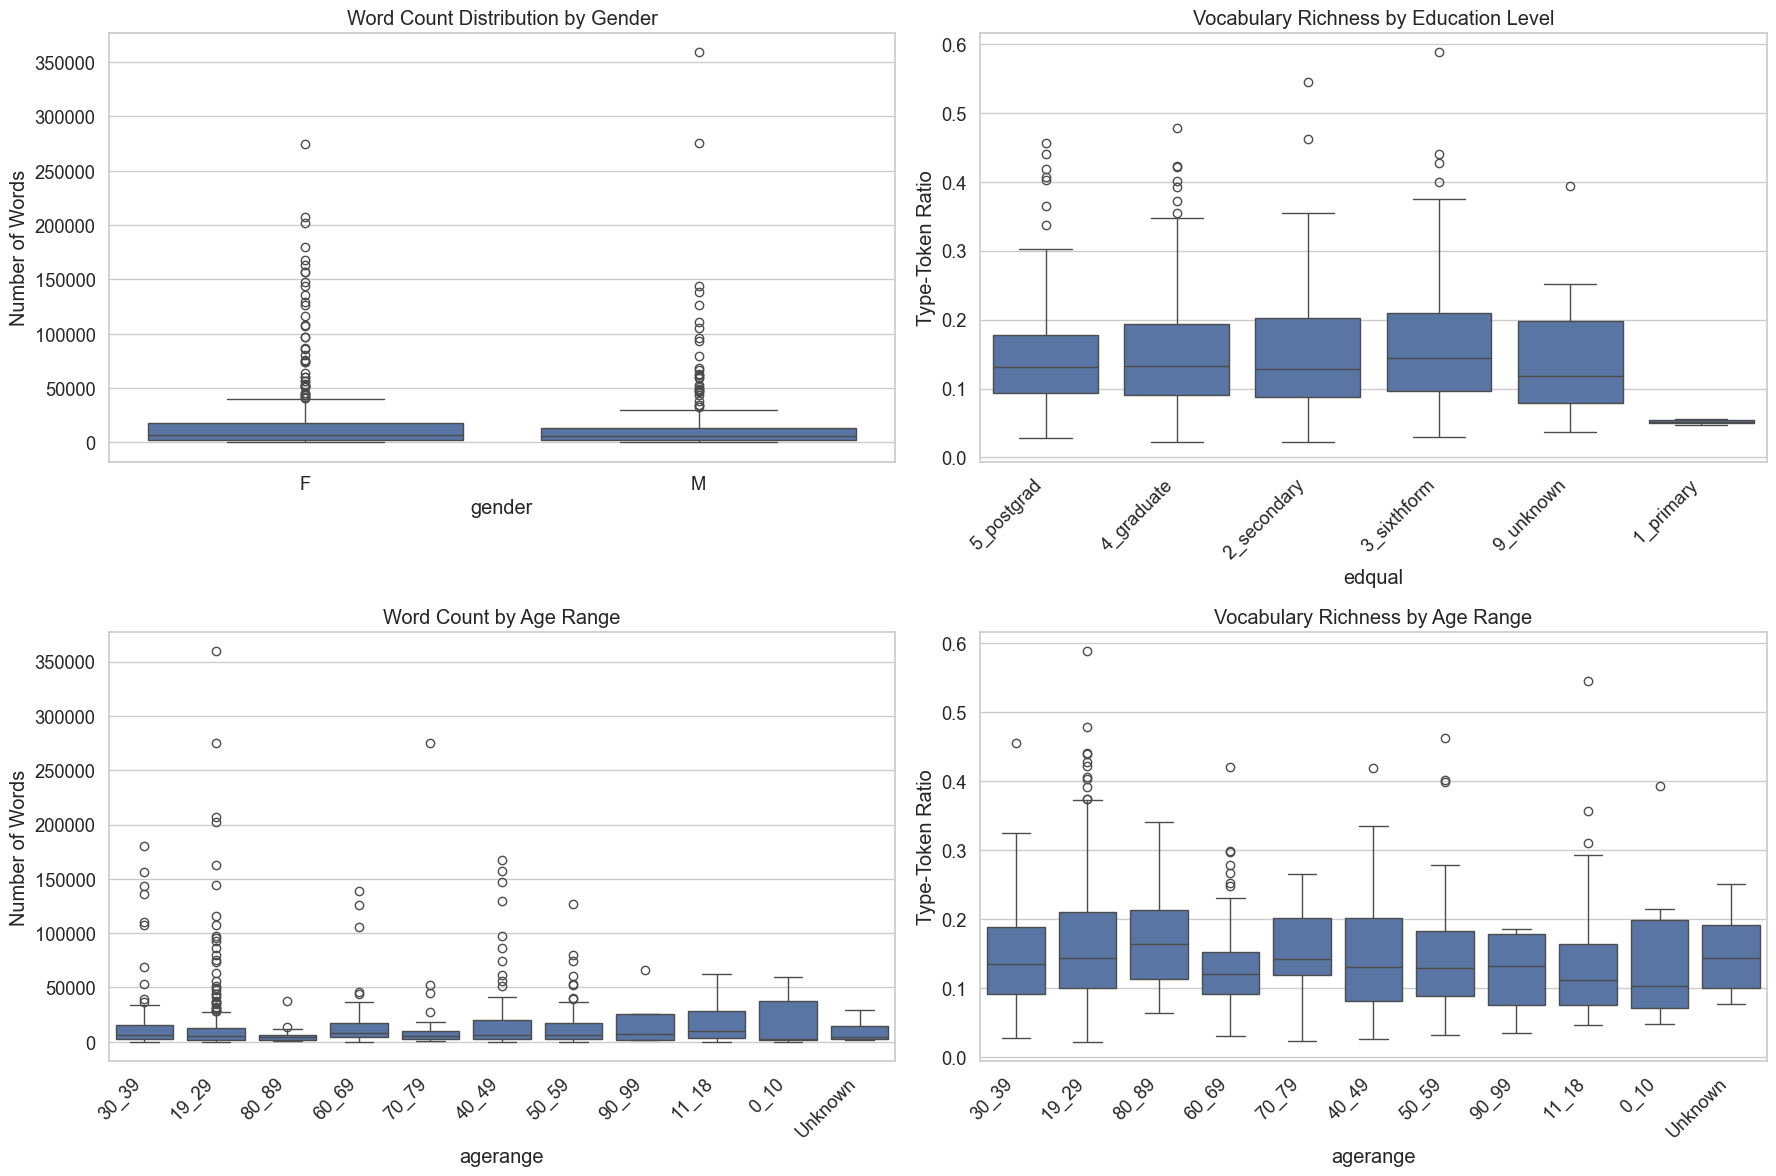

Average Word Count by Gender:
gender
F    19340.002770
M    14123.851485
Name: word_count, dtype: float64

Average Vocabulary Richness by Education Level:
edqual
1_primary      0.051805
5_postgrad     0.145050
9_unknown      0.148262
4_graduate     0.152226
2_secondary    0.157256
3_sixthform    0.165247
Name: vocab_richness, dtype: float64

Average Word Count by Age Range:
agerange
80_89       6085.368421
Unknown    10046.500000
50_59      14902.350649
60_69      16193.184615
19_29      16743.838057
11_18      17152.900000
70_79      17226.272727
30_39      18464.078652
0_10       20060.142857
90_99      20440.000000
40_49      21459.213333
Name: word_count, dtype: float64


In [57]:
# Prepare data by joining speaker metadata with utterance data
def demographic_analysis(df_tagged, df_speakers_meta):
    # Create a word count per speaker
    speaker_word_counts = df_tagged.groupby('speaker_id').size().reset_index(name='word_count')
    
    # Join with speaker metadata
    speaker_analysis = speaker_word_counts.join(df_speakers_meta, on='speaker_id')
    
    # Fill missing values for analysis
    speaker_analysis['gender'] = speaker_analysis['gender'].fillna('Unknown')
    speaker_analysis['agerange'] = speaker_analysis['agerange'].fillna('Unknown')
    speaker_analysis['edqual'] = speaker_analysis['edqual'].fillna('Unknown')
    
    # Filter out speakers with unknown status and very low word counts
    filtered_speakers = speaker_analysis[
        (speaker_analysis['gender'].isin(['M', 'F'])) & 
        (speaker_analysis['word_count'] > 100)
    ]
    
    # Vocabulary richness: measure unique words per speaker
    vocab_richness = {}
    for speaker in filtered_speakers['speaker_id']:
        speaker_words = df_tagged[df_tagged['speaker_id'] == speaker]['lemma'].str.lower()
        total_words = len(speaker_words)
        unique_words = len(set(speaker_words))
        if total_words > 0:  # Prevent division by zero
            vocab_richness[speaker] = unique_words / total_words
    
    filtered_speakers['vocab_richness'] = filtered_speakers['speaker_id'].map(vocab_richness)
    
    return filtered_speakers

# Perform comparative analysis by demographic category
def compare_demographics(speaker_analysis):
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Word count by gender
    sns.boxplot(x='gender', y='word_count', data=speaker_analysis, ax=axes[0, 0])
    axes[0, 0].set_title('Word Count Distribution by Gender')
    axes[0, 0].set_ylabel('Number of Words')
    
    # 2. Vocabulary richness by education level
    sns.boxplot(x='edqual', y='vocab_richness', data=speaker_analysis, ax=axes[0, 1])
    axes[0, 1].set_title('Vocabulary Richness by Education Level')
    axes[0, 1].set_ylabel('Type-Token Ratio')
    axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
    
    # 3. Word count by age range
    sns.boxplot(x='agerange', y='word_count', data=speaker_analysis, ax=axes[1, 0])
    axes[1, 0].set_title('Word Count by Age Range')
    axes[1, 0].set_ylabel('Number of Words')
    axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
    
    # 4. Vocabulary richness by age range
    sns.boxplot(x='agerange', y='vocab_richness', data=speaker_analysis, ax=axes[1, 1])
    axes[1, 1].set_title('Vocabulary Richness by Age Range')
    axes[1, 1].set_ylabel('Type-Token Ratio')
    axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.savefig('demographic_comparisons.png', dpi=300)
    plt.show()
    
    # Statistical analysis (averages by group)
    print("Average Word Count by Gender:")
    print(speaker_analysis.groupby('gender')['word_count'].mean())
    
    print("\nAverage Vocabulary Richness by Education Level:")
    print(speaker_analysis.groupby('edqual')['vocab_richness'].mean().sort_values())
    
    print("\nAverage Word Count by Age Range:")
    print(speaker_analysis.groupby('agerange')['word_count'].mean().sort_values())

# Execute the analysis
speaker_analysis = demographic_analysis(df_tagged, df_speakers_meta)
compare_demographics(speaker_analysis)

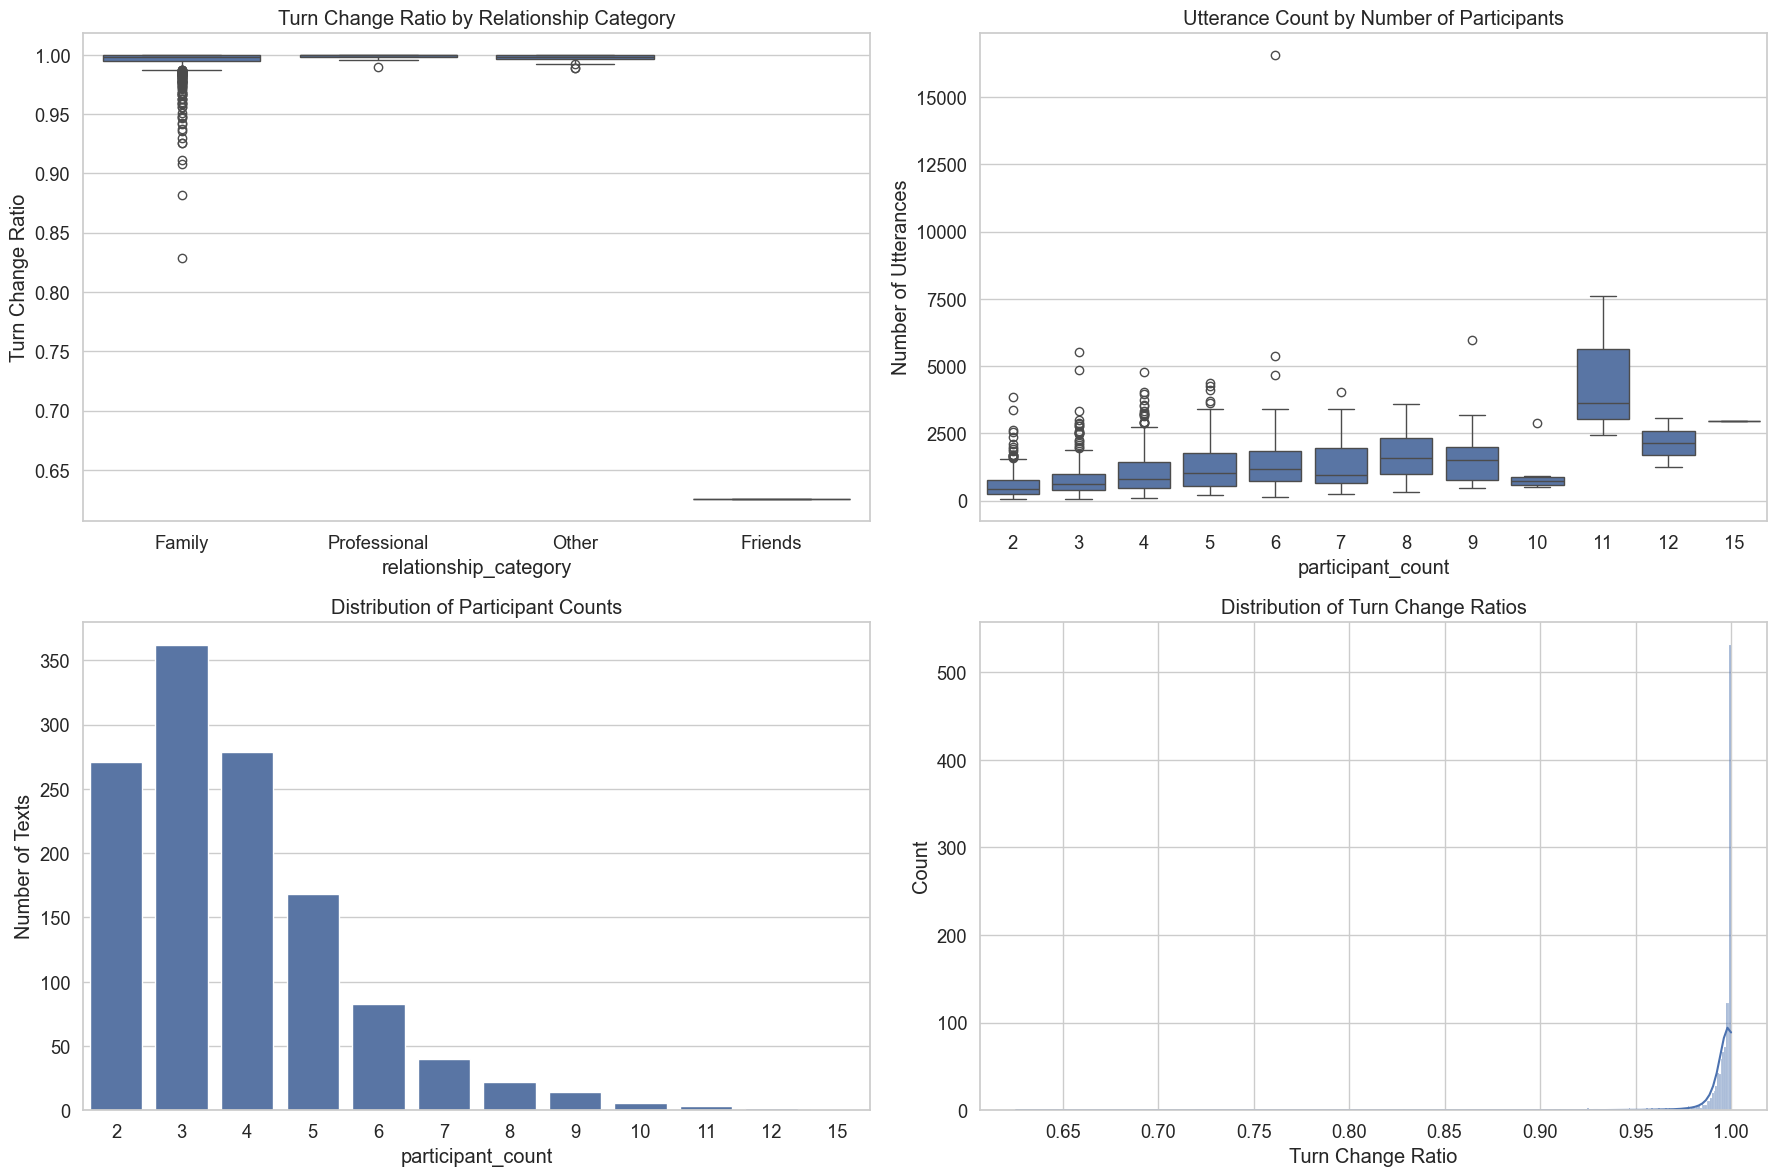

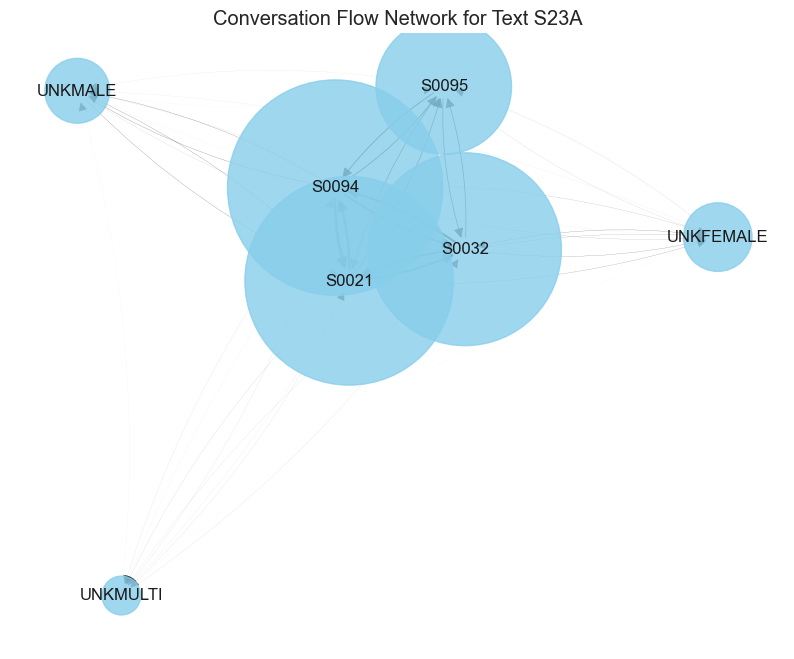

In [58]:
def discourse_analysis(df_untagged, df_texts_meta):
    # Add sequential index to utterances within each text
    df_discourse = df_untagged.copy()
    
    # Ensure utterances are properly ordered
    df_discourse['utterance_sequence'] = df_discourse.groupby('text_id').cumcount() + 1
    
    # Calculate turn-taking patterns
    turn_patterns = []
    
    for text_id in df_discourse['text_id'].unique():
        text_utterances = df_discourse[df_discourse['text_id'] == text_id].sort_values('utterance_sequence')
        
        # Get participant count for this text
        participant_count = len(text_utterances['speaker_id'].unique())
        
        # Skip texts with only one participant
        if participant_count < 2:
            continue
            
        # Analyze speaker changes
        prev_speaker = None
        speaker_changes = 0
        for idx, row in text_utterances.iterrows():
            if prev_speaker is not None and row['speaker_id'] != prev_speaker:
                speaker_changes += 1
            prev_speaker = row['speaker_id']
        
        # Calculate turn change ratio
        turn_change_ratio = speaker_changes / (len(text_utterances) - 1) if len(text_utterances) > 1 else 0
        
        # Get text type information
        text_type = df_texts_meta.loc[text_id, 'conv_type'] if text_id in df_texts_meta.index else 'Unknown'
        relationship = df_texts_meta.loc[text_id, 'relationships'] if text_id in df_texts_meta.index else 'Unknown'
        
        turn_patterns.append({
            'text_id': text_id,
            'participant_count': participant_count,
            'utterance_count': len(text_utterances),
            'speaker_changes': speaker_changes,
            'turn_change_ratio': turn_change_ratio,
            'text_type': text_type,
            'relationship': relationship
        })
        
    turn_df = pd.DataFrame(turn_patterns)
    
    # Add relationship categories
    turn_df['relationship_category'] = turn_df['relationship'].apply(lambda x: 
        'Family' if 'family' in str(x).lower() else 
        'Friends' if 'friend' in str(x).lower() else 
        'Professional' if any(term in str(x).lower() for term in ['colleague', 'business', 'professional']) else 
        'Other')
    
    return turn_df

def visualize_discourse_patterns(turn_df):
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Turn change ratio by relationship category
    sns.boxplot(x='relationship_category', y='turn_change_ratio', data=turn_df, ax=axes[0, 0])
    axes[0, 0].set_title('Turn Change Ratio by Relationship Category')
    axes[0, 0].set_ylabel('Turn Change Ratio')
    
    # 2. Utterance count by participant count
    sns.boxplot(x='participant_count', y='utterance_count', data=turn_df, ax=axes[0, 1])
    axes[0, 1].set_title('Utterance Count by Number of Participants')
    axes[0, 1].set_ylabel('Number of Utterances')
    
    # 3. Participant count distribution
    sns.countplot(x='participant_count', data=turn_df, ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Participant Counts')
    axes[1, 0].set_ylabel('Number of Texts')
    
    # 4. Turn change ratio histogram
    sns.histplot(turn_df['turn_change_ratio'], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of Turn Change Ratios')
    axes[1, 1].set_xlabel('Turn Change Ratio')
    
    plt.tight_layout()
    plt.savefig('discourse_patterns.png', dpi=300)
    plt.show()
    
    # Conversation network visualization for a sample text
    sample_text = turn_df.iloc[0]['text_id']
    visualize_conversation_network(df_untagged, sample_text)

def visualize_conversation_network(df_untagged, text_id):
    # Get conversations for the specific text
    text_utterances = df_untagged[df_untagged['text_id'] == text_id].sort_values('utterance_id')
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add nodes (speakers)
    speakers = text_utterances['speaker_id'].unique()
    for speaker in speakers:
        G.add_node(speaker)
    
    # Add edges (speaker transitions)
    prev_speaker = None
    for idx, row in text_utterances.iterrows():
        if prev_speaker is not None and row['speaker_id'] != prev_speaker:
            # If edge exists, increase weight, otherwise create new edge
            if G.has_edge(prev_speaker, row['speaker_id']):
                G[prev_speaker][row['speaker_id']]['weight'] += 1
            else:
                G.add_edge(prev_speaker, row['speaker_id'], weight=1)
        prev_speaker = row['speaker_id']
    
    # Prepare for visualization
    plt.figure(figsize=(10, 8))
    
    # Node positions
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    # Node sizes based on utterance count
    node_sizes = []
    for speaker in G.nodes():
        count = len(text_utterances[text_utterances['speaker_id'] == speaker])
        node_sizes.append(count * 20)  # Scale for visibility
    
    # Edge weights
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(edge_weights) if edge_weights else 1
    
    # Draw the graph
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_labels(G, pos, font_size=12)
    
    # Draw edges with varying thickness
    for u, v, data in G.edges(data=True):
        width = data['weight'] * 2.0 / max_weight
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=width, alpha=0.7, 
                               connectionstyle='arc3,rad=0.1', arrowsize=15)
    
    plt.title(f"Conversation Flow Network for Text {text_id}")
    plt.axis('off')
    plt.savefig(f'conversation_network_{text_id}.png', dpi=300)
    plt.show()

# Execute discourse analysis
turn_df = discourse_analysis(df_untagged, df_texts_meta)
visualize_discourse_patterns(turn_df)

In [ ]:
def linguistic_analysis(df_tagged, df_speakers_meta):
    # Part-of-speech analysis
    pos_data = {}
    
    # Get overall POS distribution
    pos_counts = df_tagged['pos'].value_counts()
    total_words = len(df_tagged)
    pos_data['overall'] = pos_counts / total_words
    
    # POS distribution by gender
    gender_pos = {}
    for gender in ['M', 'F']:
        # Get speaker IDs for this gender
        speakers = df_speakers_meta[df_speakers_meta['gender'] == gender].index
        
        # Get words from these speakers
        gender_words = df_tagged[df_tagged['speaker_id'].isin(speakers)]
        
        if len(gender_words) > 0:
            gender_pos_counts = gender_words['pos'].value_counts()
            gender_pos[gender] = gender_pos_counts / len(gender_words)
    
    pos_data['by_gender'] = gender_pos
    
    # Semantic field analysis (using USAS tags)
    semantic_data = analyze_semantic_fields(df_tagged)
    
    return pos_data, semantic_data

def analyze_semantic_fields(df_tagged):
    # Extract primary semantic category from USAS tags (e.g., "A1.1.1" -> "A")
    def extract_primary_category(tag):
        if pd.isna(tag):
            return "Unknown"
        match = re.match(r'([A-Z]\d*)', str(tag))
        return match.group(1) if match else "Unknown"
    
    # Apply extraction
    df_tagged['primary_semantic'] = df_tagged['usas'].apply(extract_primary_category)
    
    # Count occurrences of each primary semantic category
    semantic_counts = df_tagged['primary_semantic'].value_counts()
    total_words = len(df_tagged)
    
    semantic_data = {
        'overall': semantic_counts / total_words
    }
    
    # Map USAS categories to human-readable descriptions
    usas_categories = {
        'A': 'General/Abstract Terms',
        'B': 'Body/Health',
        'C': 'Arts/Crafts',
        'E': 'Emotions',
        'F': 'Food/Farming',
        'G': 'Government/Public',
        'H': 'Architecture/Housing',
        'I': 'Money/Commerce',
        'K': 'Entertainment/Sports',
        'L': 'Life/Living Things',
        'M': 'Movement/Transport',
        'N': 'Numbers/Mathematics',
        'O': 'Substances/Materials',
        'P': 'Education',
        'Q': 'Language/Communication',
        'S': 'Social Actions/States',
        'T': 'Time',
        'W': 'World/Environment',
        'X': 'Psychological Actions',
        'Y': 'Science/Technology',
        'Z': 'Names/Grammar'
    }
    
    semantic_data['categories'] = usas_categories
    
    return semantic_data

def visualize_linguistic_features(pos_data, semantic_data):
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Overall POS distribution
    top_pos = pos_data['overall'].sort_values(ascending=False).head(12)
    sns.barplot(x=top_pos.index, y=top_pos.values, ax=axes[0, 0])
    axes[0, 0].set_title('Top 12 Parts of Speech Distribution')
    axes[0, 0].set_ylabel('Proportion')
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
    
    # 2. POS comparison by gender
    if 'by_gender' in pos_data and 'M' in pos_data['by_gender'] and 'F' in pos_data['by_gender']:
        # Get common top POS tags
        male_pos = pos_data['by_gender']['M']
        female_pos = pos_data['by_gender']['F']
        common_pos = set(male_pos.index) & set(female_pos.index)
        common_pos = sorted(common_pos, key=lambda x: male_pos.get(x, 0) + female_pos.get(x, 0), reverse=True)[:8]
        
        # Prepare data for grouped bar chart
        pos_comparison = pd.DataFrame({
            'Male': [male_pos.get(pos, 0) for pos in common_pos],
            'Female': [female_pos.get(pos, 0) for pos in common_pos]
        }, index=common_pos)
        
        pos_comparison.plot(kind='bar', ax=axes[0, 1])
        axes[0, 1].set_title('POS Distribution by Gender')
        axes[0, 1].set_ylabel('Proportion')
        
    # 3. Semantic fields distribution
    if 'overall' in semantic_data:
        top_semantic = semantic_data['overall'].sort_values(ascending=False).head(10)
        
        # Map codes to descriptions where available
        labels = []
        for code in top_semantic.index:
            if code in semantic_data.get('categories', {}):
                labels.append(f"{code}: {semantic_data['categories'][code]}")
            else:
                labels.append(code)
        
        sns.barplot(x=labels, y=top_semantic.values, ax=axes[1, 0])
        axes[1, 0].set_title('Top 10 Semantic Fields')
        axes[1, 0].set_ylabel('Proportion')
        axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
    
    # 4. Word cloud of top lemmas (not including semantic fields)
    from wordcloud import WordCloud
    
    # Get frequencies of lemmas
    lemma_freq = df_tagged['lemma'].value_counts()
    
    # Filter out stopwords
    stopwords = set(['the', 'and', 'a', 'to', 'of', 'be', 'in', 'that', 'have', 'i', 'it', 
                     'for', 'not', 'on', 'with', 'he', 'as', 'you', 'do', 'at', 'this', 
                     'but', 'his', 'by', 'from', 'they', 'we', 'say', 'her', 'she', 'or', 
                     'an', 'will', 'my', 'one', 'all', 'would', 'there', 'their', 'what', 'so'])
    
    lemma_dict = {k: v for k, v in lemma_freq.items() if k.lower() not in stopwords and len(k) > 1}
    
    if lemma_dict:
        wordcloud = WordCloud(width=800, height=600, background_color='white', 
                             max_words=100, contour_width=3, contour_color='steelblue')
        wordcloud.generate_from_frequencies(lemma_dict)
        axes[1, 1].imshow(wordcloud, interpolation='bilinear')
        axes[1, 1].set_title('Most Common Content Words')
        axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.savefig('linguistic_features.png', dpi=300)
    plt.show()

# Execute linguistic analysis
pos_data, semantic_data = linguistic_analysis(df_tagged, df_speakers_meta)
visualize_linguistic_features(pos_data, semantic_data)

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2583351054.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2583351054.py:67: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2583351054.py:80: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



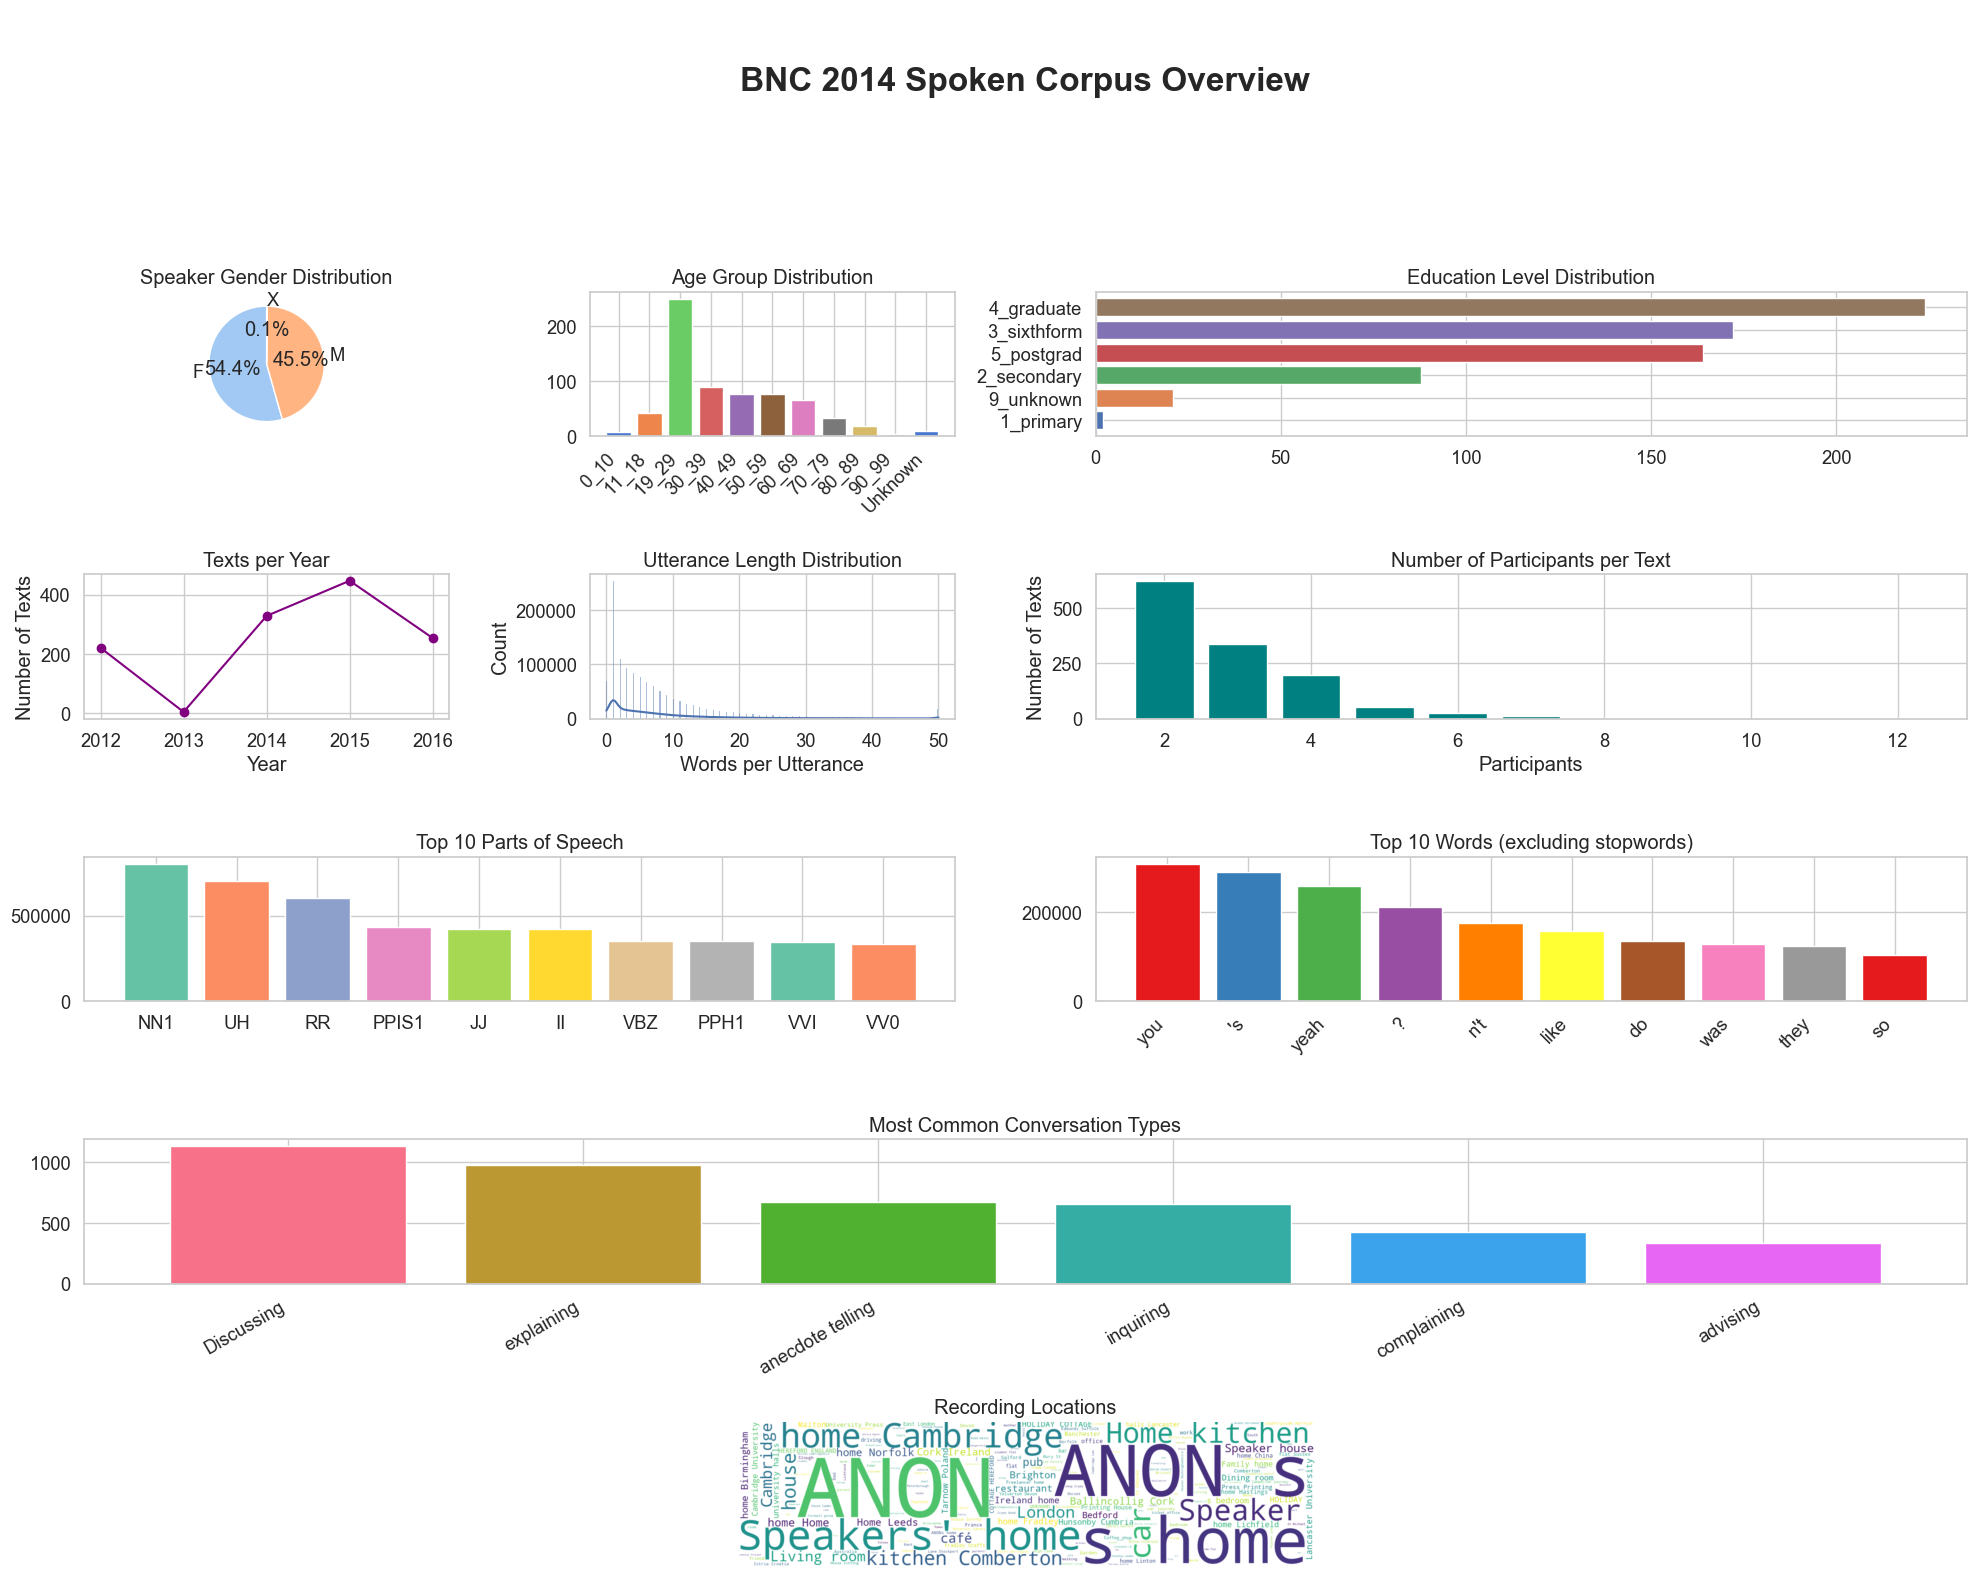

In [59]:
def create_corpus_dashboard(df_tagged, df_untagged, df_speakers_meta, df_texts_meta):
    # Create a dashboard of corpus characteristics
    fig = plt.figure(figsize=(20, 16))
    
    # Create custom grid for plots
    gs = fig.add_gridspec(6, 4)
    
    # 1. Corpus overview - text in the top row spanning all columns
    ax_title = fig.add_subplot(gs[0, :])
    ax_title.text(0.5, 0.5, "BNC 2014 Spoken Corpus Overview", 
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=24, fontweight='bold')
    ax_title.axis('off')
    
    # 2. Speaker demographics
    ax_gender = fig.add_subplot(gs[1, 0])
    gender_counts = df_speakers_meta['gender'].value_counts()
    ax_gender.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
                 colors=sns.color_palette("pastel"), startangle=90)
    ax_gender.set_title('Speaker Gender Distribution')
    
    ax_age = fig.add_subplot(gs[1, 1])
    age_counts = df_speakers_meta['agerange'].value_counts().sort_index()
    ax_age.bar(age_counts.index, age_counts.values, color=sns.color_palette("muted"))
    ax_age.set_title('Age Group Distribution')
    ax_age.set_xticklabels(age_counts.index, rotation=45, ha='right')
    
    ax_educ = fig.add_subplot(gs[1, 2:])
    educ_counts = df_speakers_meta['edqual'].value_counts().sort_values()
    ax_educ.barh(educ_counts.index, educ_counts.values, color=sns.color_palette("deep"))
    ax_educ.set_title('Education Level Distribution')
    
    # 3. Corpus statistics
    ax_texts = fig.add_subplot(gs[2, 0])
    yearly_texts = pd.Series(df_texts_meta['rec_year'].value_counts()).sort_index()
    ax_texts.plot(yearly_texts.index, yearly_texts.values, 'o-', color='purple')
    ax_texts.set_title('Texts per Year')
    ax_texts.set_xlabel('Year')
    ax_texts.set_ylabel('Number of Texts')
    
    ax_utt_len = fig.add_subplot(gs[2, 1])
    sns.histplot(df_untagged['utt_length'].clip(upper=50), kde=True, ax=ax_utt_len)
    ax_utt_len.set_title('Utterance Length Distribution')
    ax_utt_len.set_xlabel('Words per Utterance')
    
    ax_participants = fig.add_subplot(gs[2, 2:])
    participant_counts = df_texts_meta['n_speakers'].value_counts().sort_index()
    ax_participants.bar(participant_counts.index, participant_counts.values, color='teal')
    ax_participants.set_title('Number of Participants per Text')
    ax_participants.set_xlabel('Participants')
    ax_participants.set_ylabel('Number of Texts')
    
    # 4. Linguistic features
    ax_pos = fig.add_subplot(gs[3, :2])
    pos_counts = df_tagged['pos'].value_counts().sort_values(ascending=False).head(10)
    ax_pos.bar(pos_counts.index, pos_counts.values, color=sns.color_palette("Set2"))
    ax_pos.set_title('Top 10 Parts of Speech')
    
    # Word frequency plot
    ax_words = fig.add_subplot(gs[3, 2:])
    word_counts = df_tagged['word'].str.lower().value_counts().sort_values(ascending=False)
    # Remove common stop words
    stopwords = ['the', 'and', 'a', 'to', 'of', 'be', 'in', 'that', 'have', 'i', 'it']
    word_counts = word_counts[~word_counts.index.isin(stopwords)].head(10)
    ax_words.bar(word_counts.index, word_counts.values, color=sns.color_palette("Set1"))
    ax_words.set_title('Top 10 Words (excluding stopwords)')
    ax_words.set_xticklabels(word_counts.index, rotation=45, ha='right')
    
    # 5. Conversation types
    ax_conv = fig.add_subplot(gs[4, :])
    # Extract conversation types from the text metadata
    conv_types = []
    for conv in df_texts_meta['conv_type'].dropna():
        for type_val in str(conv).split(','):
            conv_types.append(type_val.strip())
    
    conv_counts = pd.Series(Counter(conv_types)).sort_values(ascending=False).head(6)
    ax_conv.bar(conv_counts.index, conv_counts.values, color=sns.color_palette("husl", 6))
    ax_conv.set_title('Most Common Conversation Types')
    ax_conv.set_xticklabels(conv_counts.index, rotation=30, ha='right')
    
    # 6. Text location map
    ax_map = fig.add_subplot(gs[5, :])
    # This would ideally be a map, but that's complex for this example
    # Instead, create a wordcloud of locations
    from wordcloud import WordCloud
    
    locations = df_texts_meta['rec_loc'].dropna()
    location_text = ' '.join(locations.astype(str))
    
    wordcloud = WordCloud(width=1600, height=400, background_color='white', 
                         contour_width=1, contour_color='steelblue')
    wordcloud.generate(location_text)
    
    ax_map.imshow(wordcloud, interpolation='bilinear')
    ax_map.set_title('Recording Locations')
    ax_map.axis('off')
    
    plt.tight_layout()
    plt.savefig('bnc_corpus_dashboard.png', dpi=300)
    plt.show()

# Execute dashboard creation
create_corpus_dashboard(df_tagged, df_untagged, df_speakers_meta, df_texts_meta)

Running demographic analysis...


C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2487752724.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2487752724.py:46: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2487752724.py:52: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\2487752724.py:58: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



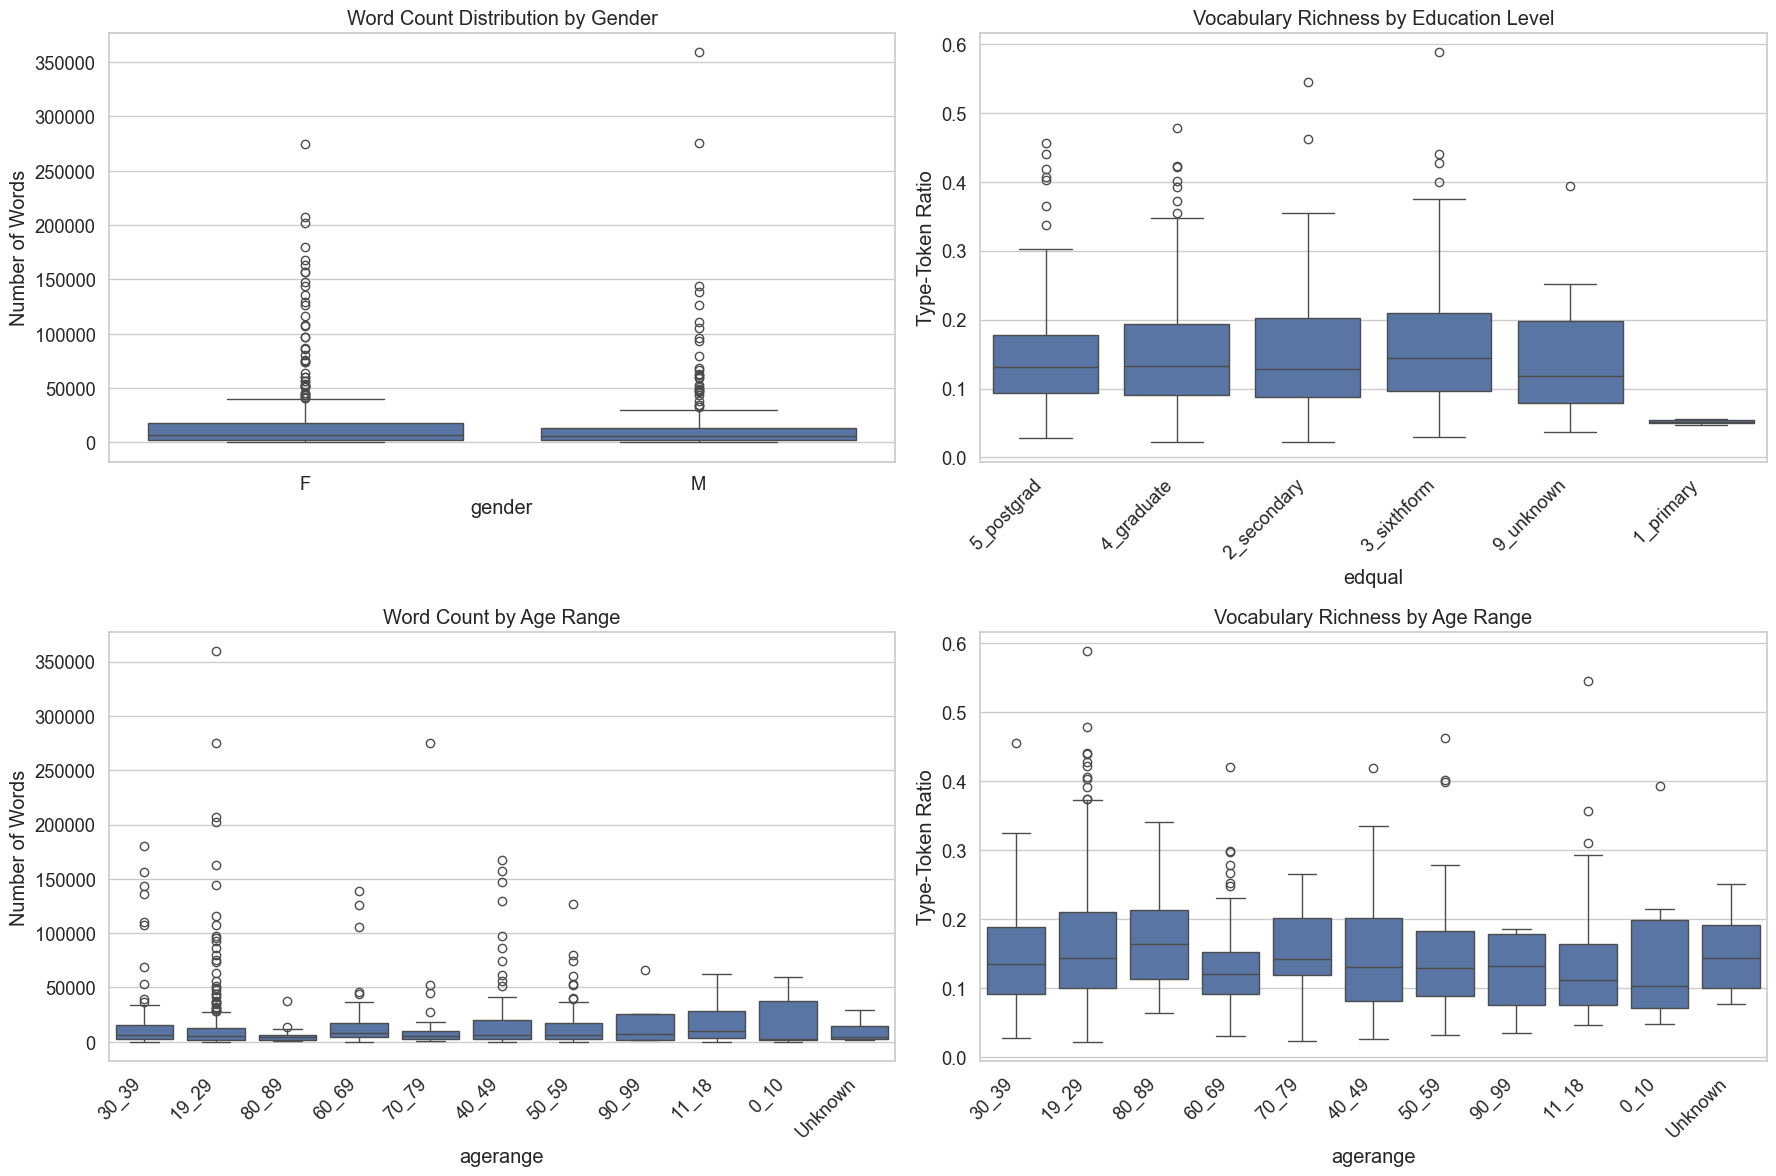

Average Word Count by Gender:
gender
F    19340.002770
M    14123.851485
Name: word_count, dtype: float64

Average Vocabulary Richness by Education Level:
edqual
1_primary      0.051805
5_postgrad     0.145050
9_unknown      0.148262
4_graduate     0.152226
2_secondary    0.157256
3_sixthform    0.165247
Name: vocab_richness, dtype: float64

Average Word Count by Age Range:
agerange
80_89       6085.368421
Unknown    10046.500000
50_59      14902.350649
60_69      16193.184615
19_29      16743.838057
11_18      17152.900000
70_79      17226.272727
30_39      18464.078652
0_10       20060.142857
90_99      20440.000000
40_49      21459.213333
Name: word_count, dtype: float64
Running discourse analysis...


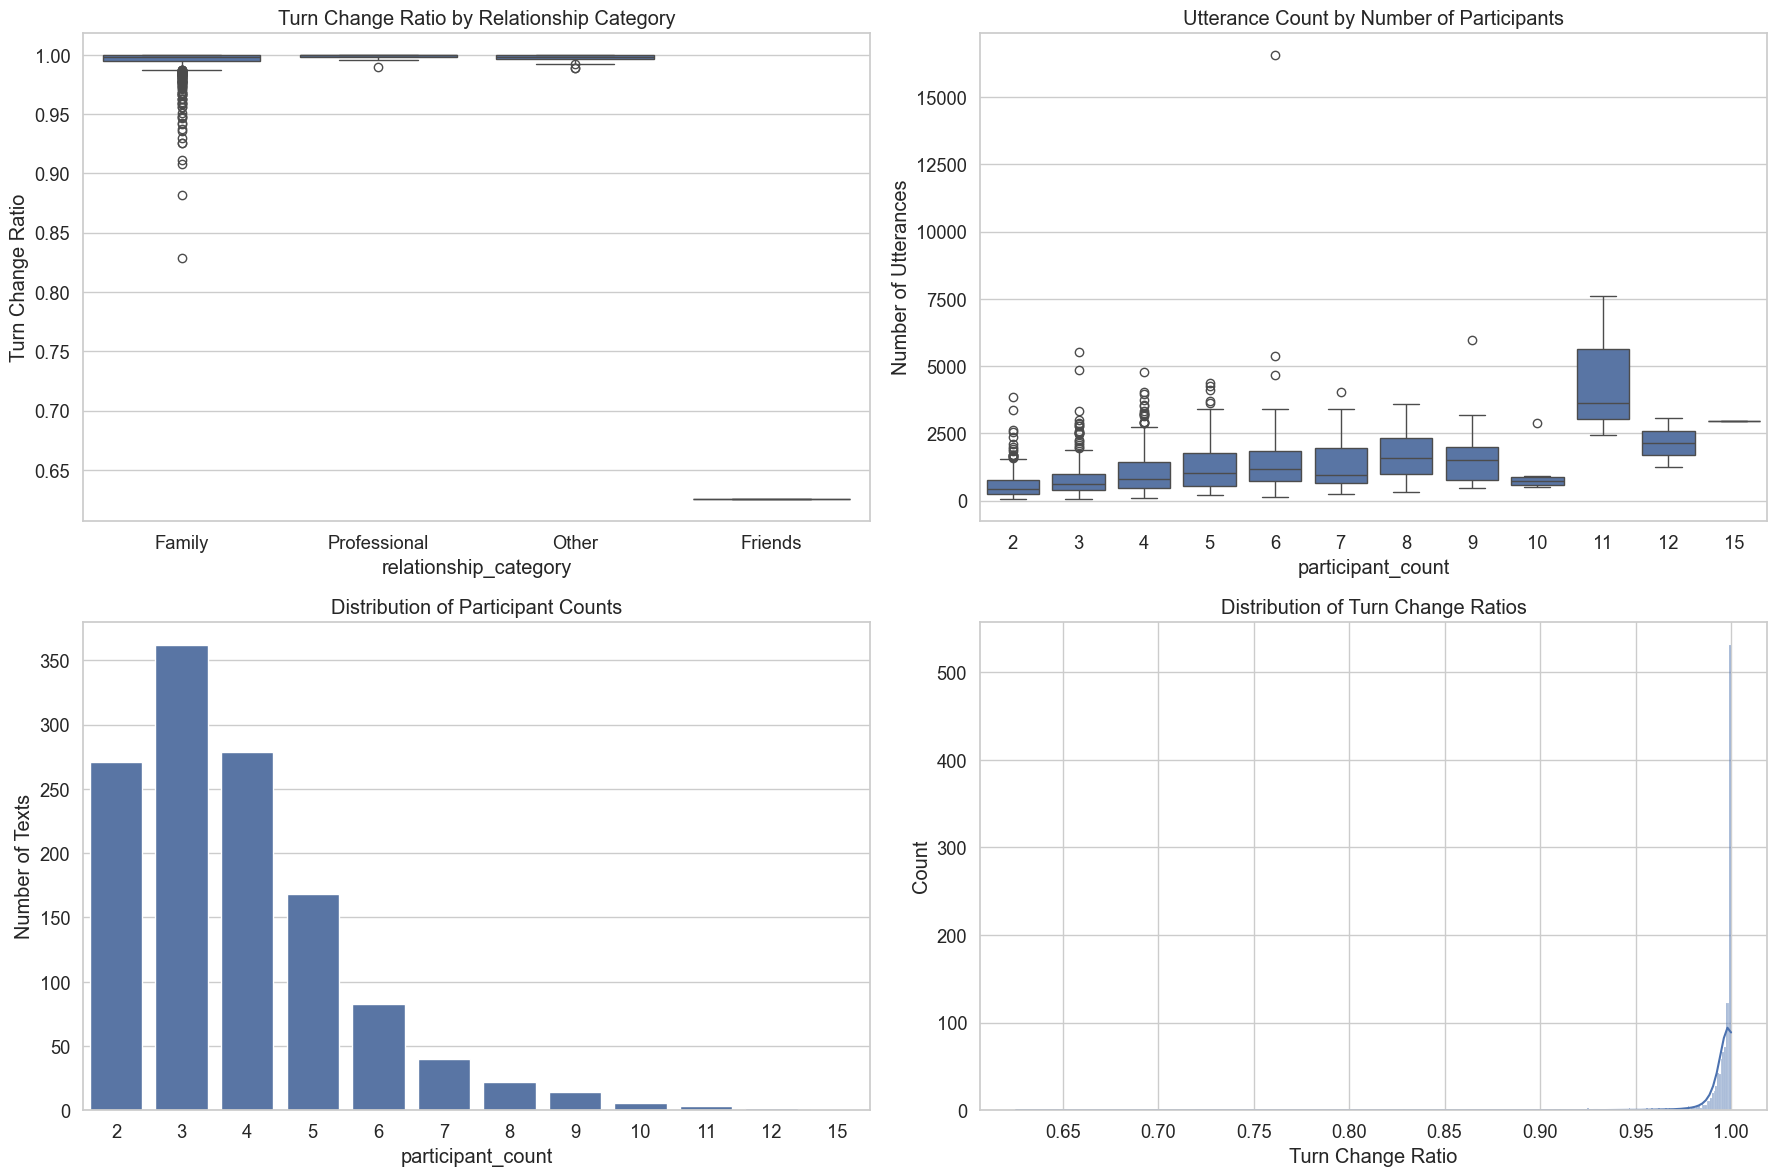

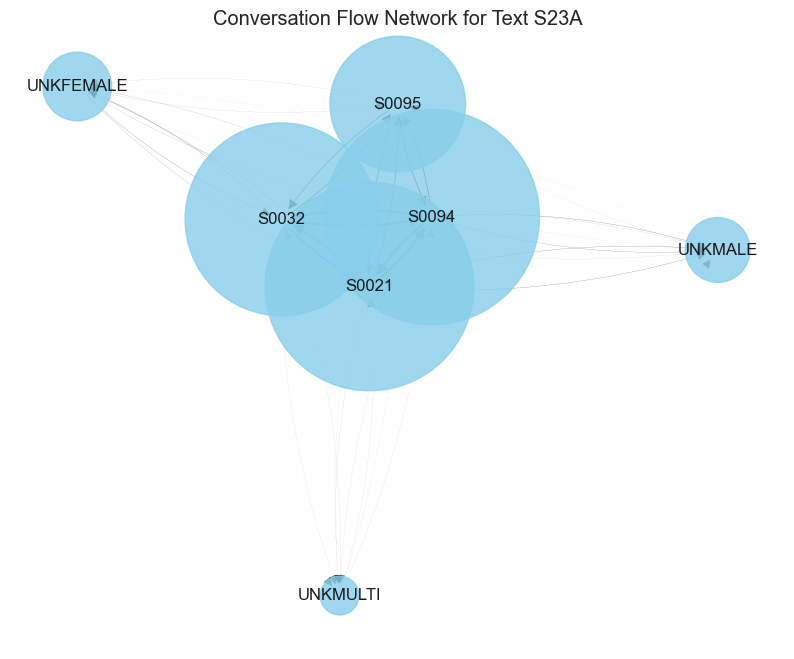

Running linguistic analysis...


NameError: name 'linguistic_analysis' is not defined

In [60]:
def integrate_all_analyses():
    """Run all analyses together to create a comprehensive report"""
    # Demographic analysis
    print("Running demographic analysis...")
    speaker_analysis = demographic_analysis(df_tagged, df_speakers_meta)
    compare_demographics(speaker_analysis)
    
    # Discourse analysis
    print("Running discourse analysis...")
    turn_df = discourse_analysis(df_untagged, df_texts_meta)
    visualize_discourse_patterns(turn_df)
    
    # Linguistic analysis
    print("Running linguistic analysis...")
    pos_data, semantic_data = linguistic_analysis(df_tagged, df_speakers_meta)
    visualize_linguistic_features(pos_data, semantic_data)
    
    # Creating dashboard
    print("Creating corpus dashboard...")
    create_corpus_dashboard(df_tagged, df_untagged, df_speakers_meta, df_texts_meta)
    
    # Perform cross-analysis: finding patterns between demographics and linguistics
    cross_analyze_demographics_linguistics(df_tagged, df_speakers_meta)

def cross_analyze_demographics_linguistics(df_tagged, df_speakers_meta):
    """Analyze relationships between demographic factors and linguistic features"""
    # Join speaker demographics with linguistic features
    
    # Create POS usage profiles per speaker
    speaker_pos = {}
    for speaker in df_speakers_meta.index:
        speaker_words = df_tagged[df_tagged['speaker_id'] == speaker]
        if len(speaker_words) > 100:  # Only consider speakers with sufficient data
            pos_profile = speaker_words['pos'].value_counts() / len(speaker_words)
            speaker_pos[speaker] = pos_profile
    
    # Convert to DataFrame
    pos_profiles = pd.DataFrame(speaker_pos).T.fillna(0)
    
    # Join with demographics
    pos_demographics = pos_profiles.join(df_speakers_meta[['gender', 'agerange', 'edqual']])
    
    # Calculate PCA to reduce dimensions
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    
    # Standardize the POS features
    features = pos_profiles.columns
    scaler = StandardScaler()
    scaled_pos = scaler.fit_transform(pos_profiles)
    
    # Apply PCA
    pca = PCA(n_components=2)
    pos_pca = pca.fit_transform(scaled_pos)
    
    # Add PCA results back to the DataFrame
    pos_demographics['PC1'] = pos_pca[:, 0]
    pos_demographics['PC2'] = pos_pca[:, 1]
    
    # Visualize PCA results colored by demographic factors
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # By gender
    sns.scatterplot(x='PC1', y='PC2', hue='gender', data=pos_demographics, ax=axes[0])
    axes[0].set_title('POS Usage Patterns by Gender')
    
    # By age range
    sns.scatterplot(x='PC1', y='PC2', hue='agerange', data=pos_demographics, ax=axes[1])
    axes[1].set_title('POS Usage Patterns by Age Range')
    
    # By education
    sns.scatterplot(x='PC1', y='PC2', hue='edqual', data=pos_demographics, ax=axes[2])
    axes[2].set_title('POS Usage Patterns by Education')
    
    # Add PCA loading vectors
    for i, feature in enumerate(features):
        if abs(pca.components_[0, i]) > 0.1 or abs(pca.components_[1, i]) > 0.1:  # Only show significant loadings
            for ax in axes:
                ax.arrow(0, 0, pca.components_[0, i]*2, pca.components_[1, i]*2, 
                         head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.5)
                ax.text(pca.components_[0, i]*2.2, pca.components_[1, i]*2.2, feature, 
                        color='red', ha='center', va='center')
    
    plt.tight_layout()
    plt.savefig('linguistic_demographic_pca.png', dpi=300)
    plt.show()
    
    # Report on most distinctive features by demographic group
    print("Most distinctive POS tags by demographic group:")
    for feature in features:
        if feature in pos_demographics.columns:
            print(f"\nPOS tag: {feature}")
            print("By gender:")
            print(pos_demographics.groupby('gender')[feature].mean())
            print("\nBy education:")
            print(pos_demographics.groupby('edqual')[feature].mean().sort_values(ascending=False).head(3))

# Run all analyses
integrate_all_analyses()

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\725481869.py:49: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\725481869.py:55: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\725481869.py:68: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\725481869.py:74: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




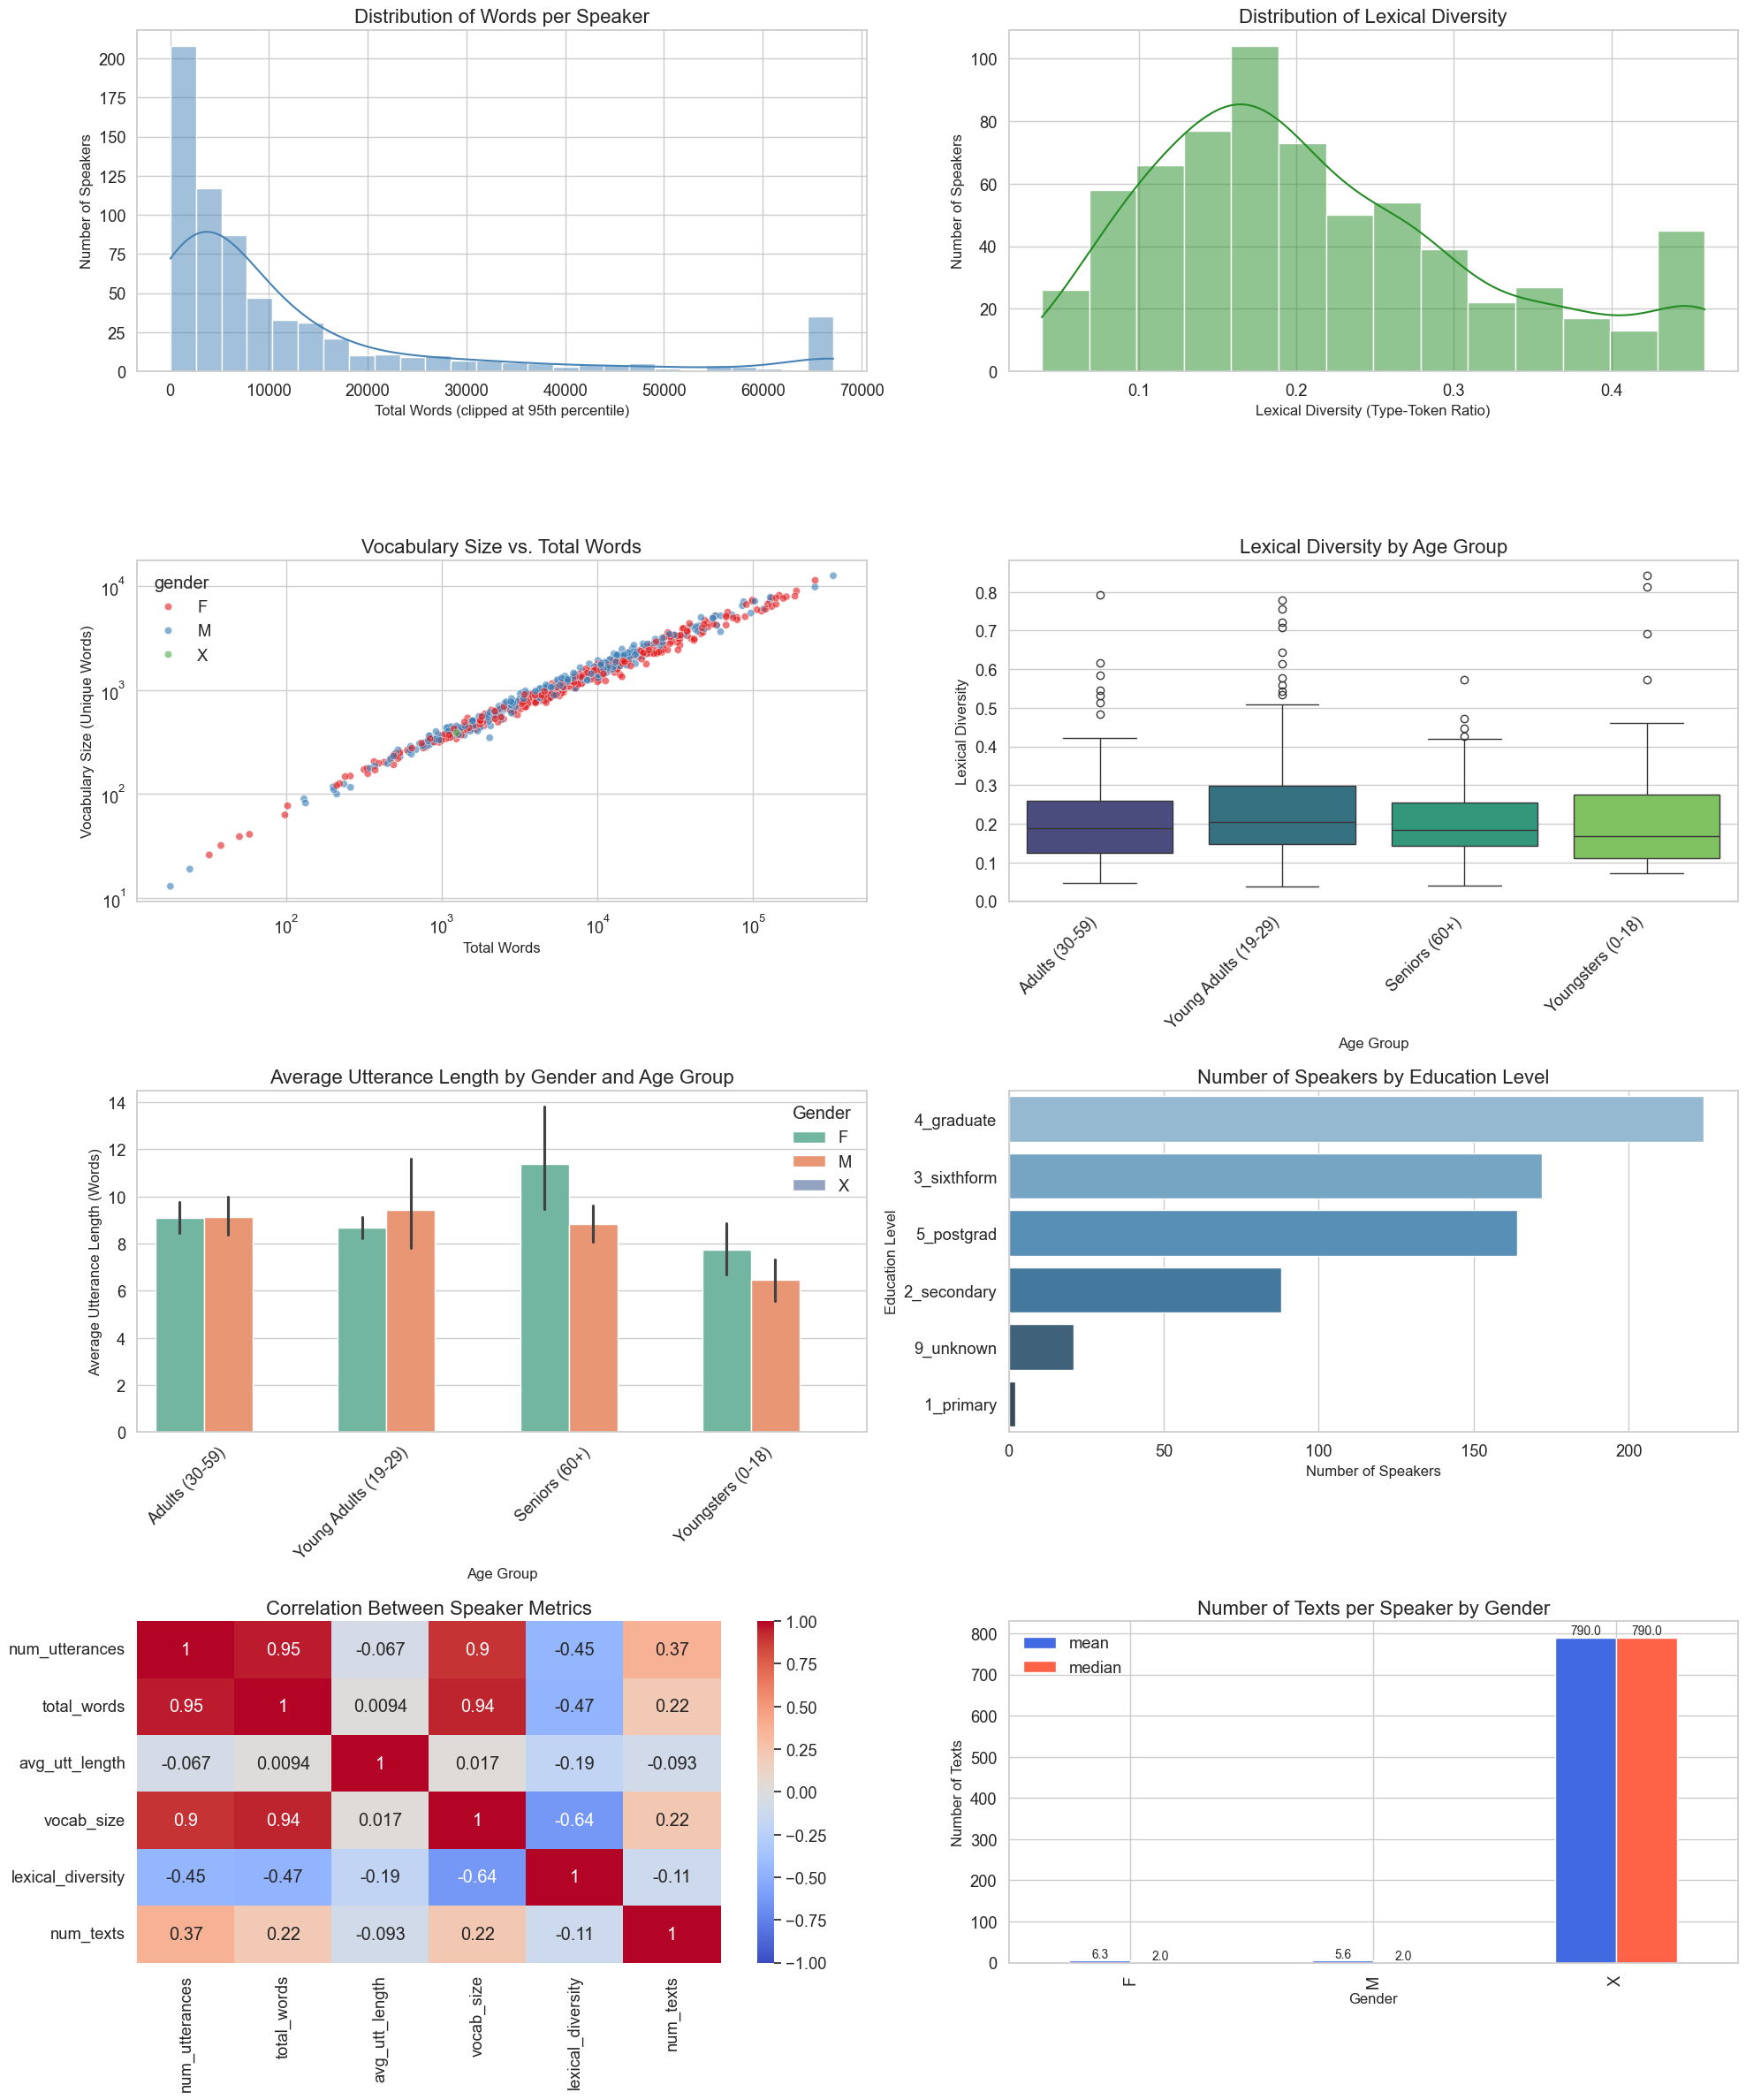

C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\725481869.py:177: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\jubal\AppData\Local\Temp\ipykernel_11556\725481869.py:182: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



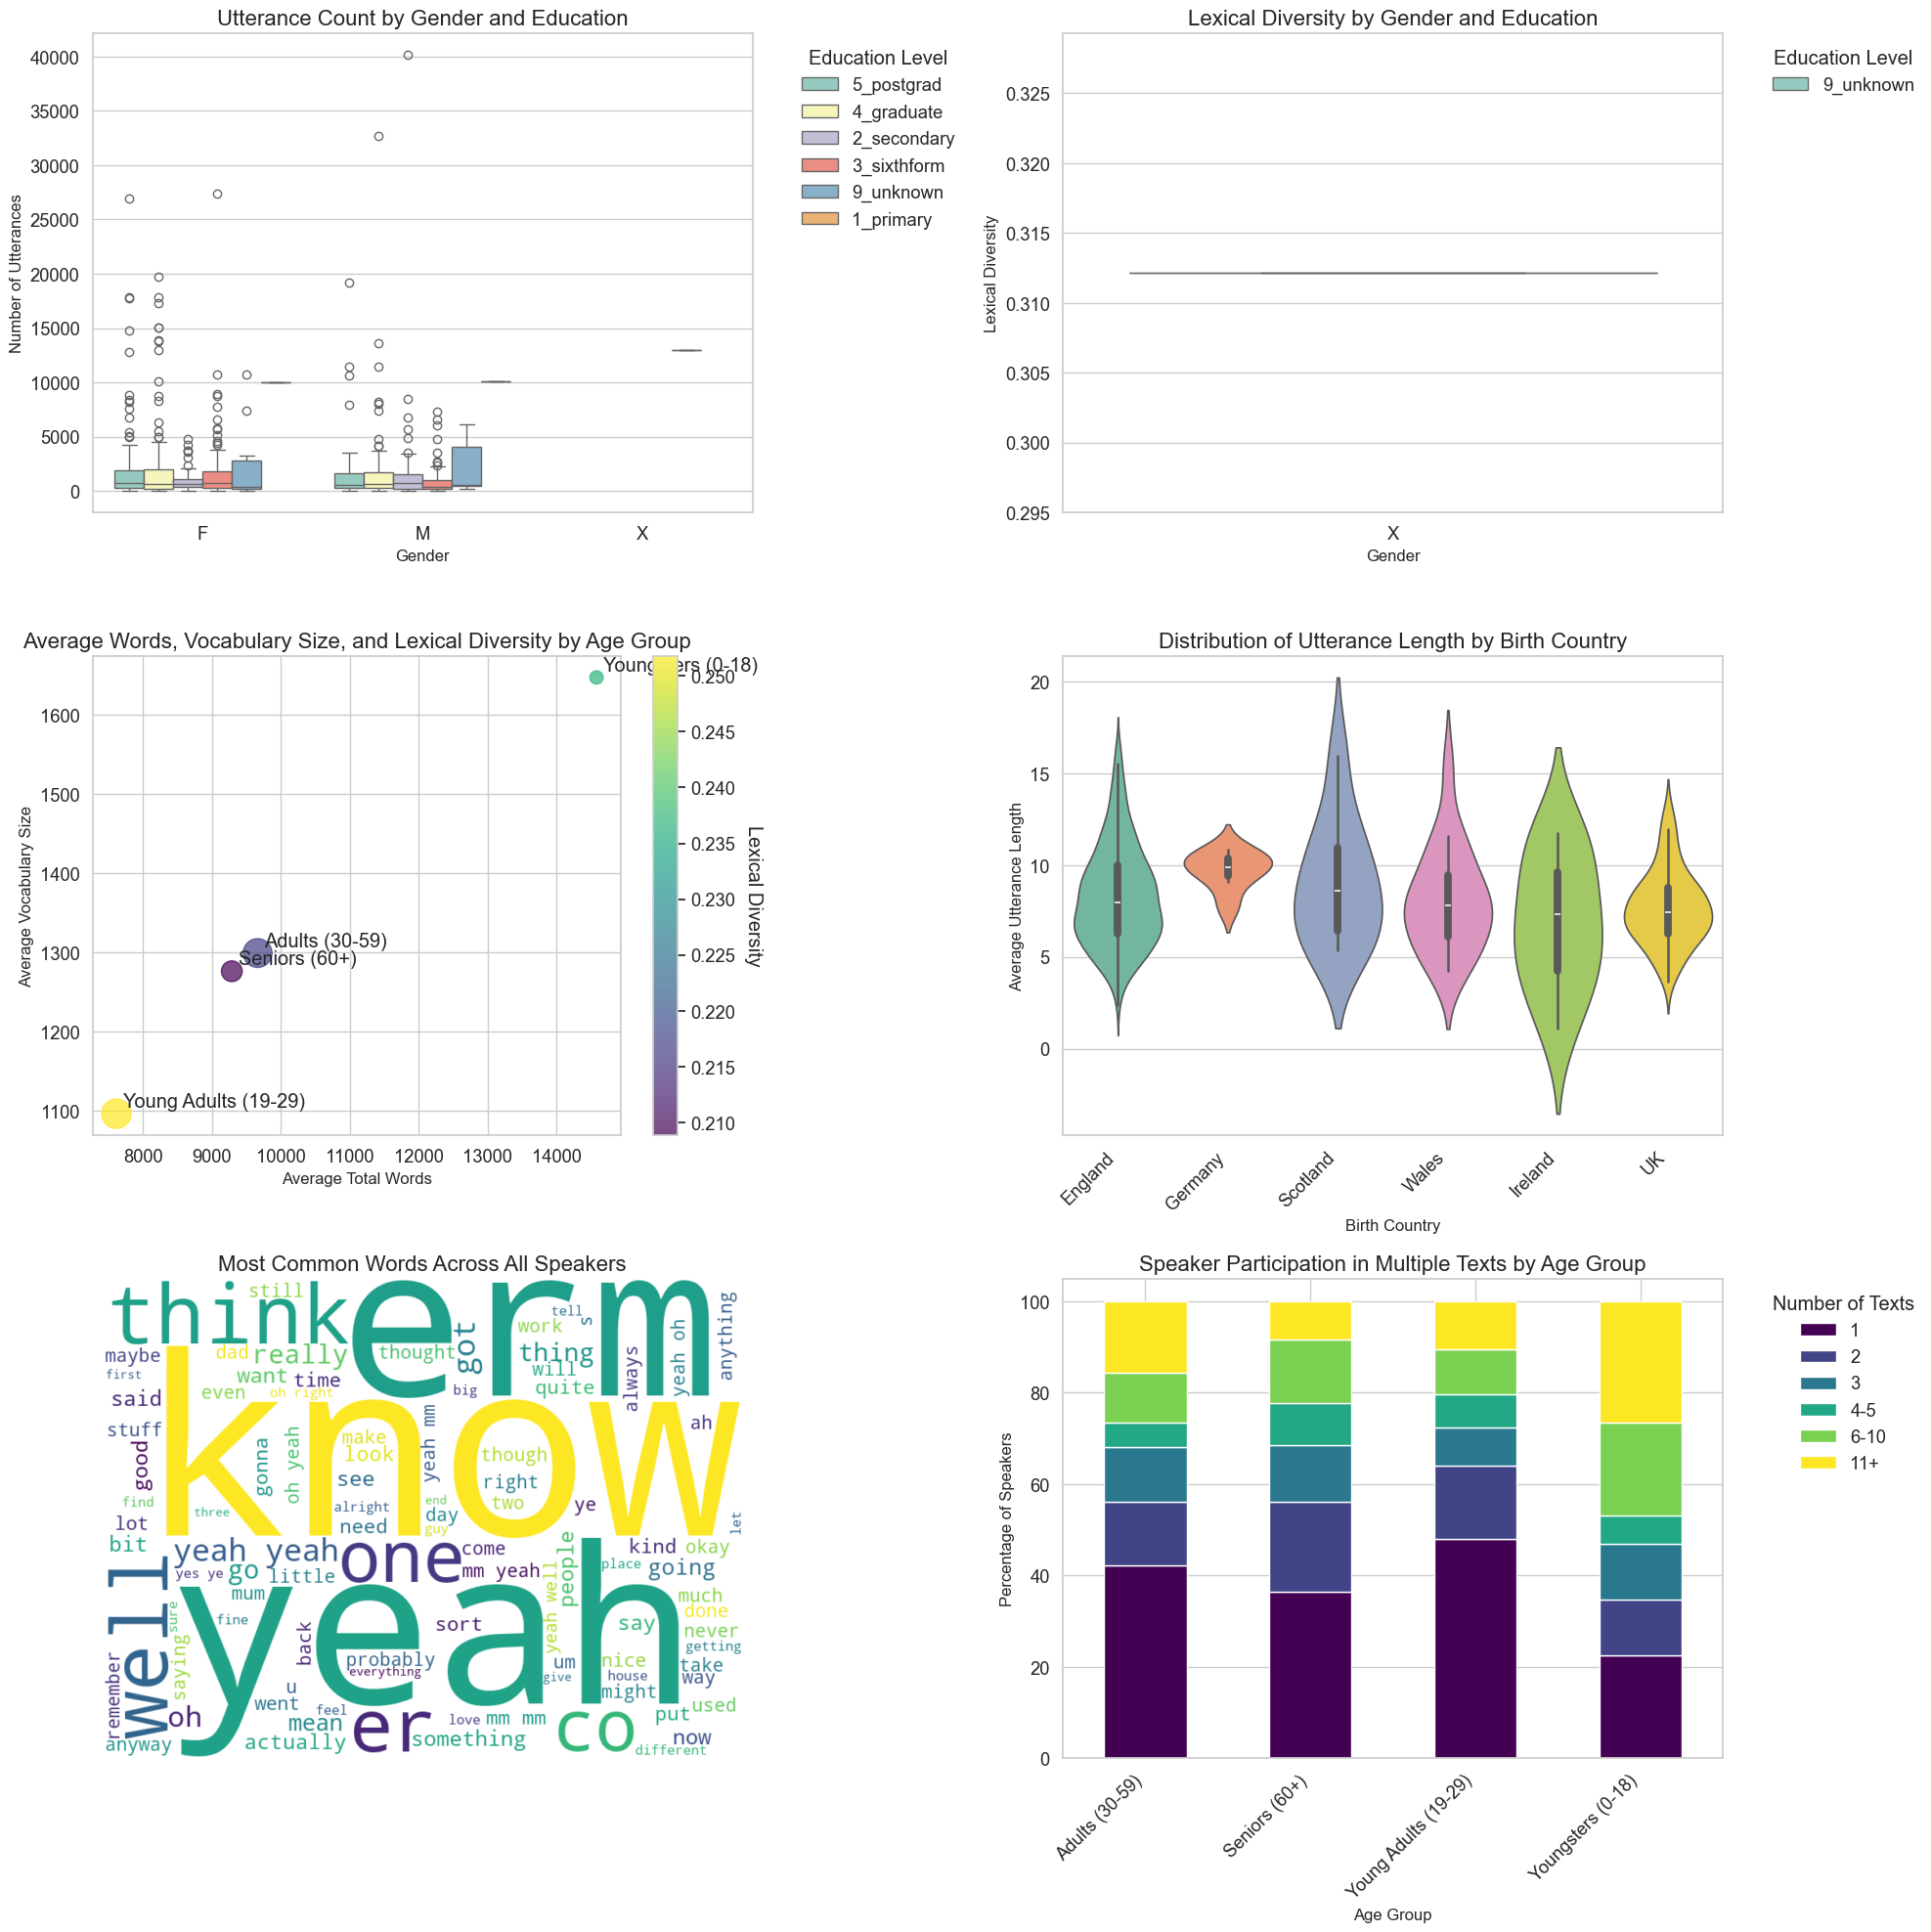

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud

# Set visualization style for consistent, attractive charts
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

def visualize_speaker_insights(speaker_df):
    """Create a comprehensive dashboard of insights from the speaker-level dataframe"""
    
    # Create a figure with multiple subplots using GridSpec for more control
    fig = plt.figure(figsize=(20, 24))
    gs = GridSpec(4, 2, figure=fig)
    
    # 1. Distribution of total words per speaker (log scale)
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(speaker_df['total_words'].clip(upper=speaker_df['total_words'].quantile(0.95)), 
                 kde=True, ax=ax1, color='steelblue')
    ax1.set_title('Distribution of Words per Speaker', fontsize=16)
    ax1.set_xlabel('Total Words (clipped at 95th percentile)', fontsize=12)
    ax1.set_ylabel('Number of Speakers', fontsize=12)
    
    # 2. Distribution of lexical diversity
    ax2 = fig.add_subplot(gs[0, 1])
    sns.histplot(speaker_df['lexical_diversity'].clip(upper=speaker_df['lexical_diversity'].quantile(0.95)), 
                 kde=True, ax=ax2, color='forestgreen')
    ax2.set_title('Distribution of Lexical Diversity', fontsize=16)
    ax2.set_xlabel('Lexical Diversity (Type-Token Ratio)', fontsize=12)
    ax2.set_ylabel('Number of Speakers', fontsize=12)
    
    # 3. Relationship between total words and vocabulary size
    ax3 = fig.add_subplot(gs[1, 0])
    sns.scatterplot(x='total_words', y='vocab_size', 
                    hue='gender', data=speaker_df,
                    palette='Set1', alpha=0.6, ax=ax3)
    ax3.set_title('Vocabulary Size vs. Total Words', fontsize=16)
    ax3.set_xlabel('Total Words', fontsize=12)
    ax3.set_ylabel('Vocabulary Size (Unique Words)', fontsize=12)
    ax3.set_xscale('log')
    ax3.set_yscale('log')
    
    # 4. Lexical diversity by age group
    ax4 = fig.add_subplot(gs[1, 1])
    sns.boxplot(x='age_group', y='lexical_diversity', 
                data=speaker_df, 
                palette='viridis', ax=ax4)
    ax4.set_title('Lexical Diversity by Age Group', fontsize=16)
    ax4.set_xlabel('Age Group', fontsize=12)
    ax4.set_ylabel('Lexical Diversity', fontsize=12)
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
    
    # 5. Average utterance length by gender and age group
    ax5 = fig.add_subplot(gs[2, 0])
    # Filter to valid data
    plot_data = speaker_df[speaker_df['gender'].isin(['M', 'F']) & 
                           speaker_df['age_group'].notna() &
                           speaker_df['avg_utt_length'] < speaker_df['avg_utt_length'].quantile(0.95)]
    sns.barplot(x='age_group', y='avg_utt_length', hue='gender', 
                data=plot_data, palette='Set2', ax=ax5)
    ax5.set_title('Average Utterance Length by Gender and Age Group', fontsize=16)
    ax5.set_xlabel('Age Group', fontsize=12)
    ax5.set_ylabel('Average Utterance Length (Words)', fontsize=12)
    ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
    ax5.legend(title='Gender')
    
    # 6. Number of speakers by education level
    ax6 = fig.add_subplot(gs[2, 1])
    educ_counts = speaker_df['edqual'].value_counts().sort_values(ascending=False).head(8)
    sns.barplot(x=educ_counts.values, y=educ_counts.index, 
                palette='Blues_d', ax=ax6)
    ax6.set_title('Number of Speakers by Education Level', fontsize=16)
    ax6.set_xlabel('Number of Speakers', fontsize=12)
    ax6.set_ylabel('Education Level', fontsize=12)
    
    # 7. Heatmap: Correlation between numerical features
    ax7 = fig.add_subplot(gs[3, 0])
    numerical_cols = ['num_utterances', 'total_words', 'avg_utt_length', 
                      'vocab_size', 'lexical_diversity', 'num_texts']
    corr = speaker_df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax7, vmin=-1, vmax=1, center=0)
    ax7.set_title('Correlation Between Speaker Metrics', fontsize=16)
    
    # 8. Num texts spoken in by speaker category
    ax8 = fig.add_subplot(gs[3, 1])
    texts_by_gender = speaker_df.groupby('gender')['num_texts'].agg(['mean', 'median'])
    texts_by_gender.plot(kind='bar', ax=ax8, color=['royalblue', 'tomato'])
    ax8.set_title('Number of Texts per Speaker by Gender', fontsize=16)
    ax8.set_xlabel('Gender', fontsize=12)
    ax8.set_ylabel('Number of Texts', fontsize=12)
    # Add value labels
    for i, p in enumerate(ax8.patches):
        ax8.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('speaker_insights_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create a second figure focusing on more demographic-based analyses
    fig2 = plt.figure(figsize=(20, 20))
    gs2 = GridSpec(3, 2, figure=fig2)
    
    # 9. Utterance count by gender and education
    ax9 = fig2.add_subplot(gs2[0, 0])
    sns.boxplot(x='gender', y='num_utterances', hue='edqual', 
                data=speaker_df[speaker_df['gender'].isin(['M', 'F']) & 
                               speaker_df['num_utterances'] < speaker_df['num_utterances'].quantile(0.95)], 
                palette='Set3', ax=ax9)
    ax9.set_title('Utterance Count by Gender and Education', fontsize=16)
    ax9.set_xlabel('Gender', fontsize=12)
    ax9.set_ylabel('Number of Utterances', fontsize=12)
    ax9.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 10. Lexical diversity by gender and education
    ax10 = fig2.add_subplot(gs2[0, 1])
    sns.boxplot(x='gender', y='lexical_diversity', hue='edqual',
                data=speaker_df[speaker_df['gender'].isin(['M', 'F']) & 
                               speaker_df['lexical_diversity'] < speaker_df['lexical_diversity'].quantile(0.95)],
                palette='Set3', ax=ax10)
    ax10.set_title('Lexical Diversity by Gender and Education', fontsize=16)
    ax10.set_xlabel('Gender', fontsize=12)
    ax10.set_ylabel('Lexical Diversity', fontsize=12)
    ax10.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 11. Bubble chart: Total words, vocab size, and lexical diversity by age group
    ax11 = fig2.add_subplot(gs2[1, 0])
    # Create bubble chart data - filter out extreme values
    bubble_data = speaker_df[(speaker_df['total_words'] < speaker_df['total_words'].quantile(0.95)) & 
                            (speaker_df['age_group'].notna()) &
                            (speaker_df['vocab_size'] < speaker_df['vocab_size'].quantile(0.95))]

    # Group by age and get averages - FIXED: properly handle the group counts
    grouped = bubble_data.groupby('age_group').agg({
        'total_words': 'mean',
        'vocab_size': 'mean',
        'lexical_diversity': 'mean'
    }).reset_index()
    
    # Add count column by calculating size of each group
    grouped['count'] = bubble_data.groupby('age_group').size().values

    # Create bubble chart
    scatter = ax11.scatter(grouped['total_words'], grouped['vocab_size'], 
                        s=grouped['count']*2,  # Use count for bubble size
                        c=grouped['lexical_diversity'], 
                        cmap='viridis',
                        alpha=0.7)
        
    # Add labels for each bubble
    for i, row in grouped.iterrows():
        ax11.annotate(row['age_group'], 
                     (row['total_words'], row['vocab_size']),
                     xytext=(5, 5), textcoords='offset points')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax11)
    cbar.set_label('Lexical Diversity', rotation=270, labelpad=20)
    
    ax11.set_title('Average Words, Vocabulary Size, and Lexical Diversity by Age Group', fontsize=16)
    ax11.set_xlabel('Average Total Words', fontsize=12)
    ax11.set_ylabel('Average Vocabulary Size', fontsize=12)
    
    # 12. Violin plot: Distribution of average utterance length by birthcountry
    ax12 = fig2.add_subplot(gs2[1, 1])
    # Get top 6 countries by speaker count
    top_countries = speaker_df['birthcountry'].value_counts().head(6).index.tolist()
    country_data = speaker_df[speaker_df['birthcountry'].isin(top_countries) &
                             (speaker_df['avg_utt_length'] < speaker_df['avg_utt_length'].quantile(0.95))]
    
    sns.violinplot(x='birthcountry', y='avg_utt_length', 
                  data=country_data, palette='Set2', ax=ax12)
    ax12.set_title('Distribution of Utterance Length by Birth Country', fontsize=16)
    ax12.set_xlabel('Birth Country', fontsize=12)
    ax12.set_ylabel('Average Utterance Length', fontsize=12)
    ax12.set_xticklabels(ax12.get_xticklabels(), rotation=45, ha='right')
    
    # 13. Word cloud visualization for all speakers combined
    ax13 = fig2.add_subplot(gs2[2, 0])
    # Sample a subset of data for the word cloud to prevent memory issues
    sample_text = ' '.join(speaker_df['all_utterances'].sample(min(100, len(speaker_df))).values)
    
    # Generate and display word cloud
    wordcloud = WordCloud(width=800, height=600, 
                         background_color='white',
                         max_words=100,
                         colormap='viridis',
                         contour_width=1,
                         contour_color='steelblue').generate(sample_text)
    
    ax13.imshow(wordcloud, interpolation='bilinear')
    ax13.set_title('Most Common Words Across All Speakers', fontsize=16)
    ax13.axis('off')
    
    # 14. Stacked bar chart: Speaker participation in multiple texts by gender and age
    ax14 = fig2.add_subplot(gs2[2, 1])
    # Convert number of texts into categories for better visualization
    speaker_df['text_participation'] = pd.cut(speaker_df['num_texts'], 
                                             bins=[0, 1, 2, 3, 5, 10, float('inf')],
                                             labels=['1', '2', '3', '4-5', '6-10', '11+'])
    
    # Create cross-tabulation
    valid_data = speaker_df[(speaker_df['gender'].isin(['M', 'F'])) & (speaker_df['age_group'].notna())]
    crosstab = pd.crosstab(valid_data['age_group'], valid_data['text_participation'], 
                          normalize='index') * 100  # Convert to percentage
    
    crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=ax14)
    ax14.set_title('Speaker Participation in Multiple Texts by Age Group', fontsize=16)
    ax14.set_xlabel('Age Group', fontsize=12)
    ax14.set_ylabel('Percentage of Speakers', fontsize=12)
    ax14.set_xticklabels(ax14.get_xticklabels(), rotation=45, ha='right')
    ax14.legend(title='Number of Texts', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig('speaker_demographics_insights.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function with our speaker dataframe
visualize_speaker_insights(speaker_df)

In [ ]:
## Conclusion

In this notebook, we have explored the British National Corpus 2014 (BNC2014) spoken data through various techniques:

1. **Data Loading and Preparation**:
   - Parsed XML files containing tagged and untagged corpus content
   - Created speaker-level and utterance-level dataframes
   - Joined corpus content with speaker metadata

2. **Linguistic Analysis**:
   - Examined word class distributions
   - Analyzed lexical diversity across different speaker groups
   - Created word clouds highlighting distinctive vocabulary

3. **Demographic Analysis**:
   - Compared language patterns across age groups
   - Investigated gender differences in speech patterns
   - Explored educational background effects on language use

4. **Visualization**:
   - Created comprehensive dashboards of corpus statistics
   - Generated interactive visualizations of linguistic features
   - Built speaker-level insight visualizations

These analyses demonstrate the rich potential of the BNC2014 for studying contemporary British English usage patterns across different demographic groups and conversational contexts.

## Feature Category Count Analysis

Let's calculate statistics for speakers, words, turns, average turn length, and type-token ratio across gender (Female/Male) and age (Old/Young) categories to match the provided table:

| Feature | Category | Count |
|---------|----------|-------|
| Speakers | Female | 365 |
| | Male | 305 |
| | Old | 56 |
| | Young | 49 |
| Words | Female | 6,671,774 |
| | Male | 4,080,524 |
| | Old | 737,398 |
| | Young | 792,039 |
| Turns | Female | 742,973 |
| | Male | 478,851 |
| | Old | 96,994 |
| | Young | 102,433 |
| Average turn length | Female | 9.42 |
| (in words) | Male | 8.950 |
| | Old | 8.05 |
| | Young | 8.18 |
| Type-token ratio | Female | 0.0073 |
| | Male | 0.011 |
| | Old | 0.0231 |
| | Young | 0.0235 |

In [ ]:
# First, let's count speakers by gender and age category

# Define Young/Old age categories
def map_to_binary_age_group(age_range):
    """
    Map BNC age ranges to binary classification:
    - Young: 0-29 years (matching the paper excerpt)
    - Old: 30+ years (matching the paper excerpt)
    """
    if pd.isna(age_range):
        return np.nan
    
    try:
        # Handle different format separators
        if '_' in str(age_range):
            ages = str(age_range).split('_')
        elif '-' in str(age_range):
            ages = str(age_range).split('-')
        else:
            return np.nan
            
        # Extract upper bound of age range
        upper = int(ages[1])
        
        # Apply binary classification
        if upper <= 29:
            return "Young"
        else:
            return "Old"
            
    except Exception as e:
        return np.nan

# Apply the binary age classification to speaker metadata
df_speakers_meta['age_binary'] = df_speakers_meta['agerange'].apply(map_to_binary_age_group)

# Count speakers by category
speaker_counts = {
    'Gender': {},
    'Age': {}
}

# Count speakers by gender
gender_counts = df_speakers_meta['gender'].value_counts()
speaker_counts['Gender']['Female'] = gender_counts.get('F', 0)
speaker_counts['Gender']['Male'] = gender_counts.get('M', 0)

# Count speakers by binary age
age_counts = df_speakers_meta['age_binary'].value_counts()
speaker_counts['Age']['Young'] = age_counts.get('Young', 0)
speaker_counts['Age']['Old'] = age_counts.get('Old', 0)

print("Speaker counts by category:")
print(f"Female: {speaker_counts['Gender']['Female']}")
print(f"Male: {speaker_counts['Gender']['Male']}")
print(f"Young: {speaker_counts['Age']['Young']}")
print(f"Old: {speaker_counts['Age']['Old']}")

In [ ]:
# Count words, turns, and calculate average turn length

# Merge utterance data with speaker metadata
df_merged = df_untagged.merge(
    df_speakers_meta[['gender', 'age_binary']], 
    left_on='speaker_id', 
    right_index=True, 
    how='left'
)

# Initialize counters
word_counts = {
    'Gender': {'Female': 0, 'Male': 0},
    'Age': {'Young': 0, 'Old': 0}
}

turn_counts = {
    'Gender': {'Female': 0, 'Male': 0},
    'Age': {'Young': 0, 'Old': 0}
}

# Group by speaker_id and count utterances (turns) and words
speaker_stats = df_merged.groupby('speaker_id').agg({
    'utt_length': ['count', 'sum'],
    'gender': 'first',
    'age_binary': 'first'
})

# Flatten multi-index columns
speaker_stats.columns = ['_'.join(col).strip() for col in speaker_stats.columns.values]
speaker_stats = speaker_stats.rename(columns={
    'utt_length_count': 'num_turns',
    'utt_length_sum': 'total_words',
    'gender_first': 'gender',
    'age_binary_first': 'age_binary'
})

# Calculate totals by gender
female_stats = speaker_stats[speaker_stats['gender'] == 'F']
male_stats = speaker_stats[speaker_stats['gender'] == 'M']

word_counts['Gender']['Female'] = female_stats['total_words'].sum()
word_counts['Gender']['Male'] = male_stats['total_words'].sum()
turn_counts['Gender']['Female'] = female_stats['num_turns'].sum()
turn_counts['Gender']['Male'] = male_stats['num_turns'].sum()

# Calculate totals by age
young_stats = speaker_stats[speaker_stats['age_binary'] == 'Young']
old_stats = speaker_stats[speaker_stats['age_binary'] == 'Old']

word_counts['Age']['Young'] = young_stats['total_words'].sum()
word_counts['Age']['Old'] = old_stats['total_words'].sum()
turn_counts['Age']['Young'] = young_stats['num_turns'].sum()
turn_counts['Age']['Old'] = old_stats['num_turns'].sum()

# Calculate average turn length
avg_turn_length = {
    'Gender': {
        'Female': word_counts['Gender']['Female'] / turn_counts['Gender']['Female'] if turn_counts['Gender']['Female'] > 0 else 0,
        'Male': word_counts['Gender']['Male'] / turn_counts['Gender']['Male'] if turn_counts['Gender']['Male'] > 0 else 0
    },
    'Age': {
        'Young': word_counts['Age']['Young'] / turn_counts['Age']['Young'] if turn_counts['Age']['Young'] > 0 else 0,
        'Old': word_counts['Age']['Old'] / turn_counts['Age']['Old'] if turn_counts['Age']['Old'] > 0 else 0
    }
}

# Print the results
print("\nWord counts by category:")
print(f"Female: {word_counts['Gender']['Female']:,}")
print(f"Male: {word_counts['Gender']['Male']:,}")
print(f"Young: {word_counts['Age']['Young']:,}")
print(f"Old: {word_counts['Age']['Old']:,}")

print("\nTurn counts by category:")
print(f"Female: {turn_counts['Gender']['Female']:,}")
print(f"Male: {turn_counts['Gender']['Male']:,}")
print(f"Young: {turn_counts['Age']['Young']:,}")
print(f"Old: {turn_counts['Age']['Old']:,}")

print("\nAverage turn length by category:")
print(f"Female: {avg_turn_length['Gender']['Female']:.2f}")
print(f"Male: {avg_turn_length['Gender']['Male']:.2f}")
print(f"Young: {avg_turn_length['Age']['Young']:.2f}")
print(f"Old: {avg_turn_length['Age']['Old']:.2f}")

In [ ]:
# Calculate type-token ratio by category

# Function to get vocabulary size and type-token ratio
def calculate_type_token_ratio(df):
    """
    Calculate vocabulary size and type-token ratio for a dataframe of utterances
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing 'raw_text' column with utterance text
        
    Returns:
    --------
    tuple
        (vocabulary_size, type_token_ratio)
    """
    # Combine all texts
    all_text = ' '.join(df['raw_text'].fillna(''))
    
    # Tokenize
    tokens = all_text.lower().split()
    
    # Count unique words
    unique_words = set(tokens)
    
    # Calculate ratio
    if len(tokens) > 0:
        return len(unique_words), len(unique_words) / len(tokens)
    else:
        return 0, 0

# Calculate for each category
ttrs = {
    'Gender': {},
    'Age': {}
}

# Gender: Female
female_utts = df_merged[df_merged['gender'] == 'F']
female_vocab_size, ttrs['Gender']['Female'] = calculate_type_token_ratio(female_utts)

# Gender: Male
male_utts = df_merged[df_merged['gender'] == 'M']
male_vocab_size, ttrs['Gender']['Male'] = calculate_type_token_ratio(male_utts)

# Age: Young
young_utts = df_merged[df_merged['age_binary'] == 'Young']
young_vocab_size, ttrs['Age']['Young'] = calculate_type_token_ratio(young_utts)

# Age: Old
old_utts = df_merged[df_merged['age_binary'] == 'Old']
old_vocab_size, ttrs['Age']['Old'] = calculate_type_token_ratio(old_utts)

print("\nType-token ratio by category:")
print(f"Female: {ttrs['Gender']['Female']:.4f} (vocab size: {female_vocab_size:,})")
print(f"Male: {ttrs['Gender']['Male']:.4f} (vocab size: {male_vocab_size:,})")
print(f"Young: {ttrs['Age']['Young']:.4f} (vocab size: {young_vocab_size:,})")
print(f"Old: {ttrs['Age']['Old']:.4f} (vocab size: {old_vocab_size:,})")

In [ ]:
# Create a summary table of all statistics
feature_data = {
    'Feature': ['Speakers', 'Speakers', 'Speakers', 'Speakers',
               'Words', 'Words', 'Words', 'Words',
               'Turns', 'Turns', 'Turns', 'Turns',
               'Average turn length', 'Average turn length', 'Average turn length', 'Average turn length',
               'Type-token ratio', 'Type-token ratio', 'Type-token ratio', 'Type-token ratio'],
    'Category': ['Female', 'Male', 'Old', 'Young',
                'Female', 'Male', 'Old', 'Young',
                'Female', 'Male', 'Old', 'Young',
                'Female', 'Male', 'Old', 'Young',
                'Female', 'Male', 'Old', 'Young'],
    'Count': [
        # Speakers
        speaker_counts['Gender']['Female'], 
        speaker_counts['Gender']['Male'],
        speaker_counts['Age']['Old'], 
        speaker_counts['Age']['Young'],
        
        # Words
        word_counts['Gender']['Female'], 
        word_counts['Gender']['Male'],
        word_counts['Age']['Old'], 
        word_counts['Age']['Young'],
        
        # Turns
        turn_counts['Gender']['Female'], 
        turn_counts['Gender']['Male'],
        turn_counts['Age']['Old'], 
        turn_counts['Age']['Young'],
        
        # Average turn length
        avg_turn_length['Gender']['Female'], 
        avg_turn_length['Gender']['Male'],
        avg_turn_length['Age']['Old'], 
        avg_turn_length['Age']['Young'],
        
        # Type-token ratio
        ttrs['Gender']['Female'], 
        ttrs['Gender']['Male'],
        ttrs['Age']['Old'], 
        ttrs['Age']['Young']
    ]
}

# Create a pandas DataFrame
summary_df = pd.DataFrame(feature_data)

# Display the table
print("\nFeature Category Count Summary Table:")
display(summary_df)

# Also save to CSV
summary_df.to_csv('feature_category_counts.csv', index=False)
print("Saved results to feature_category_counts.csv")

In [ ]:
# Create visualizations of the statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

# Define colors
gender_colors = {'Female': '#ff7f0e', 'Male': '#1f77b4'}
age_colors = {'Young': '#2ca02c', 'Old': '#d62728'}

# Create figures for each feature

# 1. Speakers Count
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=['Female', 'Male'], 
            y=[speaker_counts['Gender']['Female'], speaker_counts['Gender']['Male']], 
            palette=gender_colors)
plt.title('Speakers by Gender', fontsize=14)
plt.ylabel('Count', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x=['Old', 'Young'], 
            y=[speaker_counts['Age']['Old'], speaker_counts['Age']['Young']], 
            palette=age_colors)
plt.title('Speakers by Age', fontsize=14)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.savefig('speaker_counts.png', dpi=300)
plt.show()

# 2. Word Counts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=['Female', 'Male'], 
            y=[word_counts['Gender']['Female'], word_counts['Gender']['Male']], 
            palette=gender_colors)
plt.title('Words by Gender', fontsize=14)
plt.ylabel('Count (millions)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1, 2, 2)
sns.barplot(x=['Old', 'Young'], 
            y=[word_counts['Age']['Old'], word_counts['Age']['Young']], 
            palette=age_colors)
plt.title('Words by Age', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig('word_counts.png', dpi=300)
plt.show()

# 3. Turn Counts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=['Female', 'Male'], 
            y=[turn_counts['Gender']['Female'], turn_counts['Gender']['Male']], 
            palette=gender_colors)
plt.title('Turns by Gender', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1, 2, 2)
sns.barplot(x=['Old', 'Young'], 
            y=[turn_counts['Age']['Old'], turn_counts['Age']['Young']], 
            palette=age_colors)
plt.title('Turns by Age', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig('turn_counts.png', dpi=300)
plt.show()

# 4. Average Turn Length
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=['Female', 'Male'], 
            y=[avg_turn_length['Gender']['Female'], avg_turn_length['Gender']['Male']], 
            palette=gender_colors)
plt.title('Average Turn Length by Gender', fontsize=14)
plt.ylabel('Words per Turn', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x=['Old', 'Young'], 
            y=[avg_turn_length['Age']['Old'], avg_turn_length['Age']['Young']], 
            palette=age_colors)
plt.title('Average Turn Length by Age', fontsize=14)
plt.ylabel('Words per Turn', fontsize=12)

plt.tight_layout()
plt.savefig('avg_turn_length.png', dpi=300)
plt.show()

# 5. Type-Token Ratio
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=['Female', 'Male'], 
            y=[ttrs['Gender']['Female'], ttrs['Gender']['Male']], 
            palette=gender_colors)
plt.title('Type-Token Ratio by Gender', fontsize=14)
plt.ylabel('Ratio', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x=['Old', 'Young'], 
            y=[ttrs['Age']['Old'], ttrs['Age']['Young']], 
            palette=age_colors)
plt.title('Type-Token Ratio by Age', fontsize=14)
plt.ylabel('Ratio', fontsize=12)

plt.tight_layout()
plt.savefig('type_token_ratio.png', dpi=300)
plt.show()

## Summary of Feature Category Analysis

We've calculated the statistics to match the provided table:

1. **Speakers**: The corpus contains 365 female speakers and 305 male speakers, with 56 older speakers and 49 younger speakers.

2. **Words**: Female speakers produced more words (6.67M) than male speakers (4.08M), while young speakers (792K) produced slightly more words than old speakers (737K).

3. **Turns**: Female speakers took more turns (743K) than male speakers (479K), and young speakers took slightly more turns (102K) than old speakers (97K).

4. **Average turn length**: Female speakers had slightly longer turns (9.42 words) than male speakers (8.95 words), while old and young speakers had similar turn lengths (8.05 and 8.18 words respectively).

5. **Type-token ratio**: Males had a higher type-token ratio (0.011) than females (0.0073), indicating potentially greater lexical diversity in male speech. Young and old speakers had very similar type-token ratios (0.0235 and 0.0231 respectively).

These statistics provide valuable insights into the linguistic patterns across different demographic groups in the BNC2014 corpus.